In [143]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from statsmodels.tsa.seasonal import seasonal_decompose

In [63]:
# palette -> Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cividis, cividis_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, icefire, icefire_r, inferno, inferno_r, jet, jet_r, magma, magma_r, mako, mako_r, nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, rocket, rocket_r, seismic, seismic_r, spring, spring_r, summer, summer_r, tab10, tab10_r, tab20, tab20_r, tab20b, tab20b_r, tab20c, tab20c_r, terrain, terrain_r, viridis, viridis_r, vlag, vlag_r, winter, winter_r
sns.set_palette('Accent')

# style -> white, dark, whitegrid, darkgrid, ticks
sns.set_style('darkgrid')

# Alucar - Analisando as vendas

In [64]:
alucar = pd.read_csv('alucar.csv')

In [65]:
alucar

mes  vendas
0   2017-01-31      10
1   2017-02-28      20
2   2017-03-31      33
3   2017-04-30      47
4   2017-05-31      63
5   2017-06-30      81
6   2017-07-31     101
7   2017-08-31     124
8   2017-09-30     148
9   2017-10-31     174
10  2017-11-30     201
11  2017-12-31     230
12  2018-01-31     261
13  2018-02-28     293
14  2018-03-31     326
15  2018-04-30     362
16  2018-05-31     400
17  2018-06-30     440
18  2018-07-31     483
19  2018-08-31     527
20  2018-09-30     573
21  2018-10-31     621
22  2018-11-30     670
23  2018-12-31     721

In [66]:
alucar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   mes     24 non-null     object
 1   vendas  24 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 512.0+ bytes


In [67]:
print(f'Quantidade de registros e variáveis no dataset: {alucar.shape}')

Quantidade de registros e variáveis no dataset: (24, 2)


In [68]:
print(f'Quantidade de dados nulos no dataset: {alucar.isna().sum().sum()}')

Quantidade de dados nulos no dataset: 0


In [69]:
alucar.dtypes

mes       object
vendas     int64
dtype: object

In [70]:
alucar['mes'] = pd.to_datetime(alucar['mes'])
alucar.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

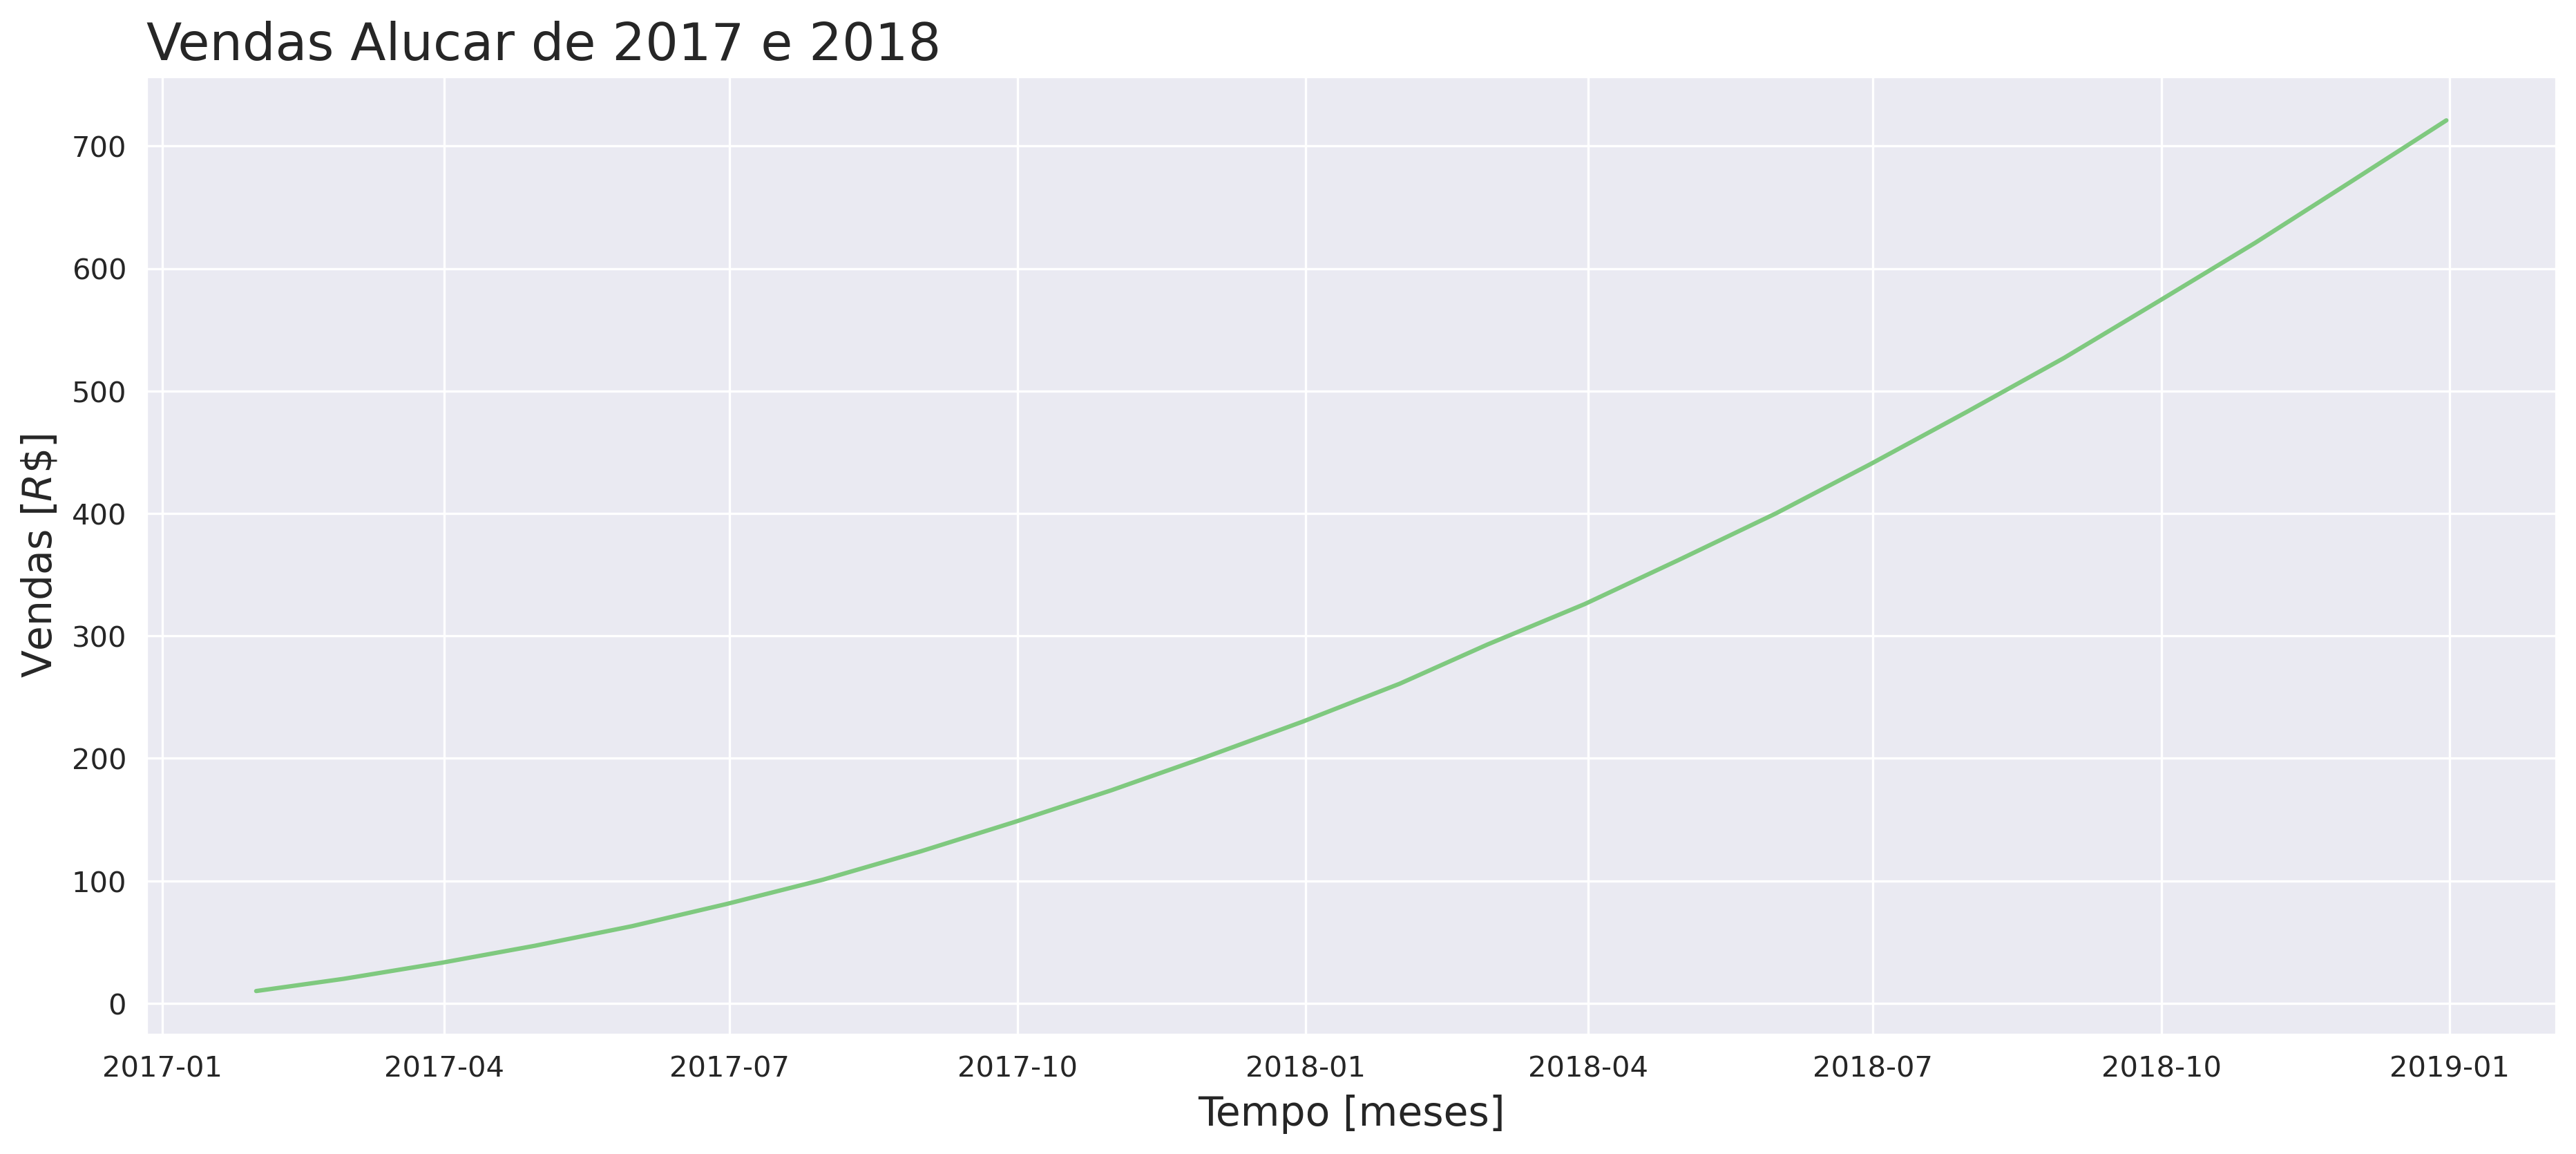

In [71]:
ax = sns.lineplot(x='mes', y='vendas', data=alucar)
ax.figure.set_size_inches(15, 6)
ax.set_title('Vendas Alucar de 2017 e 2018', fontsize=18, loc='left')
ax.set_xlabel('Tempo [meses]', fontsize=14)
ax.set_ylabel(r'Vendas $[R\$]$', fontsize=14)
ax.figure.dpi = 300
plt.show()

In [72]:
alucar.head()

mes  vendas
0 2017-01-31      10
1 2017-02-28      20
2 2017-03-31      33
3 2017-04-30      47
4 2017-05-31      63

In [73]:
alucar['aumento'] = alucar['vendas'].diff()
alucar.head()

mes  vendas  aumento
0 2017-01-31      10      NaN
1 2017-02-28      20     10.0
2 2017-03-31      33     13.0
3 2017-04-30      47     14.0
4 2017-05-31      63     16.0

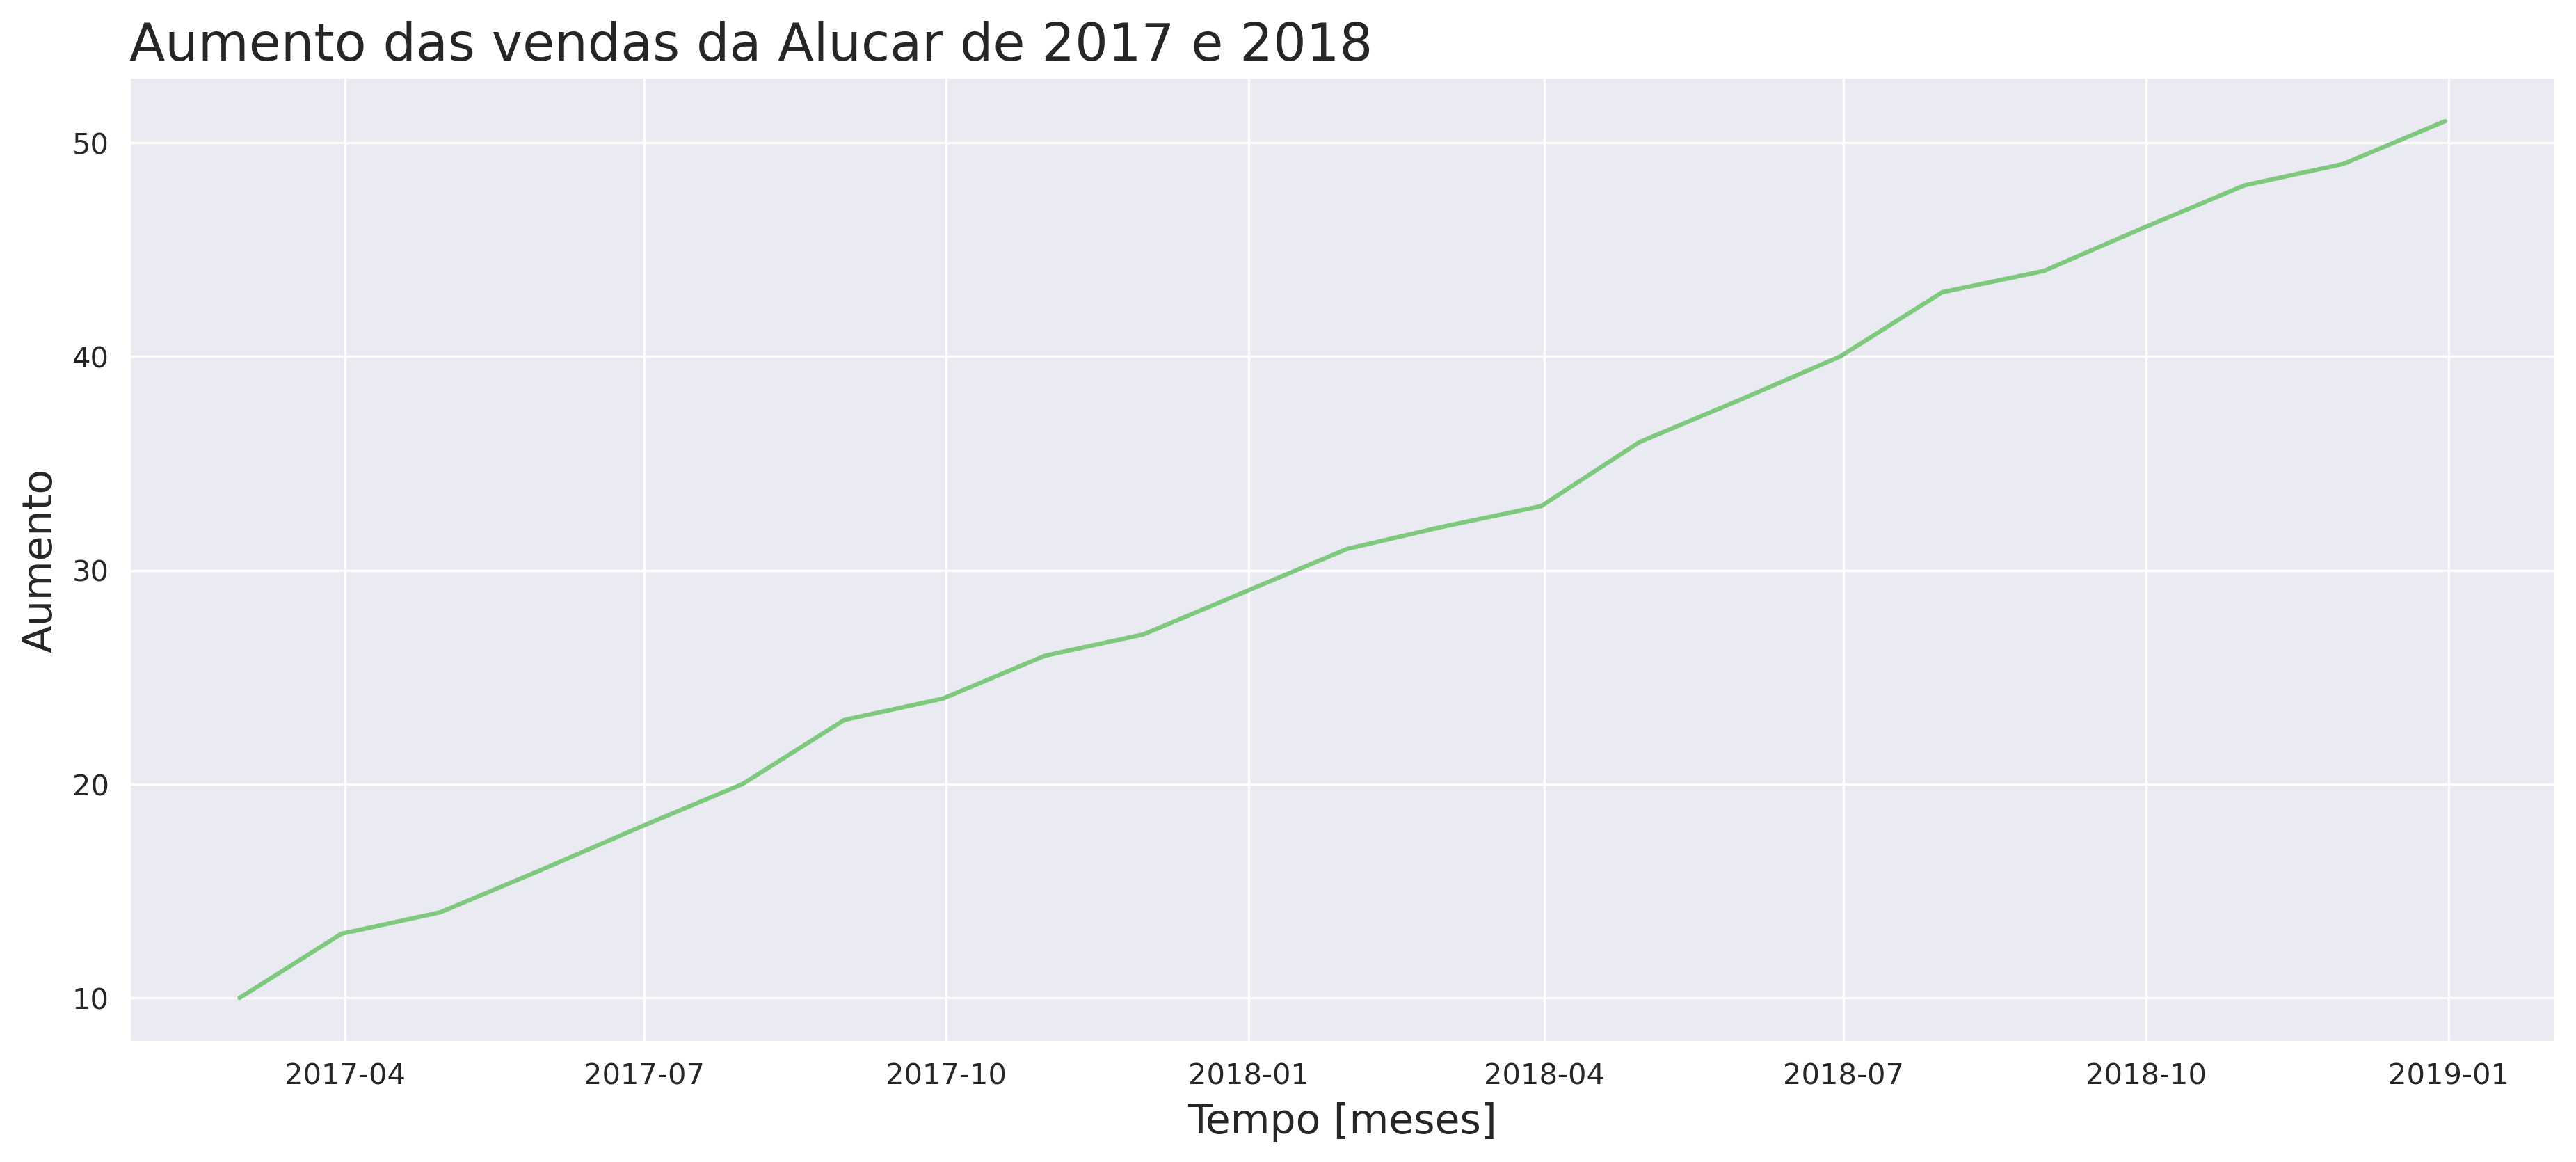

In [74]:
ax = sns.lineplot(x='mes', y='aumento', data=alucar)
ax.figure.set_size_inches(15, 6)
ax.set_title('Aumento das vendas da Alucar de 2017 e 2018', fontsize=18, loc='left')
ax.set_xlabel('Tempo [meses]', fontsize=14)
ax.set_ylabel('Aumento', fontsize=14)
ax.figure.dpi = 300
plt.show()

In [75]:
def plot(title, labelx, labely, x, y, data):
    ax = sns.lineplot(x=x, y=y, data=data)
    ax.figure.set_size_inches(15, 6)
    ax.set_title(title, fontsize=18, loc='left')
    ax.set_xlabel(labelx, fontsize=14)
    ax.set_ylabel(labely, fontsize=14)
    ax.figure.dpi = 300
    plt.show()

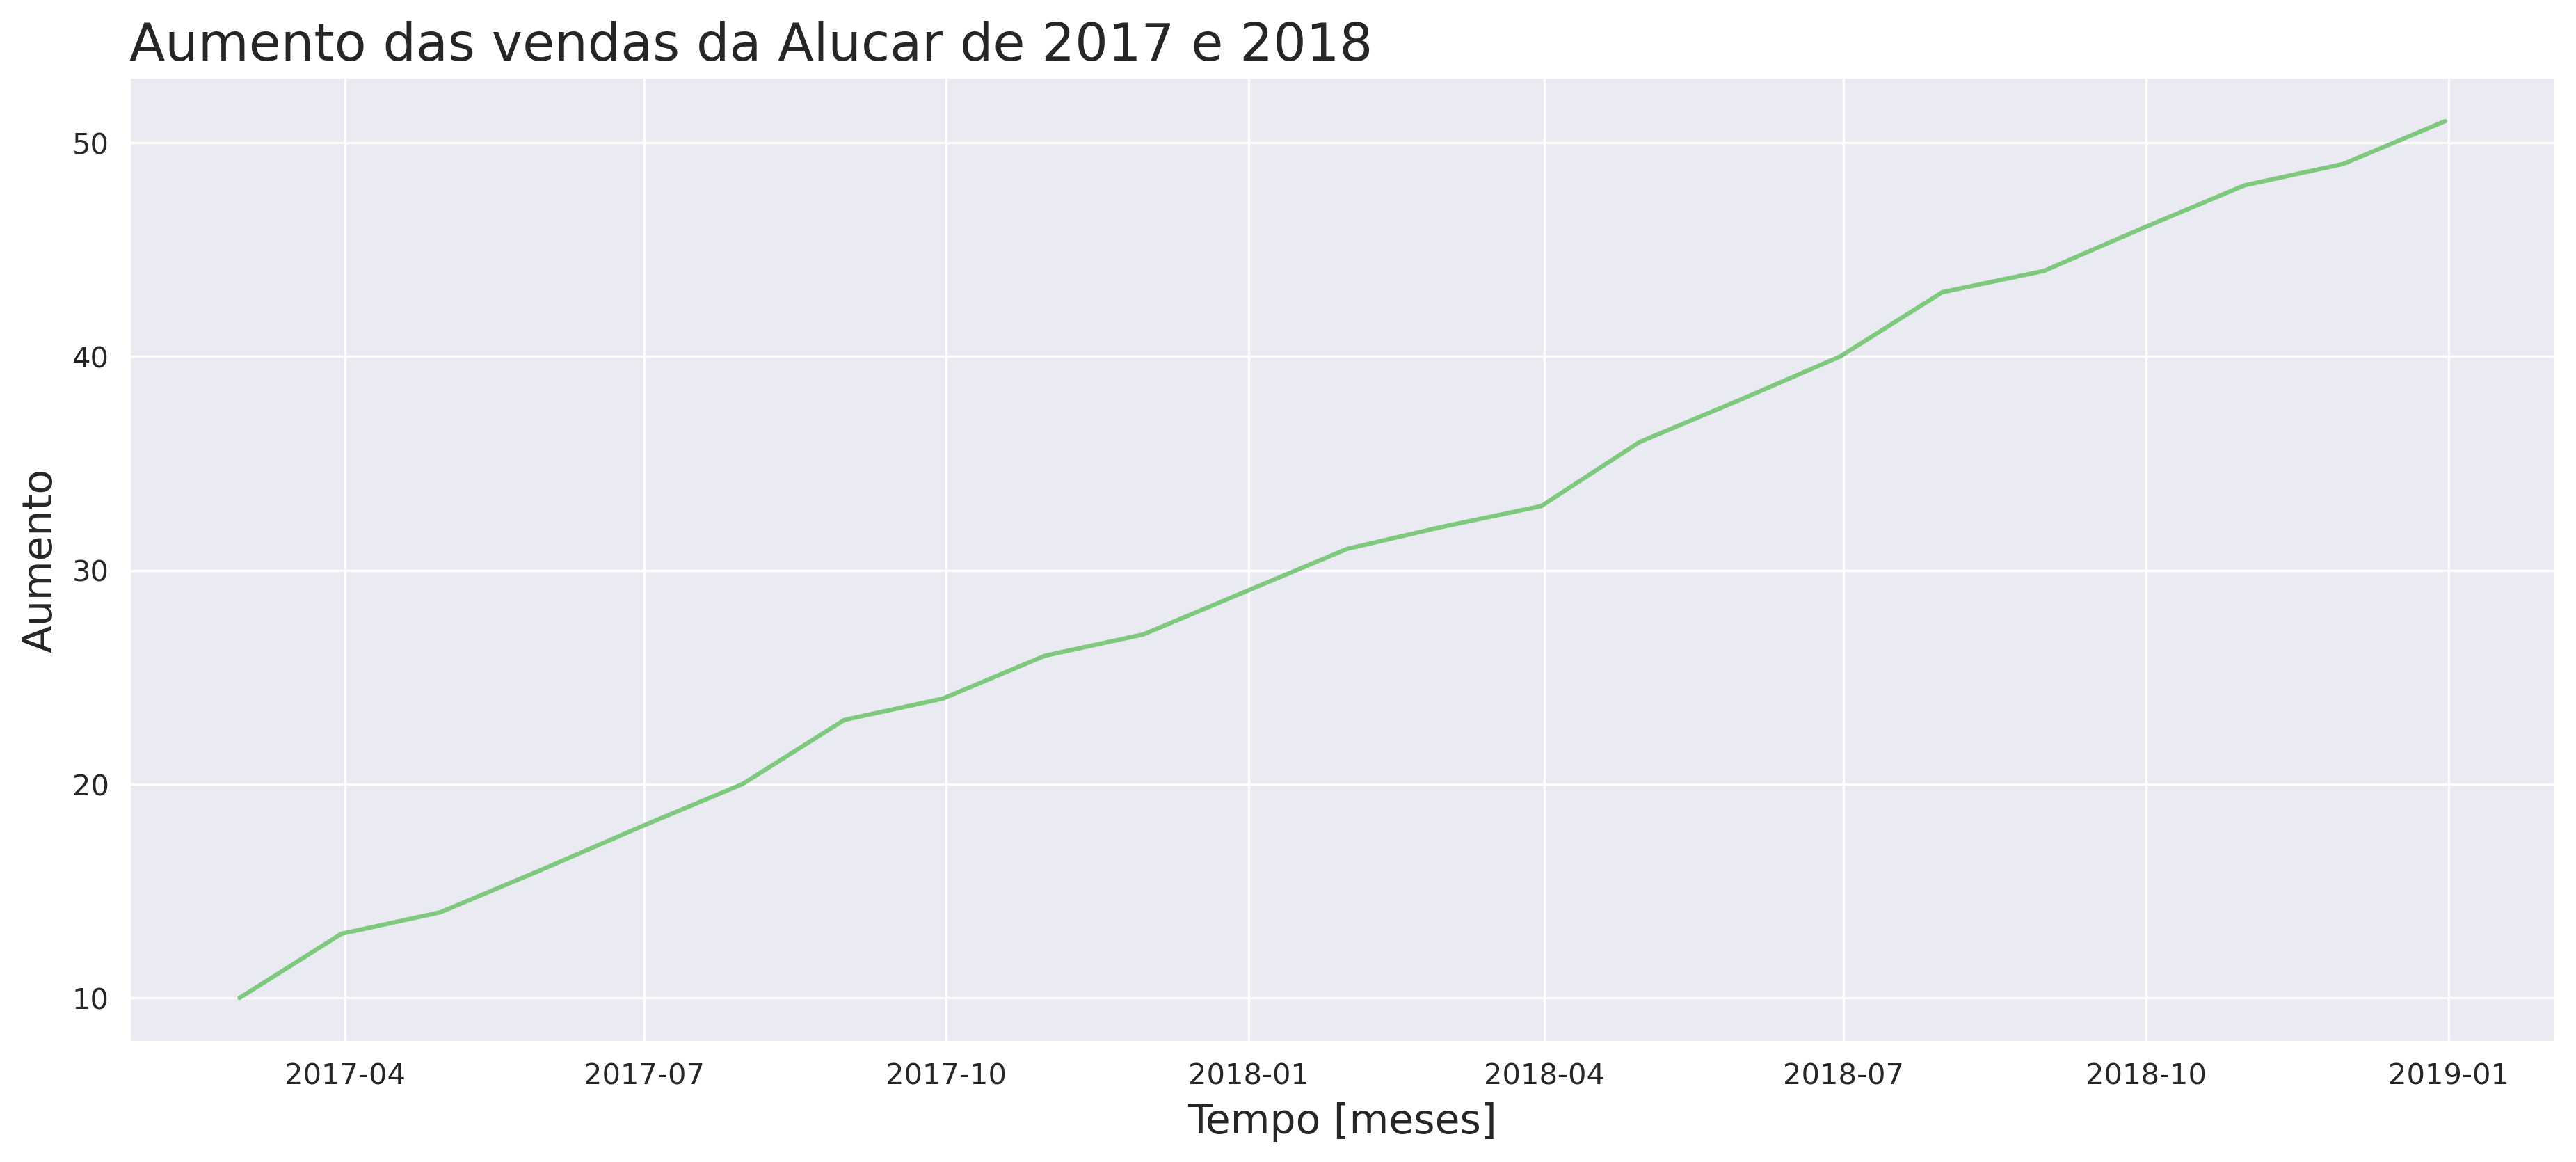

In [76]:
plot(
    'Aumento das vendas da Alucar de 2017 e 2018',
    'Tempo [meses]',
    'Aumento',
    'mes',
    'aumento',
    alucar
)

In [77]:
alucar['aceleracao'] = alucar['aumento'].diff()
alucar.head()

mes  vendas  aumento  aceleracao
0 2017-01-31      10      NaN         NaN
1 2017-02-28      20     10.0         NaN
2 2017-03-31      33     13.0         3.0
3 2017-04-30      47     14.0         1.0
4 2017-05-31      63     16.0         2.0

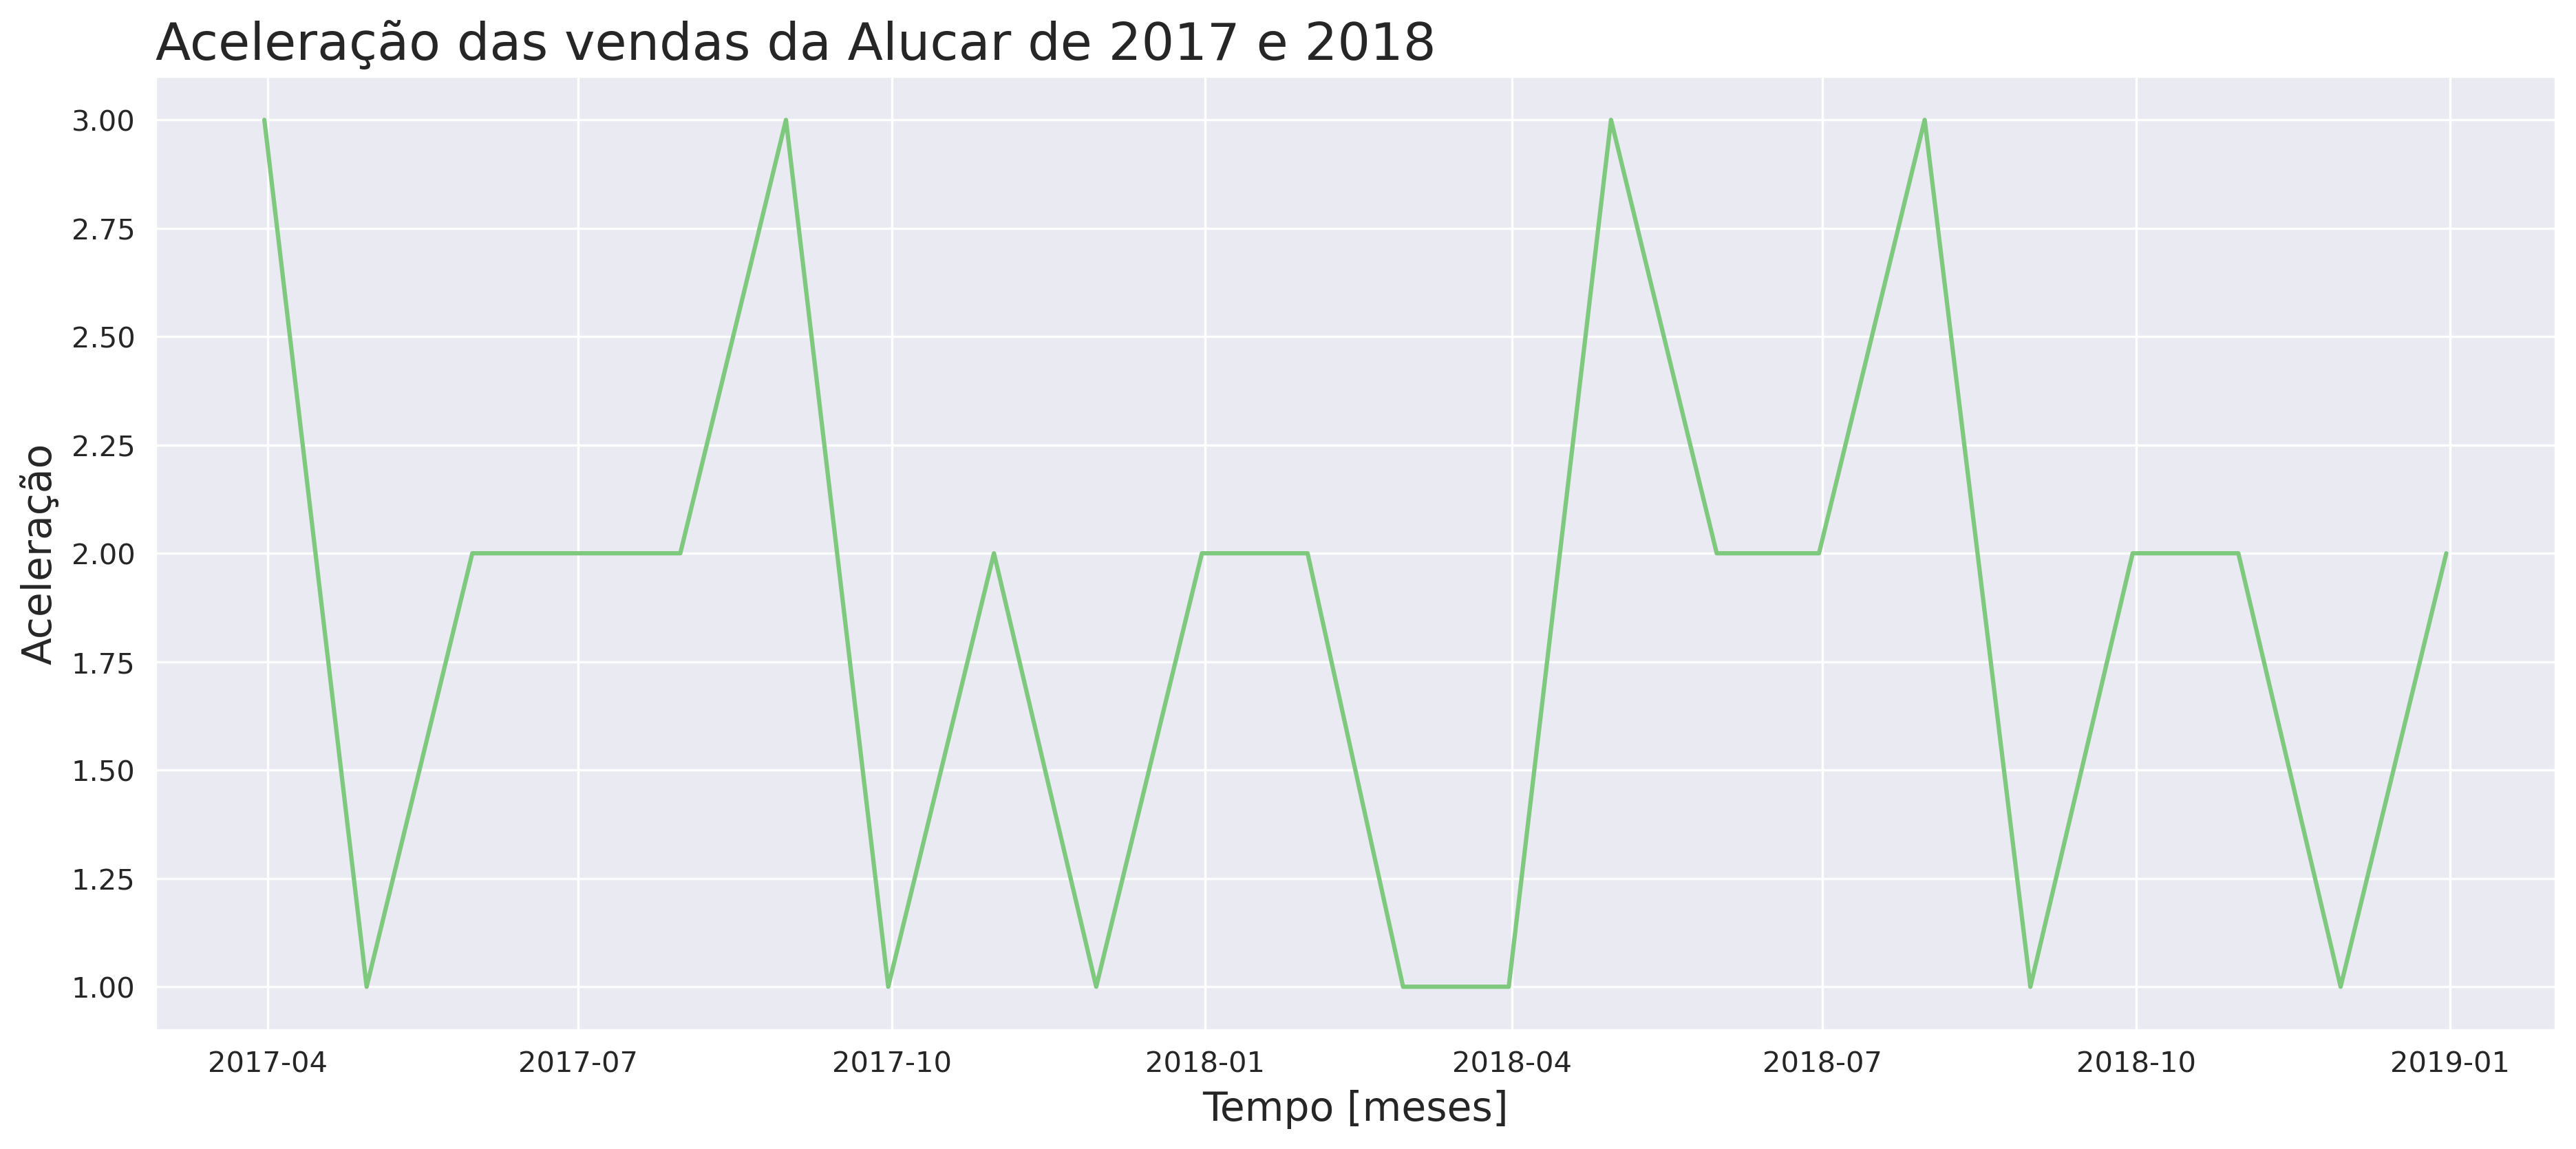

In [78]:
plot(
    'Aceleração das vendas da Alucar de 2017 e 2018',
    'Tempo [meses]',
    'Aceleração',
    'mes',
    'aceleracao',
    alucar
)

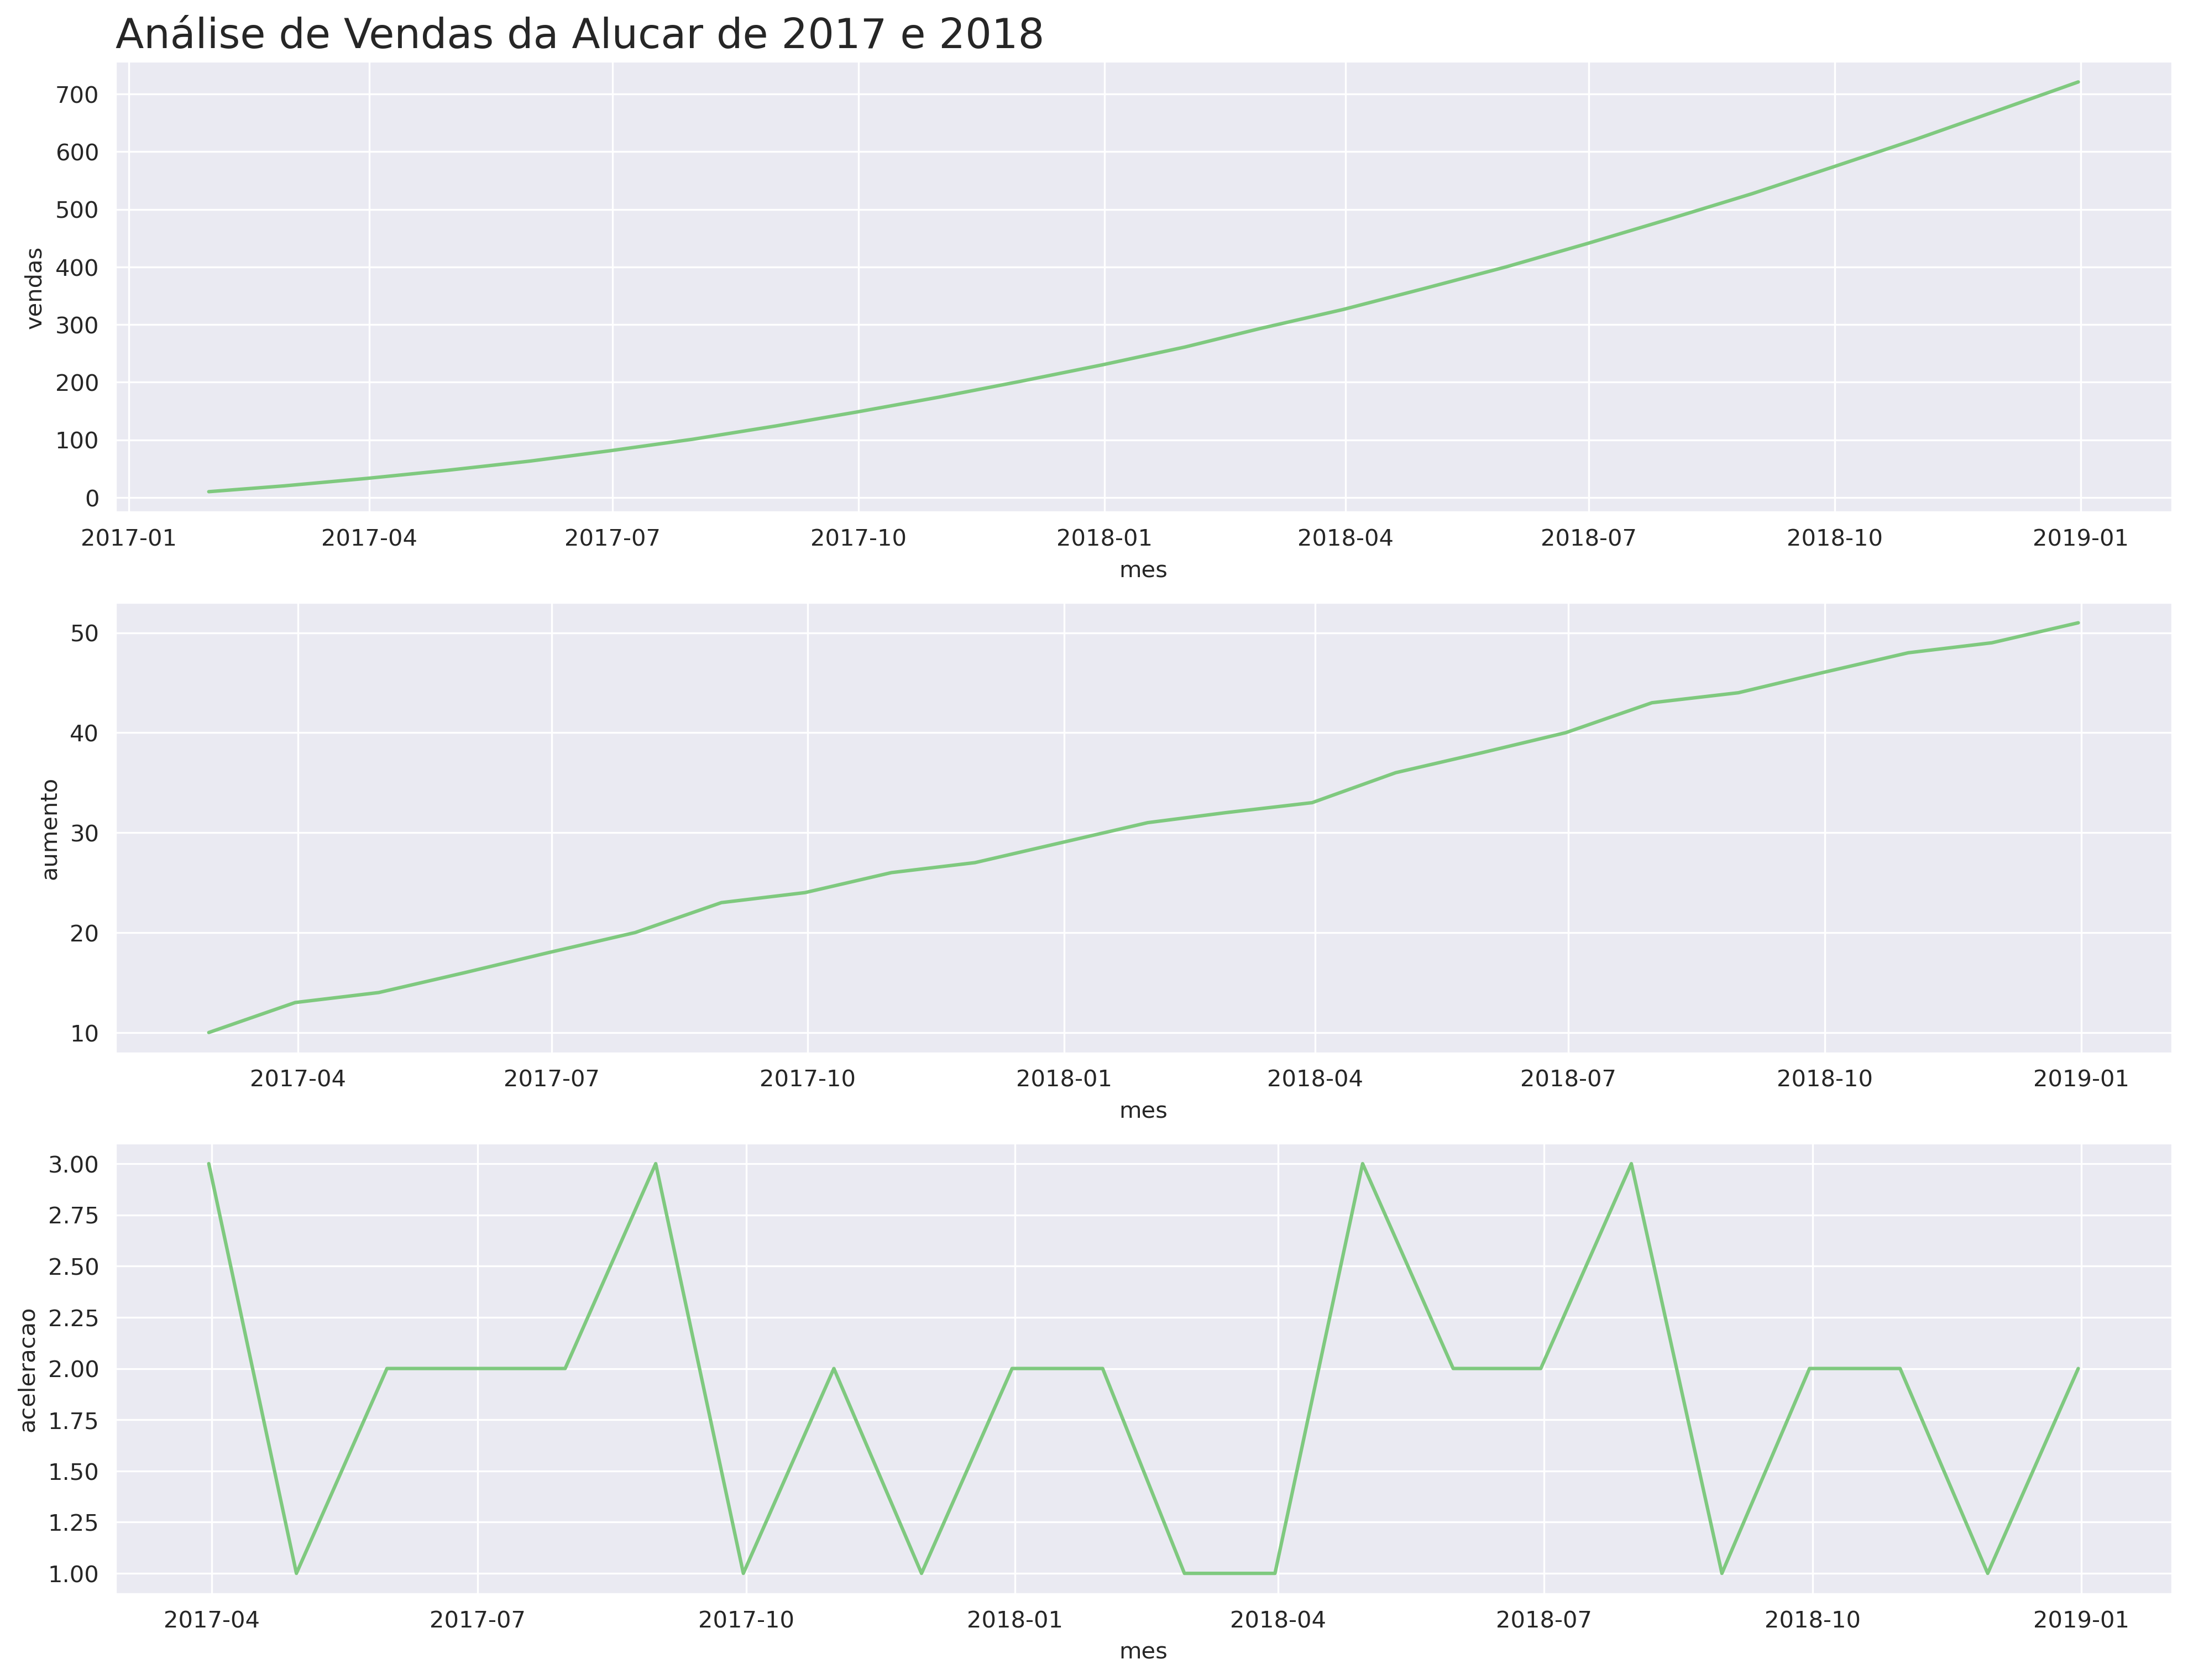

In [79]:
plt.figure(figsize=(16, 12), dpi=300)

ax = plt.subplot(3, 1, 1)
ax.set_title('Análise de Vendas da Alucar de 2017 e 2018', fontsize=18, loc='left')
sns.lineplot(x='mes', y='vendas', data=alucar)

plt.subplot(3, 1, 2)
sns.lineplot(x='mes', y='aumento', data=alucar)

plt.subplot(3, 1, 3)
sns.lineplot(x='mes', y='aceleracao', data=alucar)

plt.show()

In [80]:
def compare_plot(x, y1, y2, y3, data, title):
    plt.figure(figsize=(16, 12), dpi=300)
    ax = plt.subplot(3, 1, 1)
    ax.set_title(title, fontsize=18, loc='left')
    sns.lineplot(x=x, y=y1, data=data)
    plt.subplot(3, 1, 2)
    sns.lineplot(x=x, y=y2, data=data)
    plt.subplot(3, 1, 3)
    sns.lineplot(x=x, y=y3, data=data)
    plt.show()

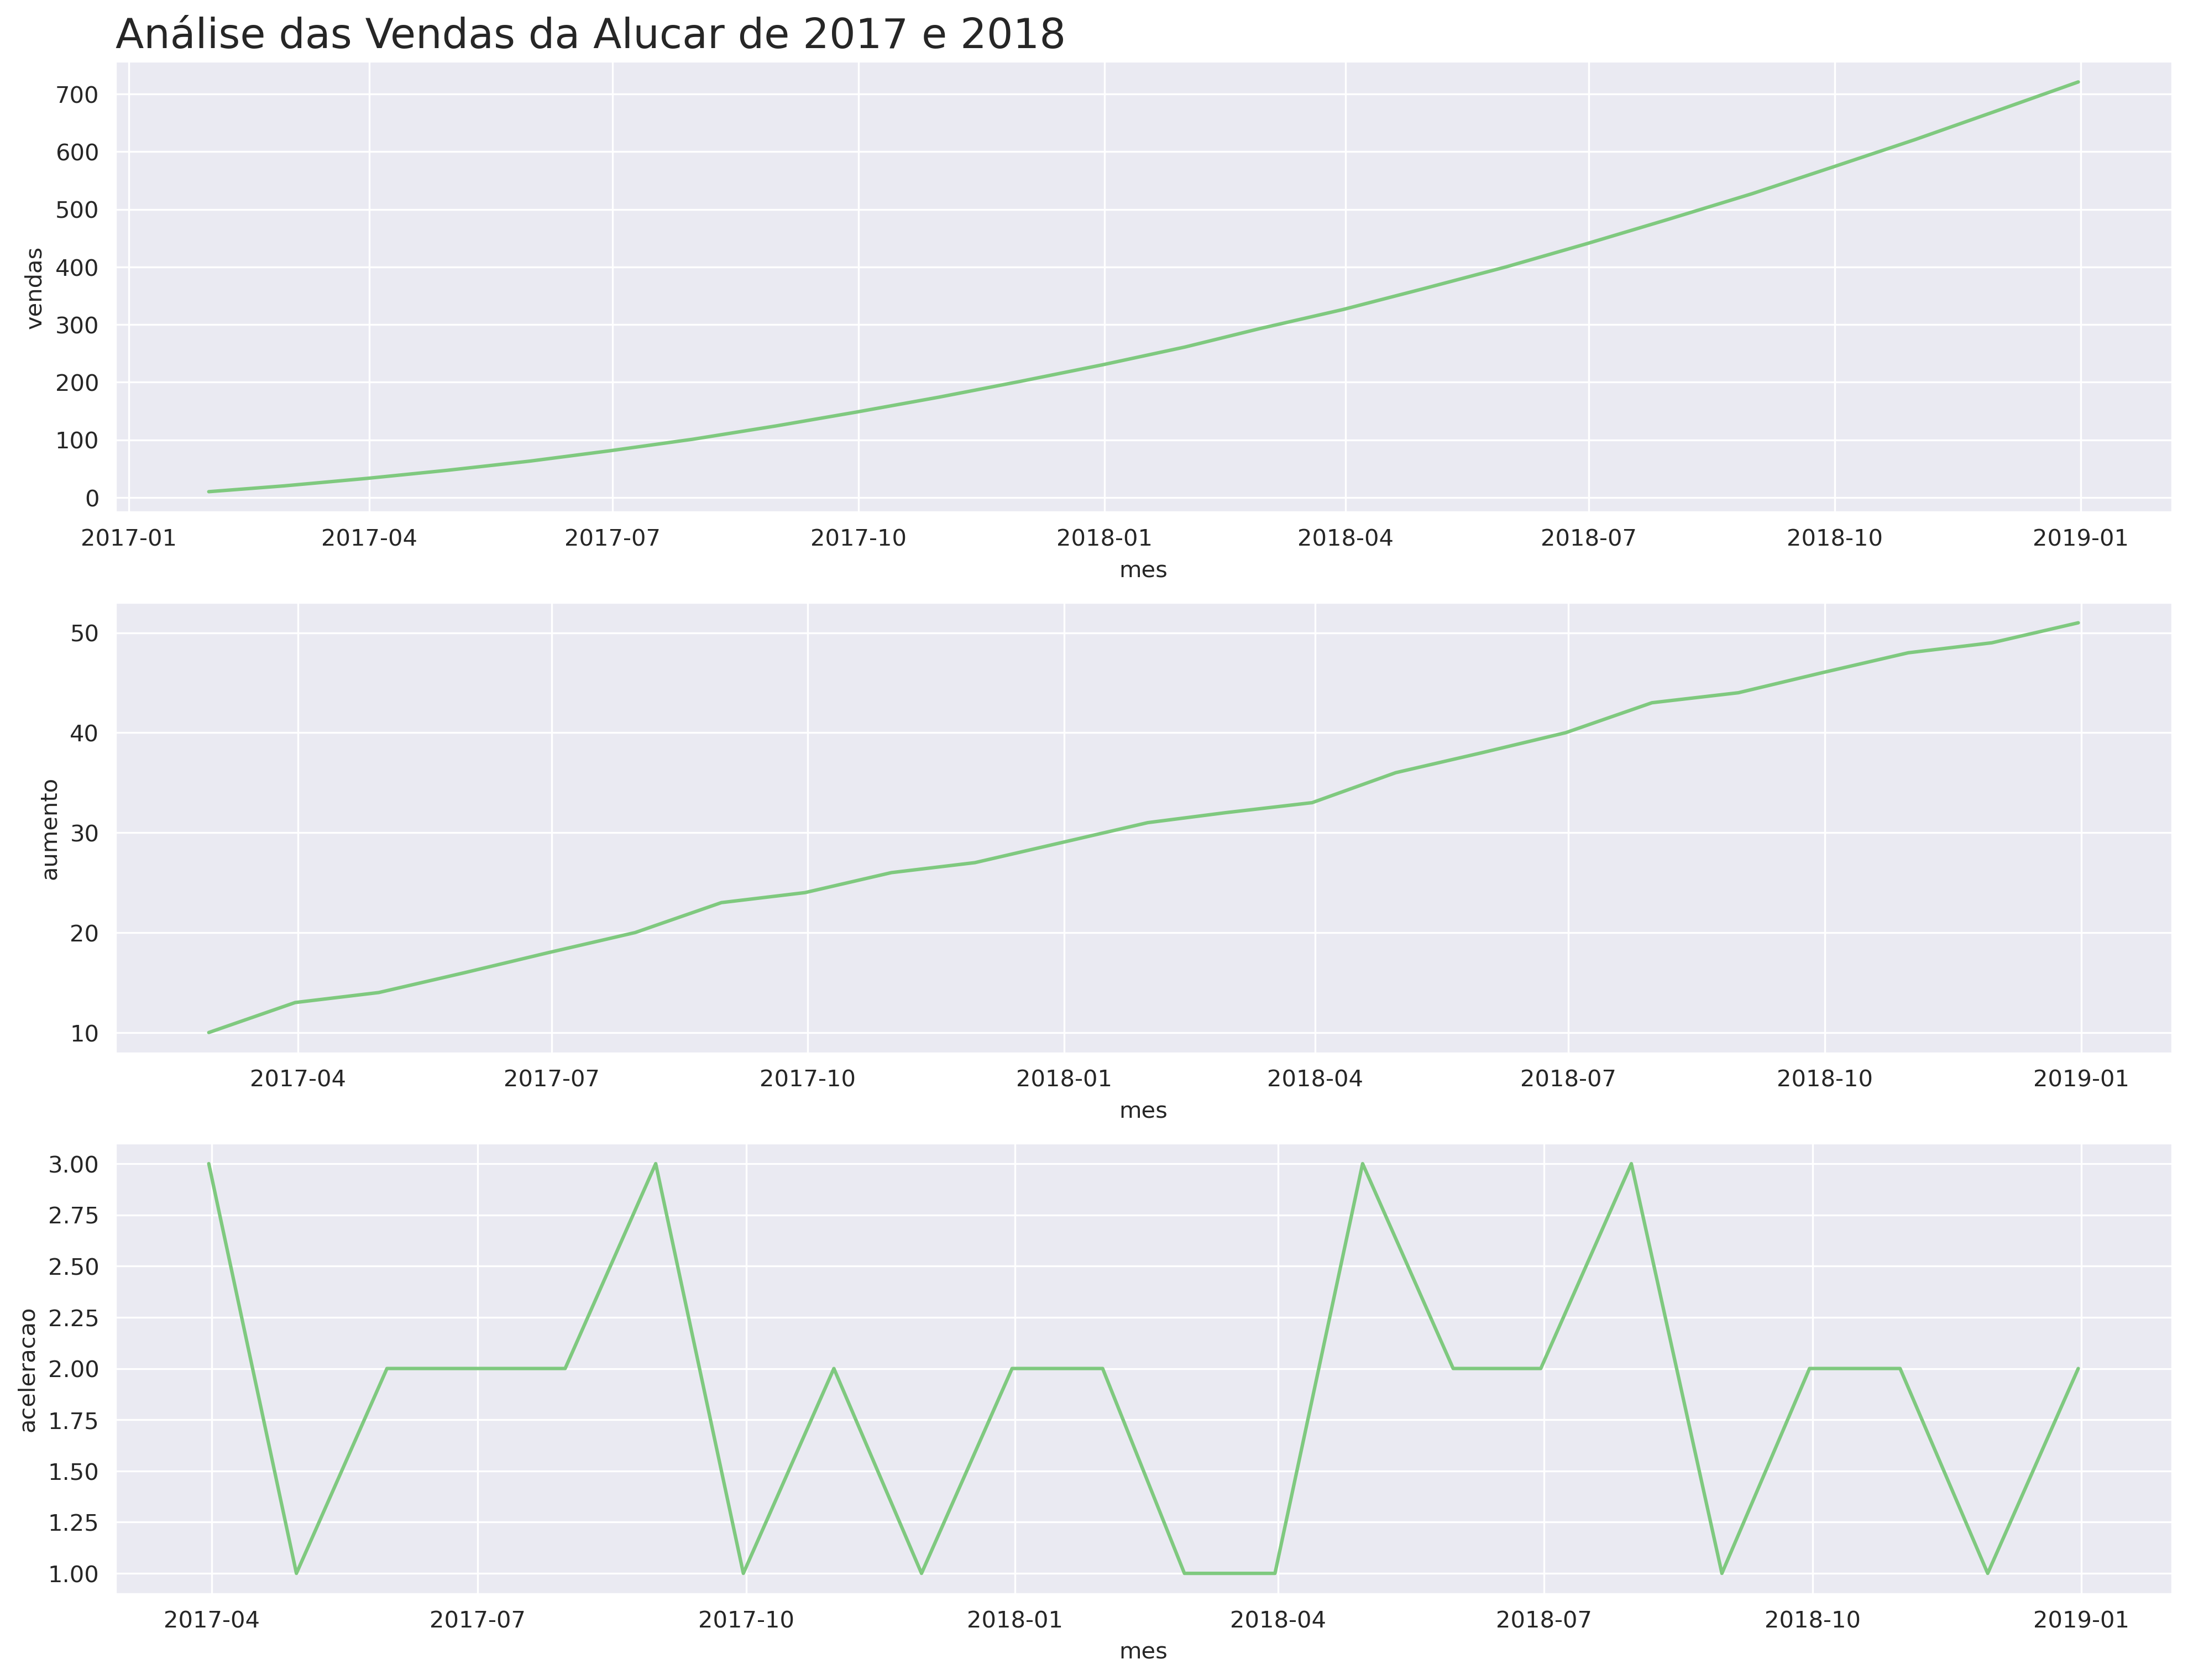

In [81]:
compare_plot(
    'mes', 
    'vendas', 
    'aumento', 
    'aceleracao', 
    alucar, 
    'Análise das Vendas da Alucar de 2017 e 2018'
)

In [82]:
from pandas.plotting import autocorrelation_plot

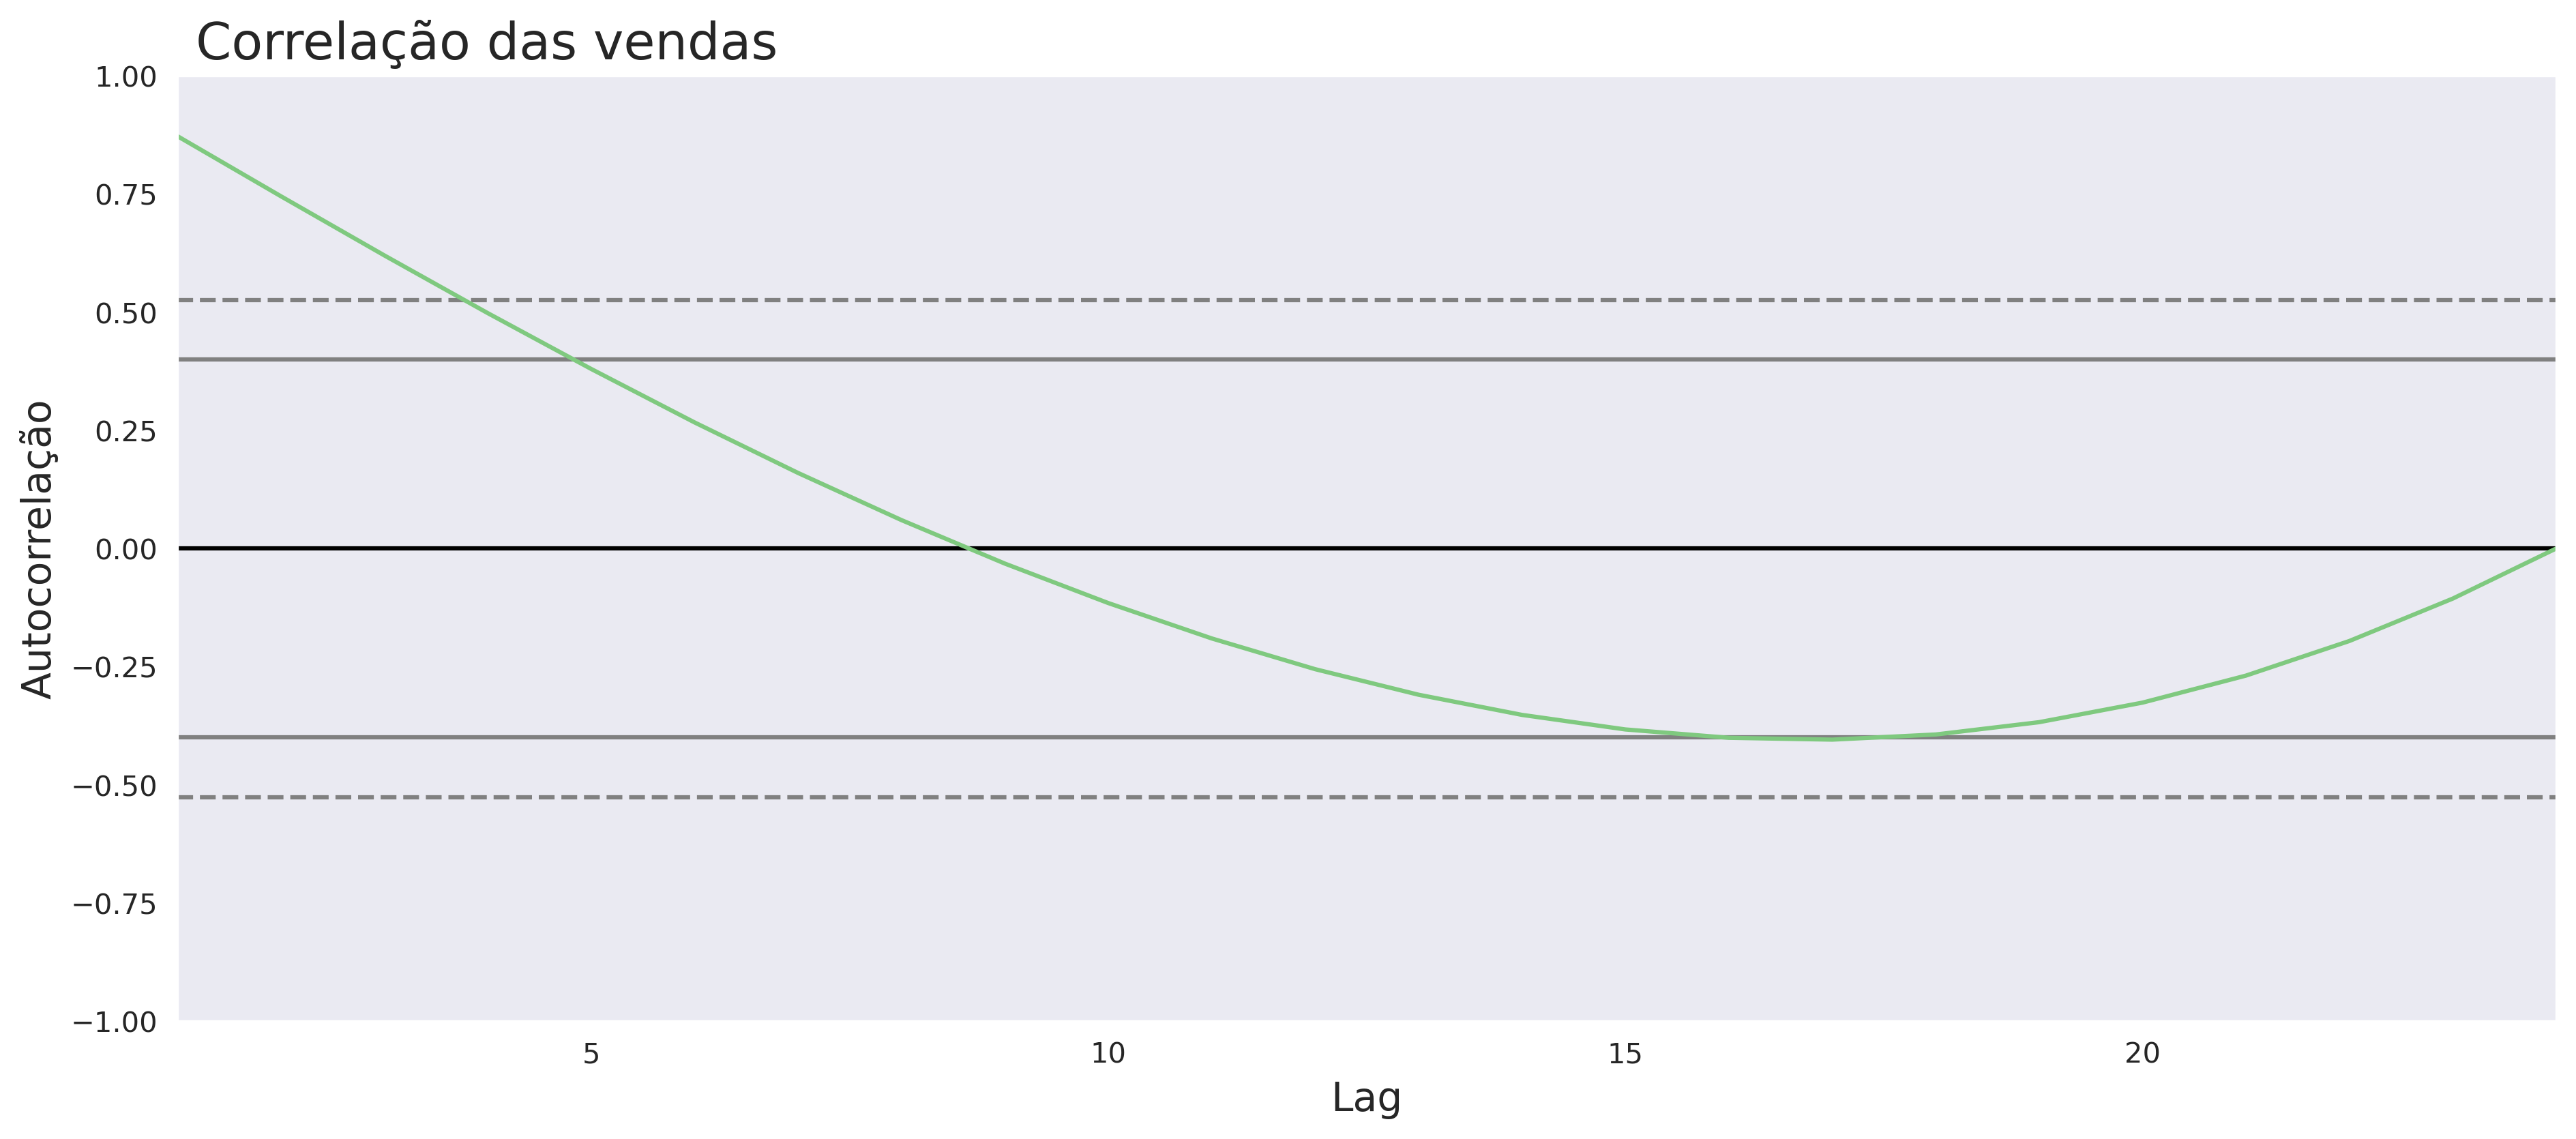

In [83]:
ax = autocorrelation_plot(alucar['vendas'])
ax.figure.dpi = 300
ax.figure.set_size_inches(15, 6)
ax.set_title('Correlação das vendas', fontsize=18, x=0.13)
ax.set_xlabel('Lag', fontsize=14)
ax.set_ylabel('Autocorrelação', fontsize=14)
plt.show()

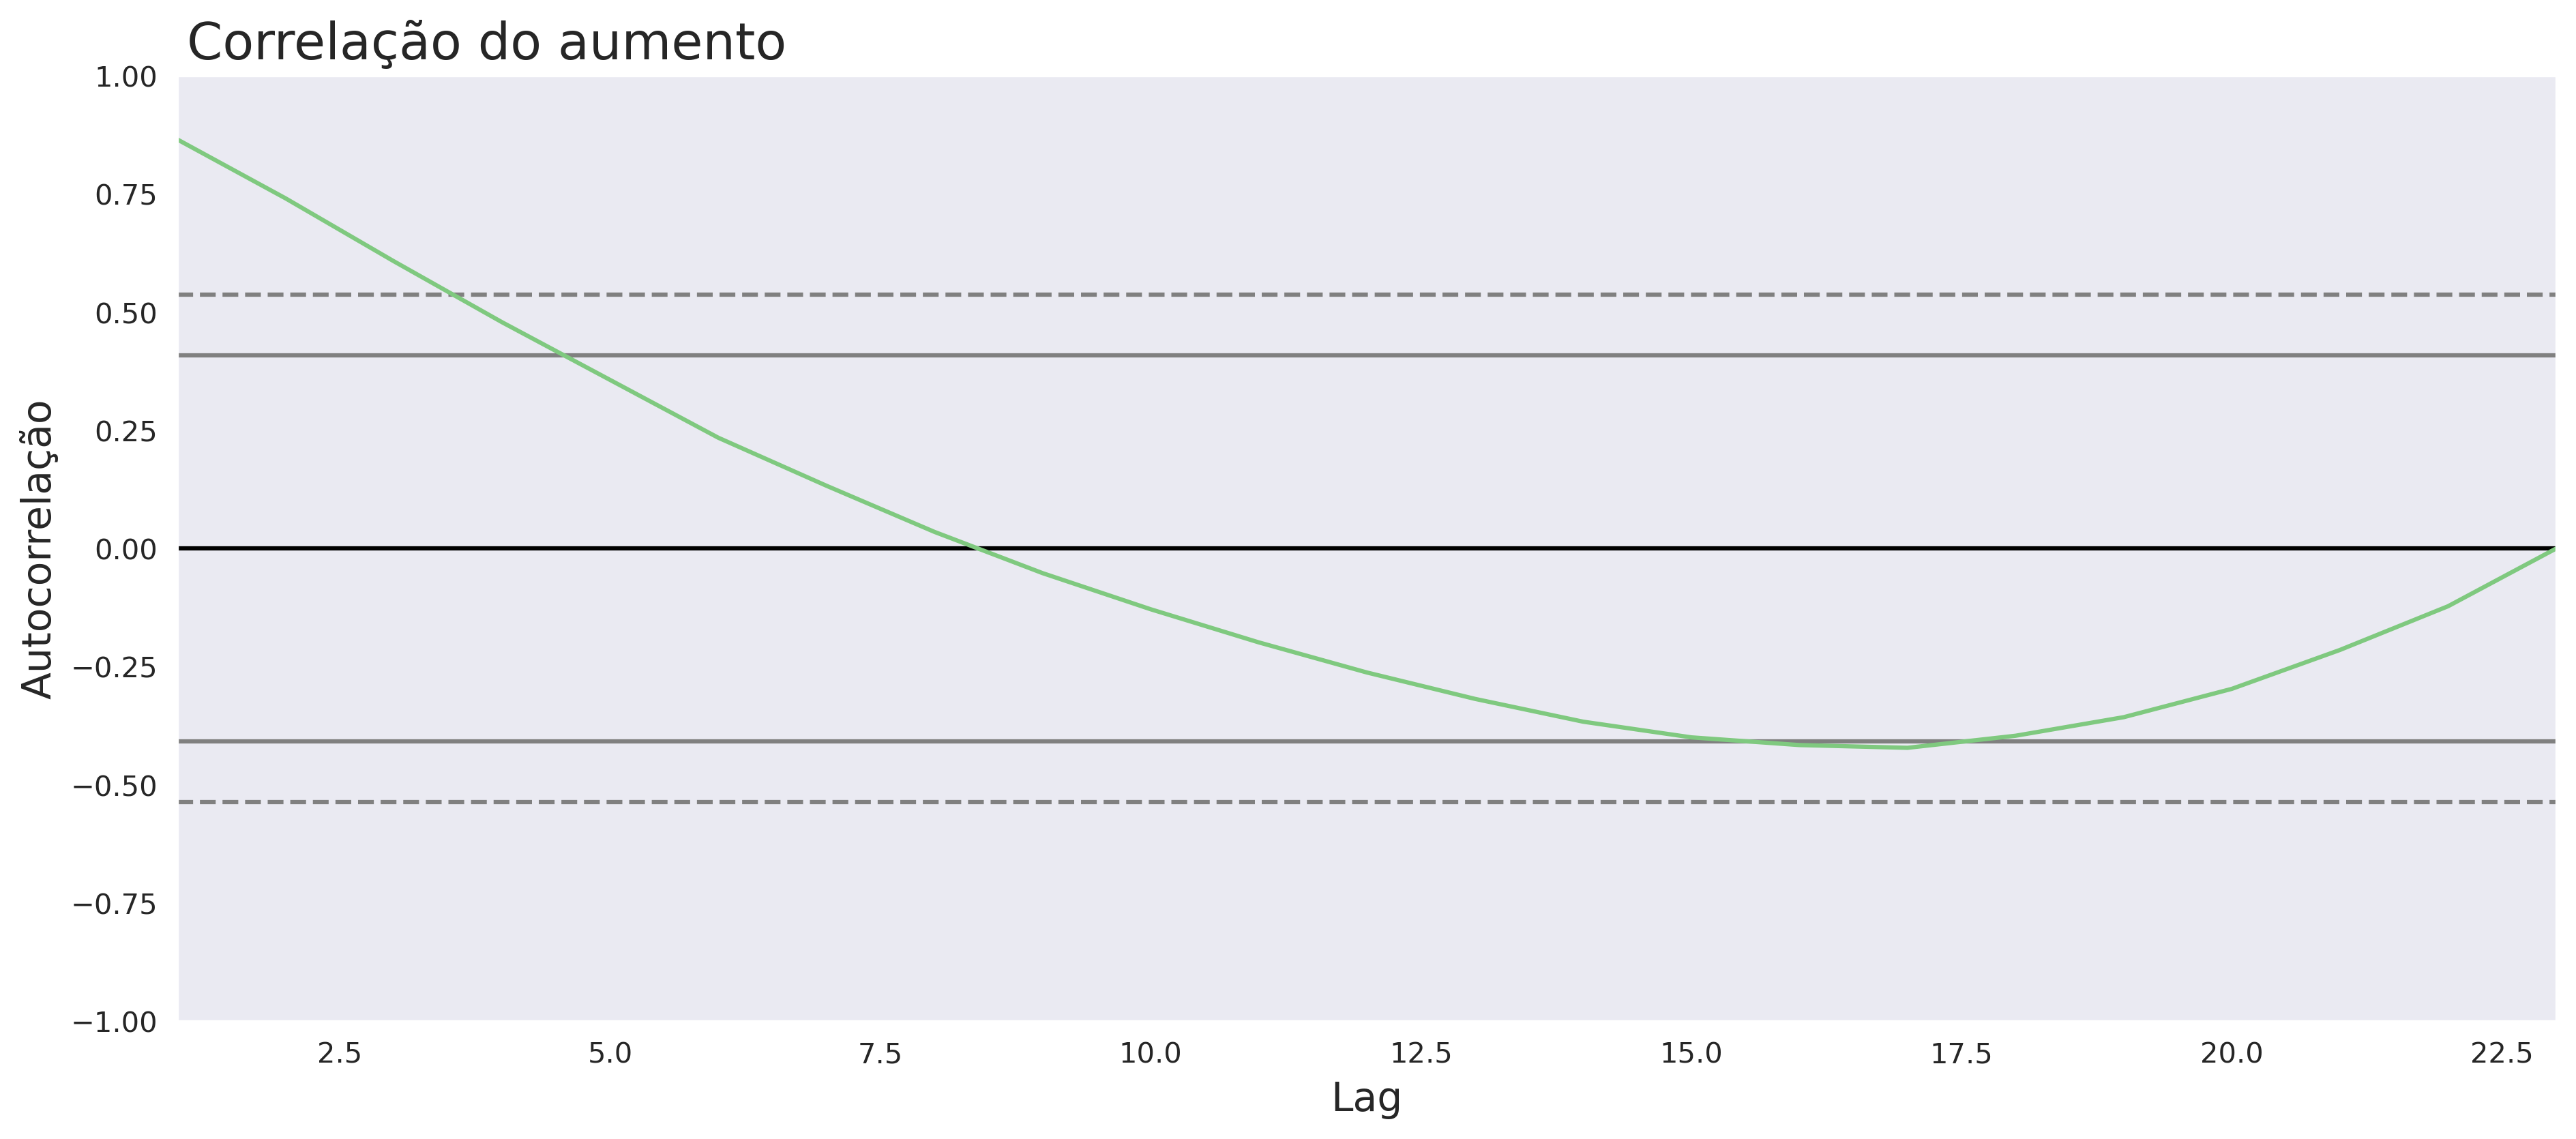

In [84]:
ax = autocorrelation_plot(alucar['aumento'][1:])
ax.figure.dpi = 300
ax.figure.set_size_inches(15, 6)
ax.set_title('Correlação do aumento', fontsize=18, x=0.13)
ax.set_xlabel('Lag', fontsize=14)
ax.set_ylabel('Autocorrelação', fontsize=14)
plt.show()

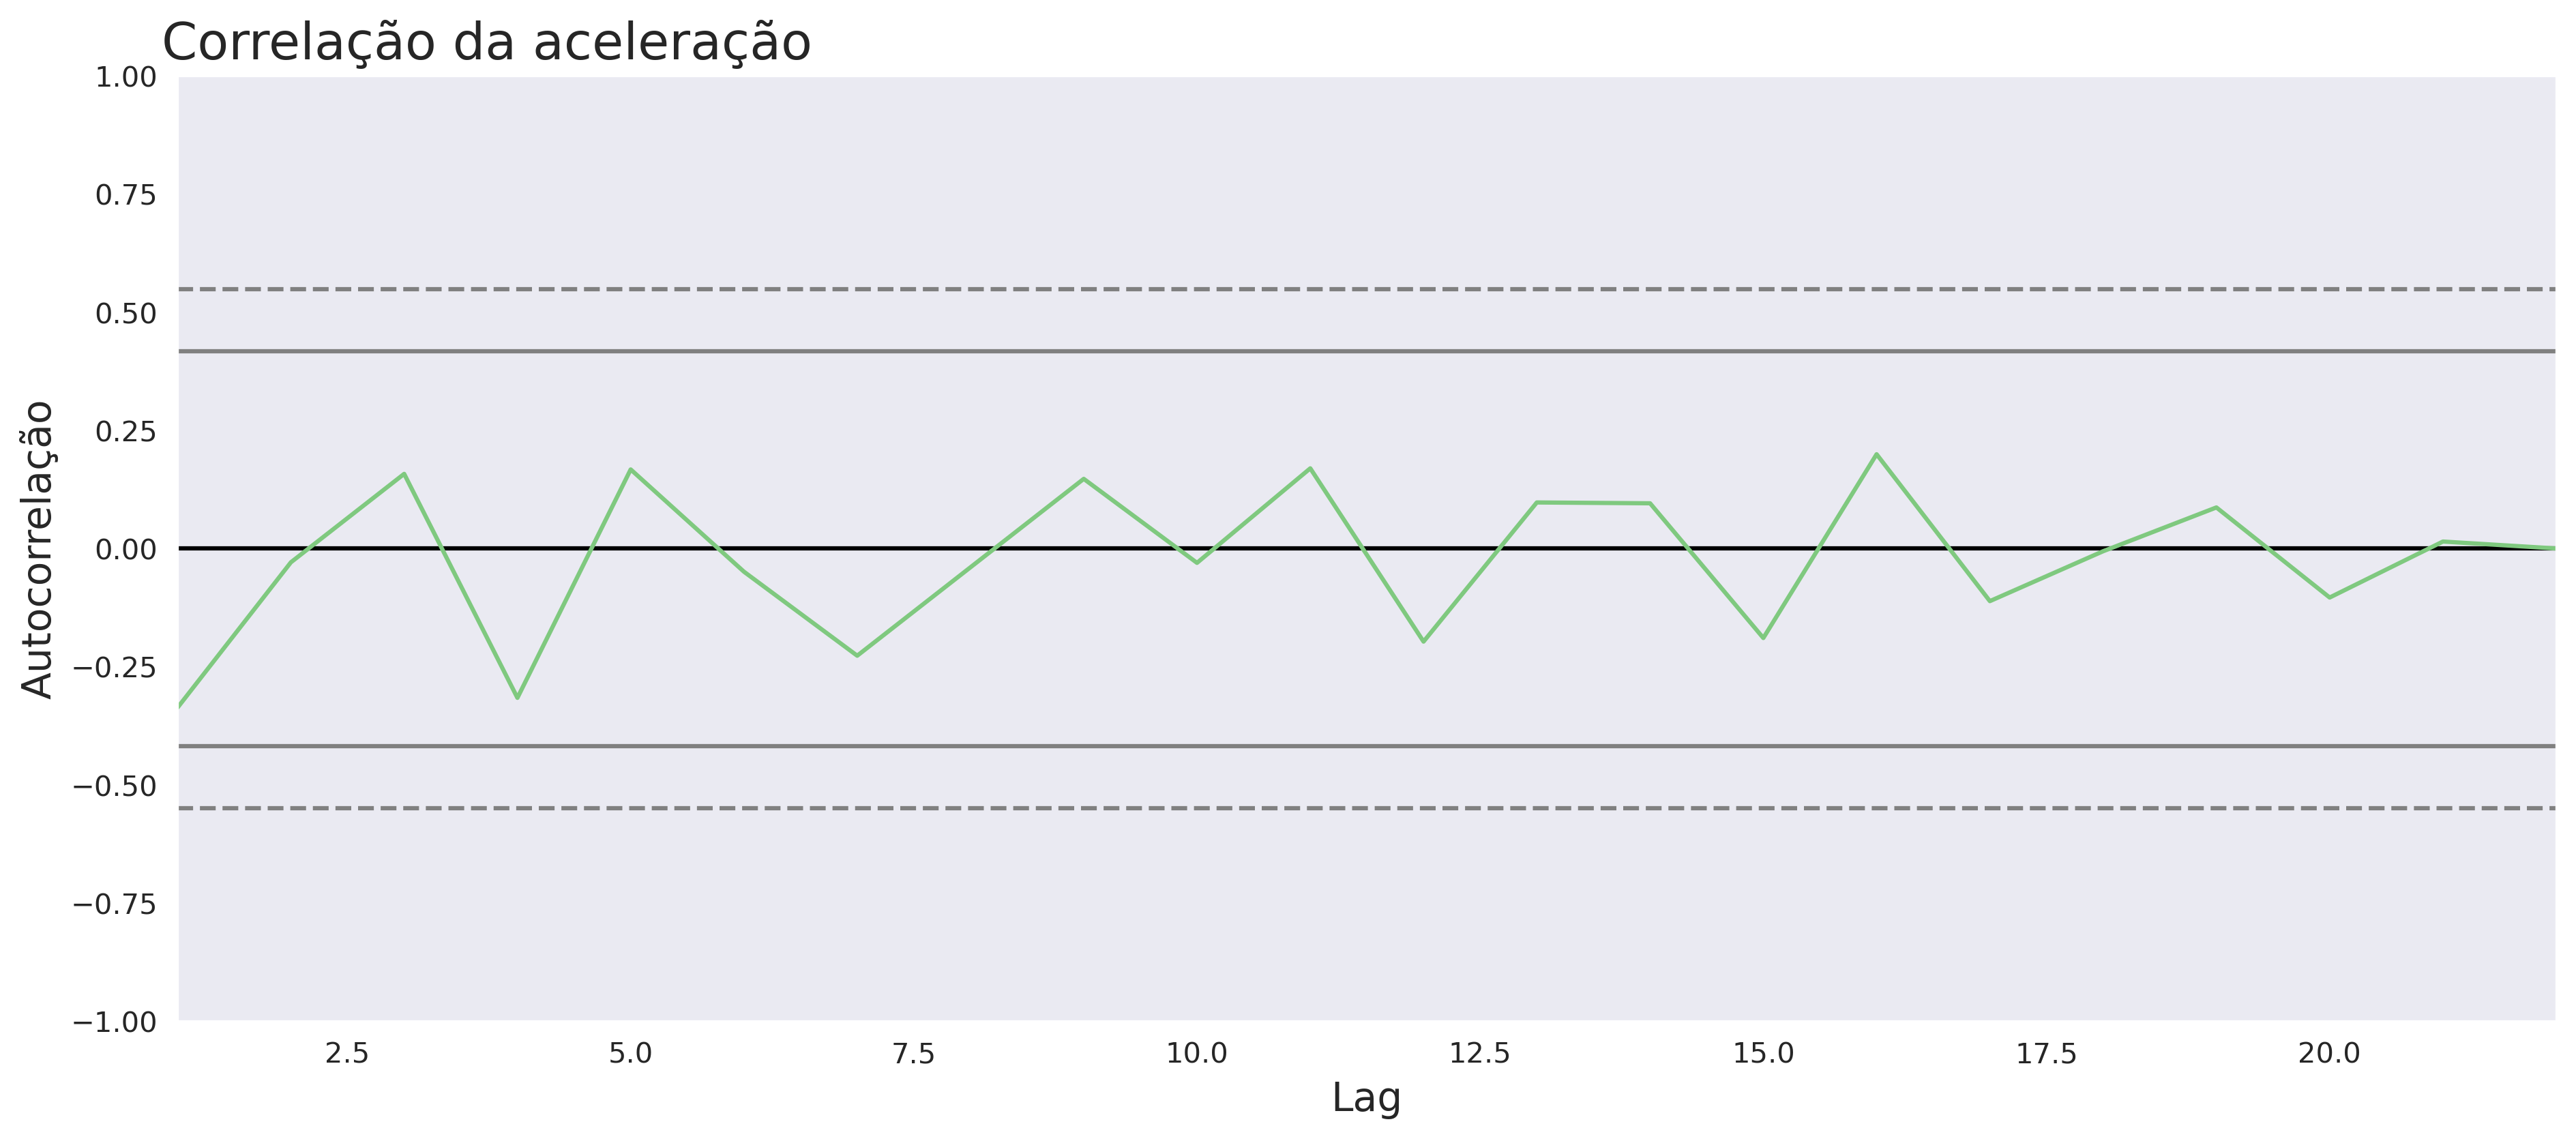

In [85]:
ax = autocorrelation_plot(alucar['aceleracao'][2:])
ax.figure.dpi = 300
ax.figure.set_size_inches(15, 6)
ax.set_title('Correlação da aceleração', fontsize=18, x=0.13)
ax.set_xlabel('Lag', fontsize=14)
ax.set_ylabel('Autocorrelação', fontsize=14)
plt.show()

# Alucar - Analisando assinantes da newsletter

In [86]:
subscribers = pd.read_csv('newsletter_alucar.csv')

In [87]:
subscribers.head()

mes  assinantes
0  2017-01-31           0
1  2017-02-28          10
2  2017-03-31          21
3  2017-04-30          34
4  2017-05-31          49

In [88]:
print(f'Os dados possuem {subscribers.shape[0]} registros e {subscribers.shape[1]} variáveis')

Os dados possuem 24 registros e 2 variáveis


In [89]:
subscribers.dtypes

mes           object
assinantes     int64
dtype: object

In [90]:
subscribers['mes'] = pd.to_datetime(subscribers['mes'])
subscribers.dtypes

mes           datetime64[ns]
assinantes             int64
dtype: object

In [91]:
print(f'Quantidade de dados nulos: {subscribers.isna().sum().sum()}')

Quantidade de dados nulos: 0


In [92]:
subscribers['aumento'] = subscribers['assinantes'].diff()
subscribers['aceleracao'] = subscribers['aumento'].diff()
subscribers.head()

mes  assinantes  aumento  aceleracao
0 2017-01-31           0      NaN         NaN
1 2017-02-28          10     10.0         NaN
2 2017-03-31          21     11.0         1.0
3 2017-04-30          34     13.0         2.0
4 2017-05-31          49     15.0         2.0

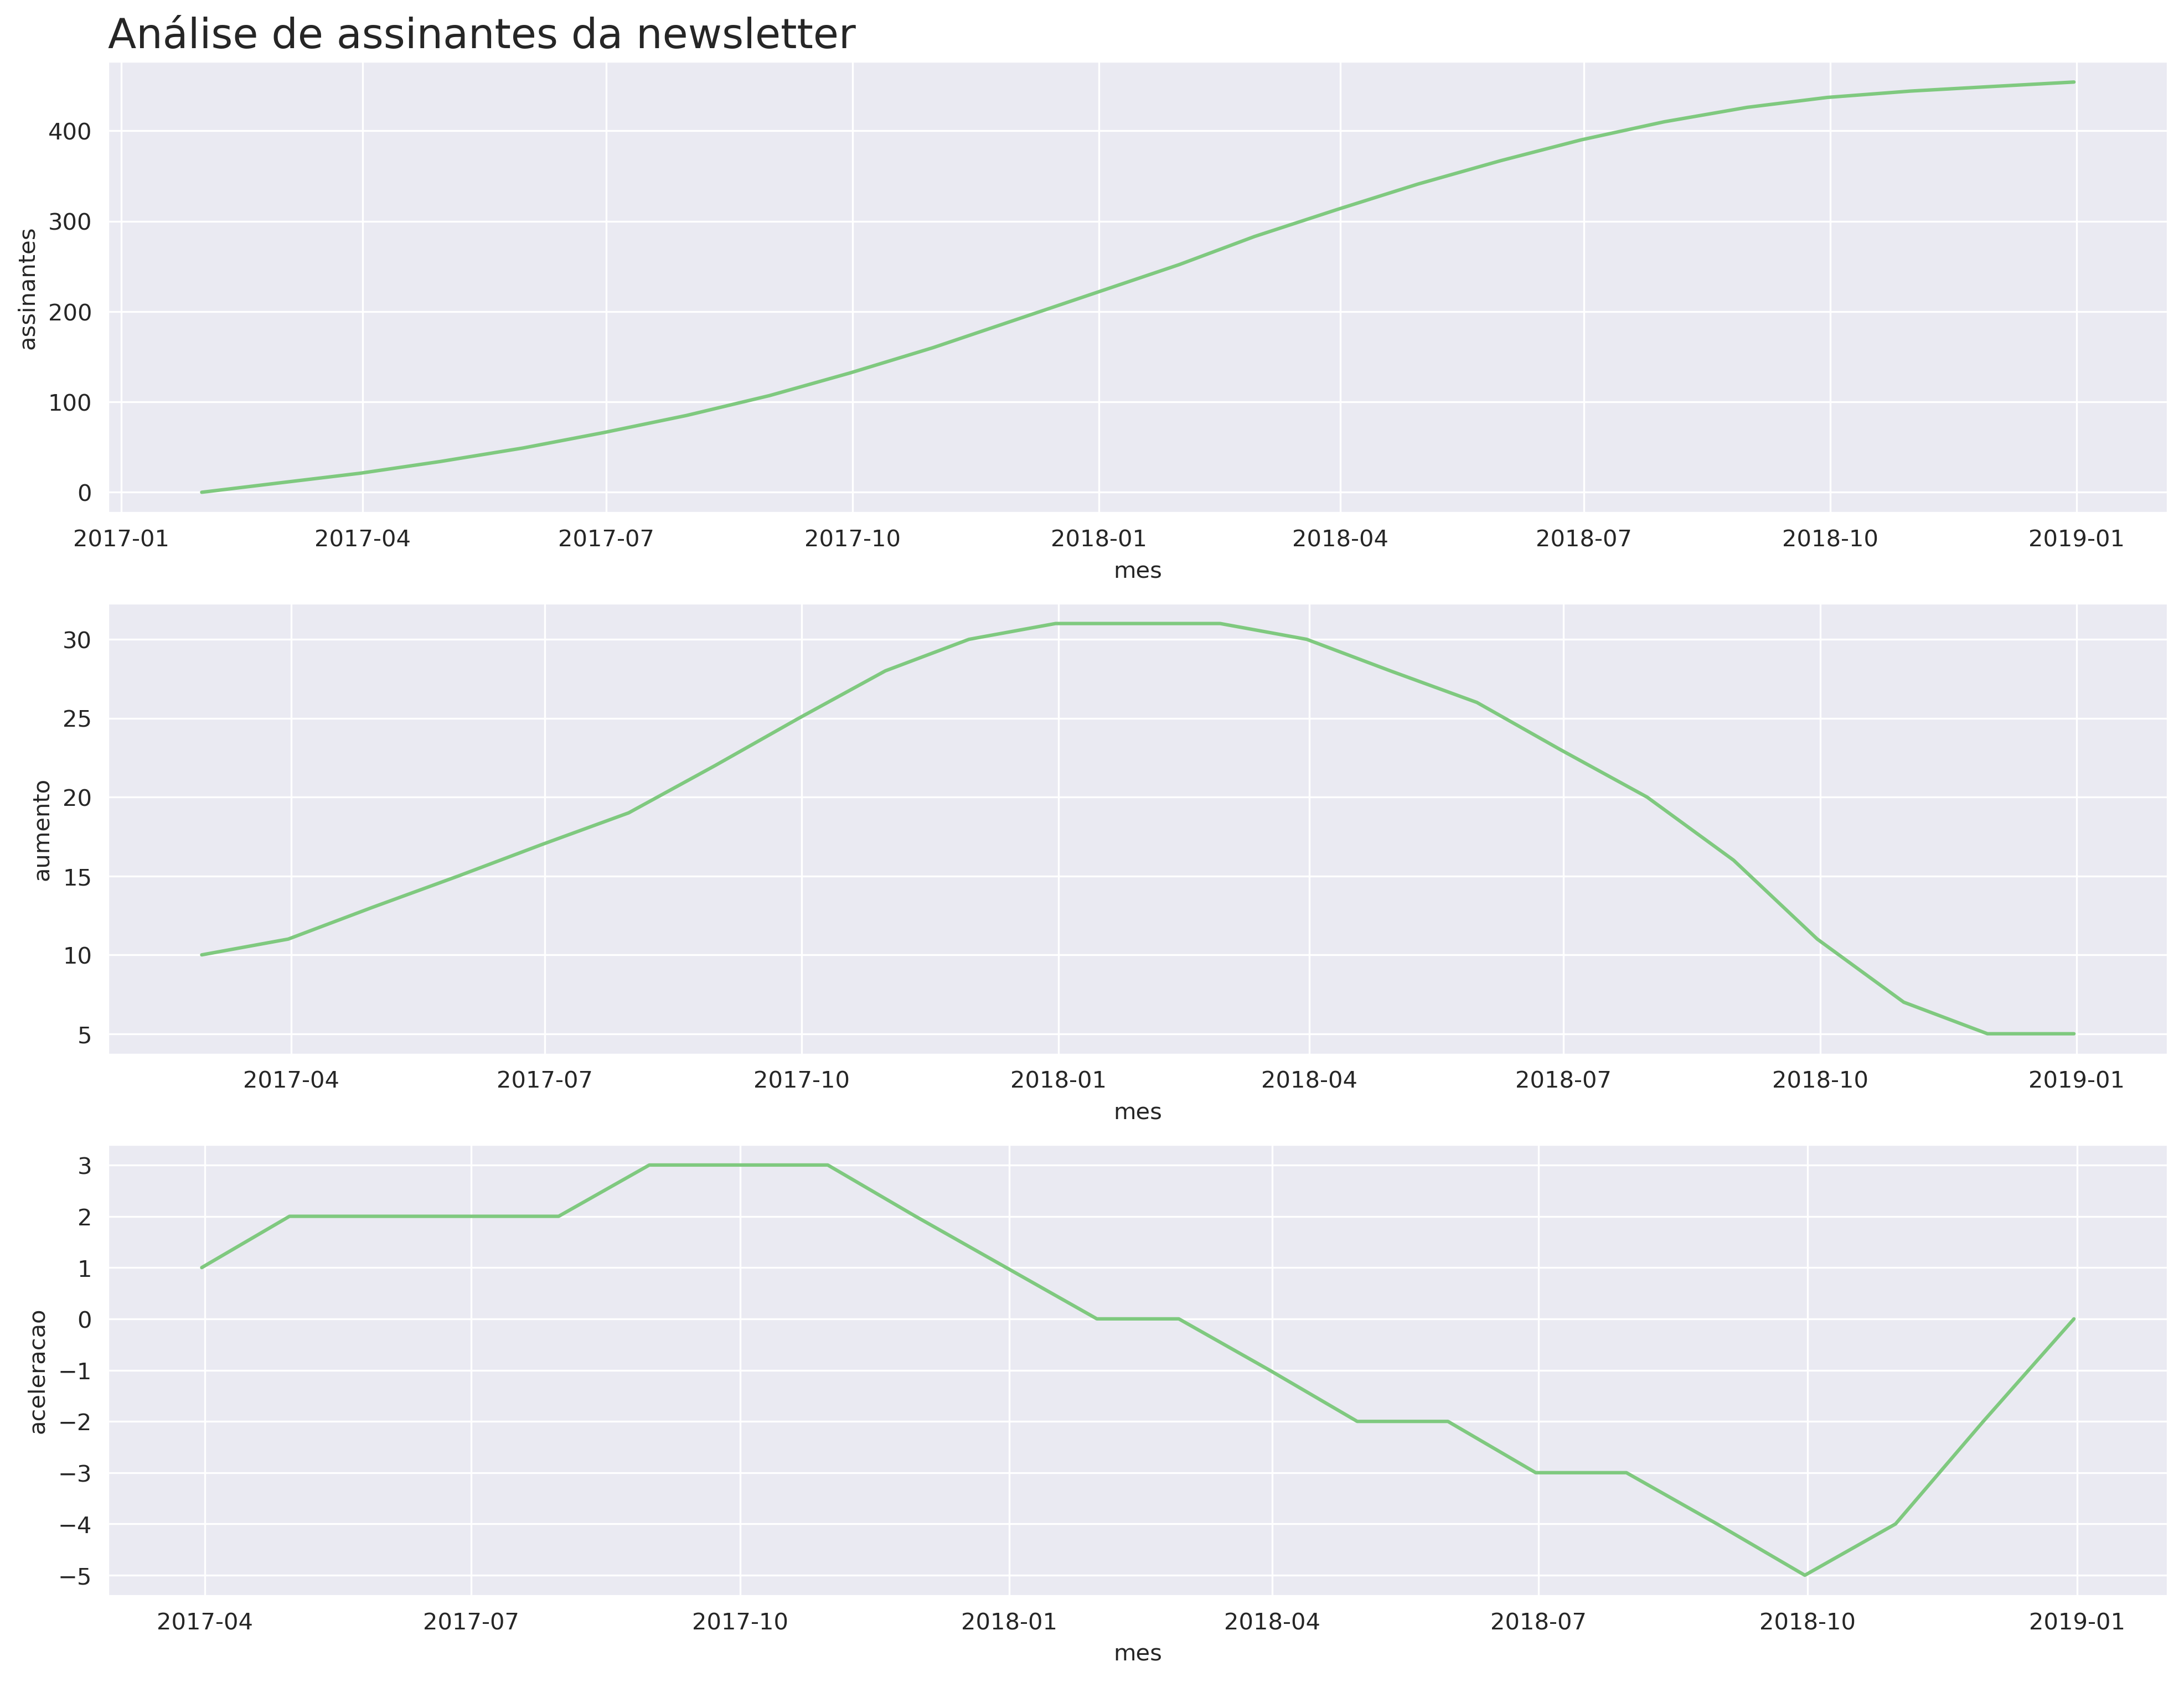

In [93]:
compare_plot(
    'mes',
    'assinantes',
    'aumento',
    'aceleracao',
    subscribers,
    'Análise de assinantes da newsletter'
)

# Analisando as vendas - Chocolura

In [94]:
chocolura = pd.read_csv('chocolura.csv')

In [95]:
chocolura.head()

mes  vendas
0  2017-01     210
1  2017-02     185
2  2017-03     209
3  2017-04     280
4  2017-05     211

In [96]:
chocolura.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   mes     24 non-null     object
 1   vendas  24 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 512.0+ bytes


In [97]:
chocolura.dtypes

mes       object
vendas     int64
dtype: object

In [98]:
chocolura['mes'] = pd.to_datetime(chocolura['mes'])
chocolura.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

In [99]:
print(f'Os dados possuem {chocolura.shape[0]} registros e {chocolura.shape[1]} variáveis')
print(f'Quantidade de dados nulos: {chocolura.isna().sum().sum()}')

Os dados possuem 24 registros e 2 variáveis
Quantidade de dados nulos: 0


In [100]:
chocolura['aumento'] = chocolura['vendas'].diff()
chocolura['aceleracao'] = chocolura['aumento'].diff()
chocolura.head()

mes  vendas  aumento  aceleracao
0 2017-01-01     210      NaN         NaN
1 2017-02-01     185    -25.0         NaN
2 2017-03-01     209     24.0        49.0
3 2017-04-01     280     71.0        47.0
4 2017-05-01     211    -69.0      -140.0

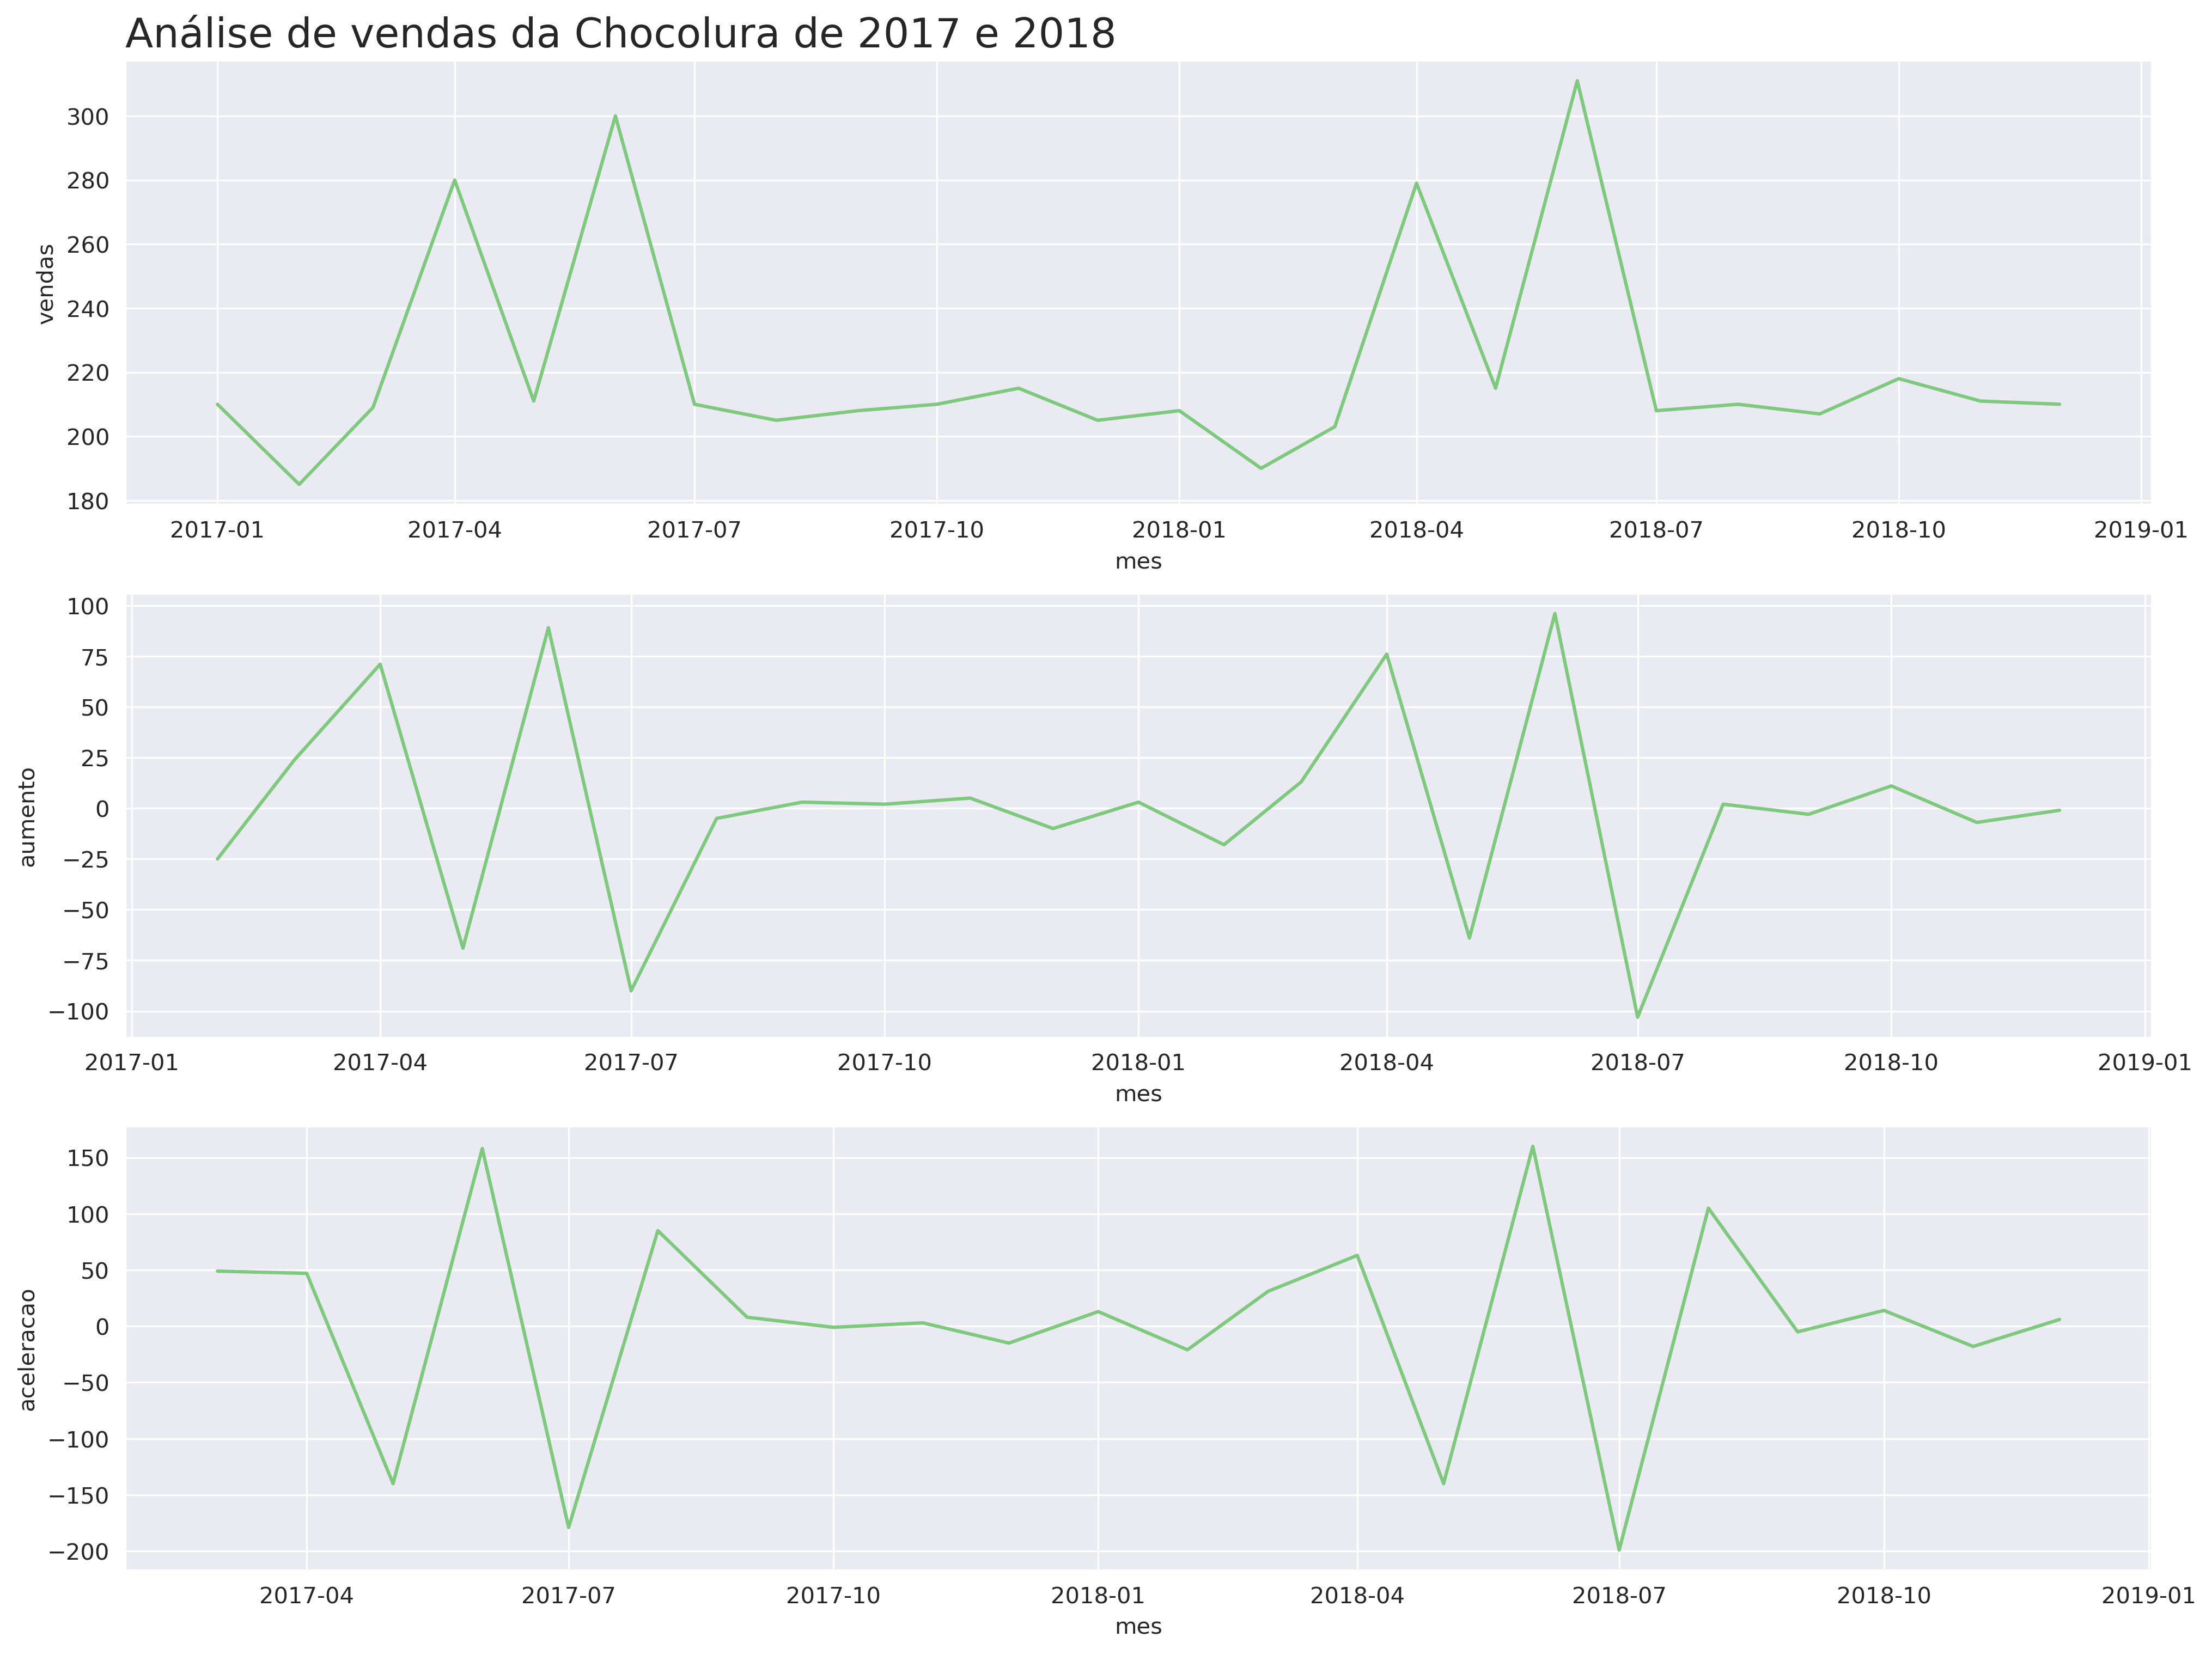

In [101]:
compare_plot(
    'mes',
    'vendas',
    'aumento',
    'aceleracao',
    chocolura,
    'Análise de vendas da Chocolura de 2017 e 2018'
)

# Chocolura - Vendas diárias (Out e Nov)

In [102]:
sales_per_day = pd.read_csv('vendas_por_dia.csv')

In [103]:
sales_per_day.head()

dia  vendas
0  2018-10-01      50
1  2018-10-02      48
2  2018-10-03      56
3  2018-10-04      50
4  2018-10-05      51

In [104]:
print(f'Os dados possuem {sales_per_day.shape[0]} registros e {sales_per_day.shape[1]} variáveis')
print(f'Quantidade de dados nulos: {sales_per_day.isna().sum().sum()}')

Os dados possuem 61 registros e 2 variáveis
Quantidade de dados nulos: 0


In [105]:
sales_per_day.dtypes

dia       object
vendas     int64
dtype: object

In [106]:
sales_per_day['dia'] = pd.to_datetime(sales_per_day['dia'])
sales_per_day.dtypes

dia       datetime64[ns]
vendas             int64
dtype: object

In [107]:
sales_per_day['aumento'] = sales_per_day['vendas'].diff()
sales_per_day['aceleracao'] = sales_per_day['aumento'].diff()

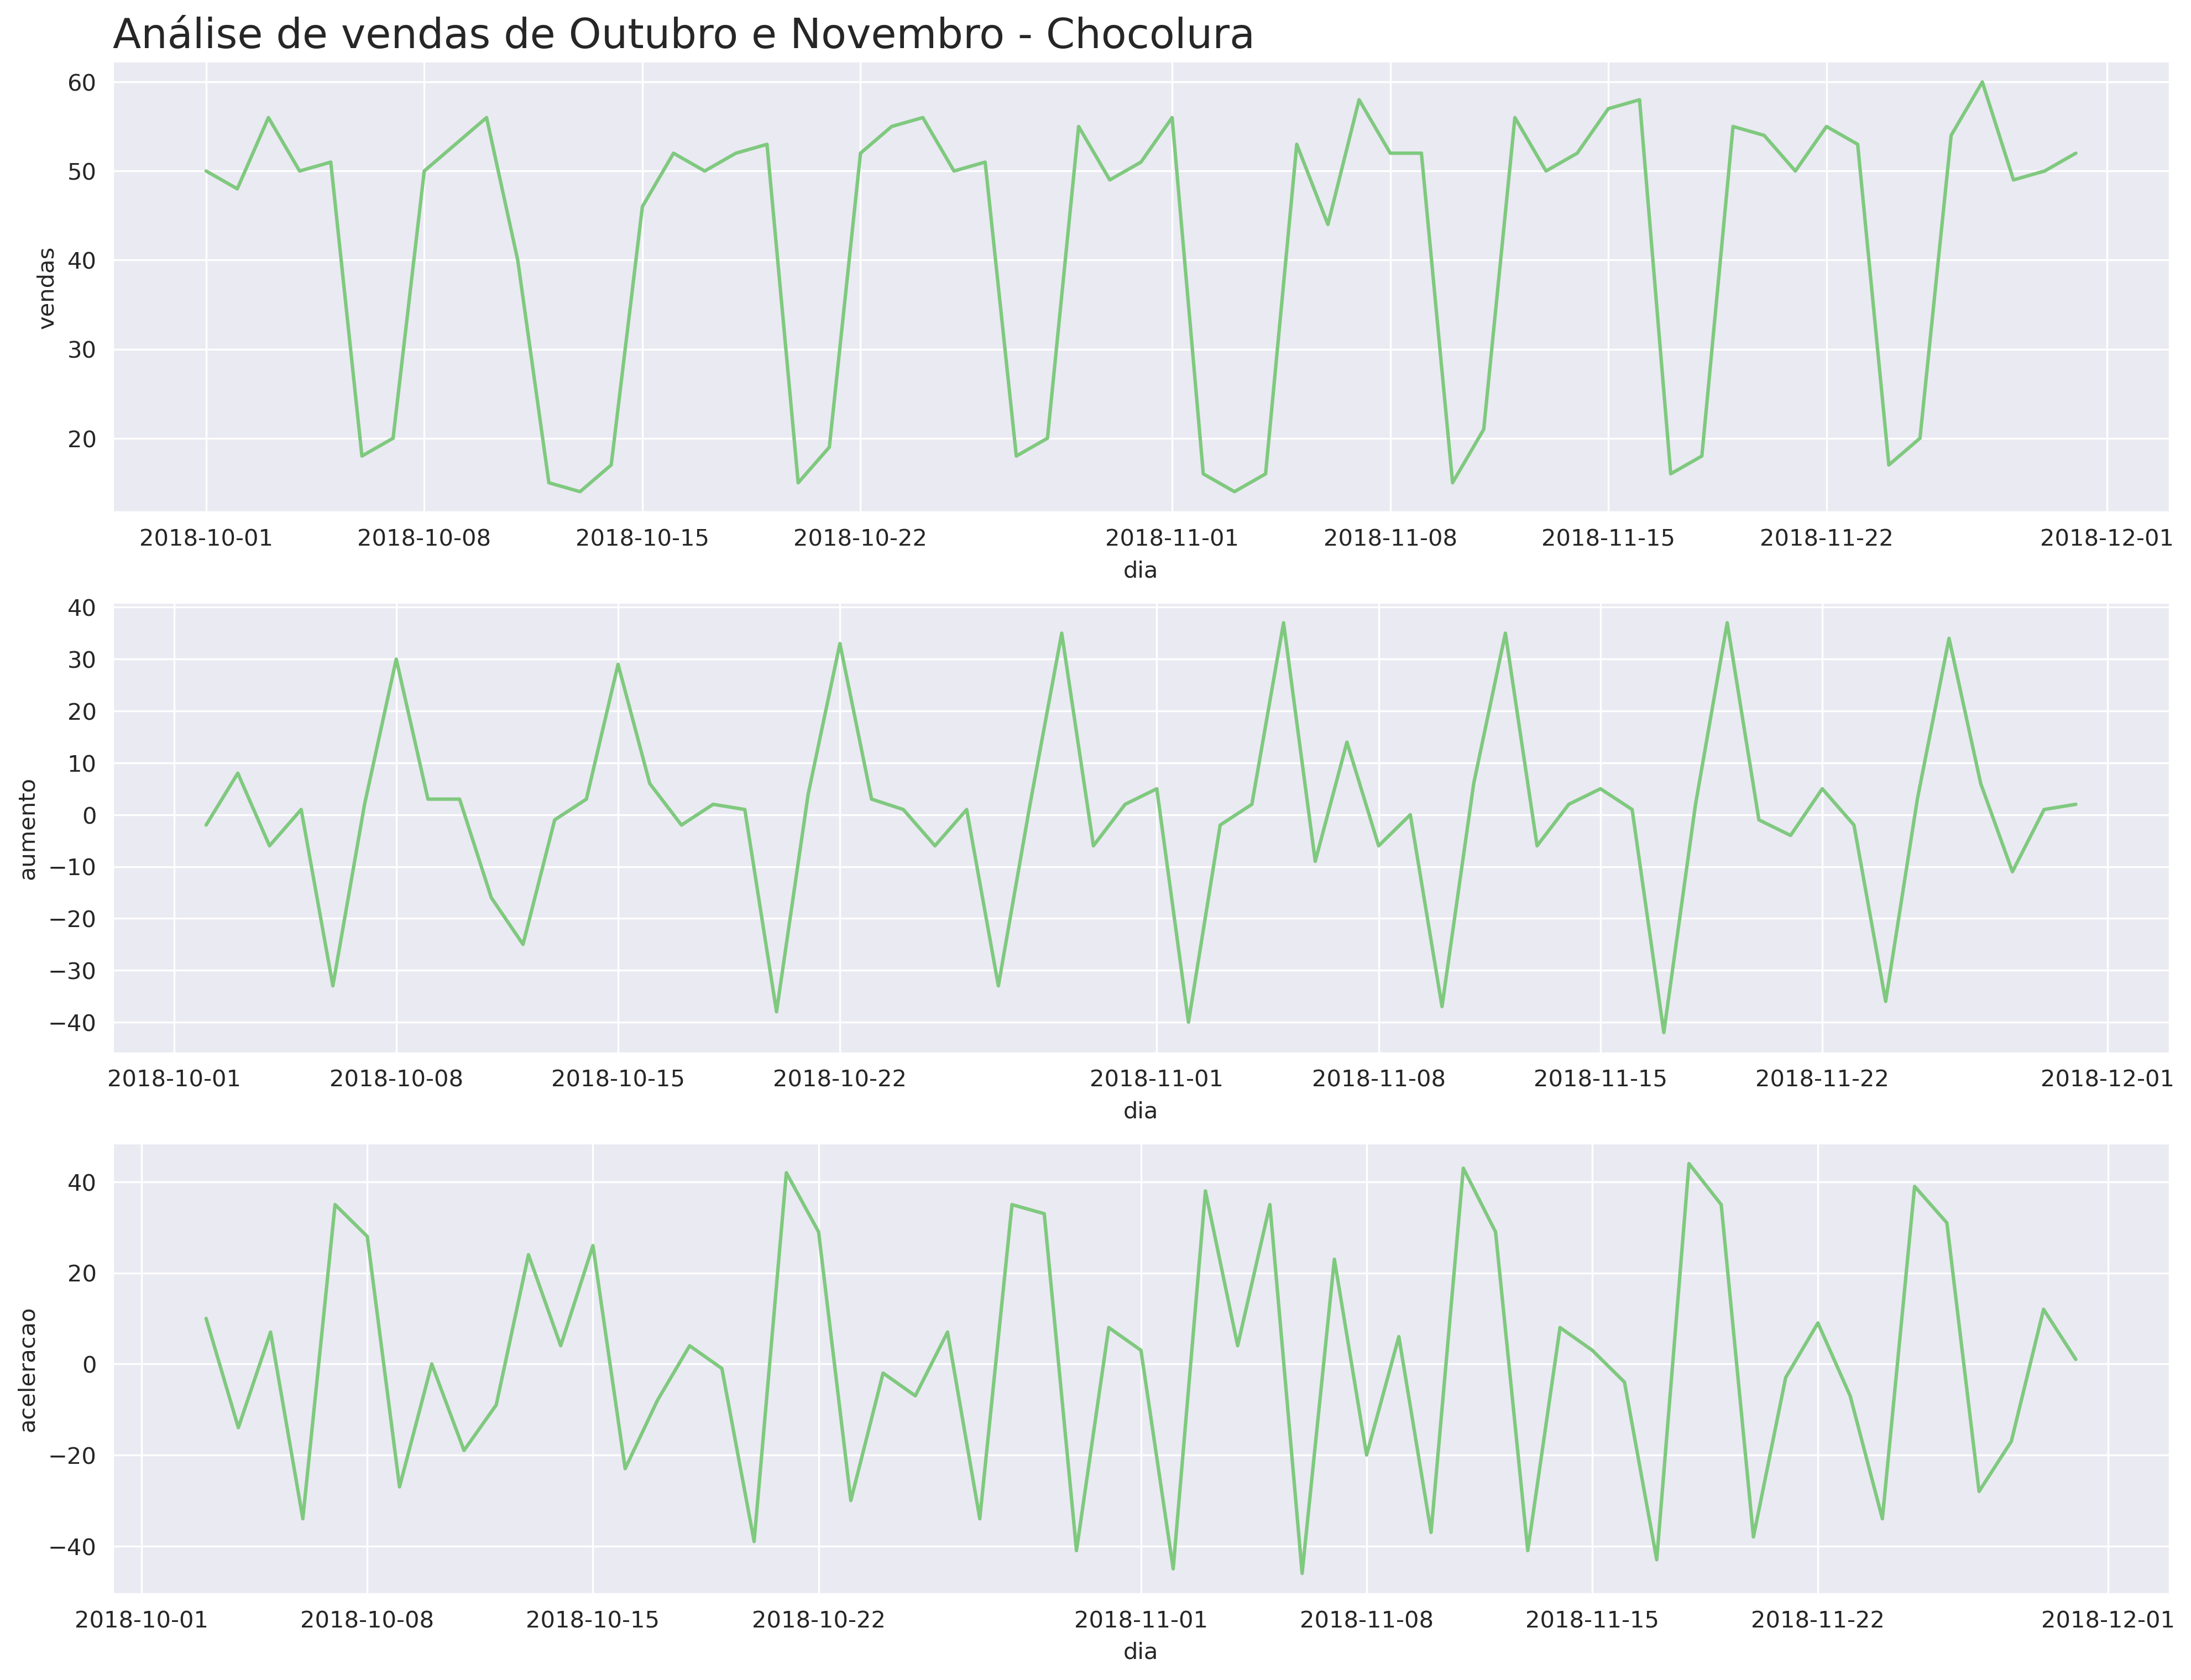

In [108]:
compare_plot(
    'dia',
    'vendas',
    'aumento',
    'aceleracao',
    sales_per_day,
    'Análise de vendas de Outubro e Novembro - Chocolura'
)

## Analisando a sazonalidade

In [109]:
sales_per_day['dia_da_semana'] = sales_per_day['dia'].dt.day_name()
sales_per_day.head(7)

dia  vendas  aumento  aceleracao dia_da_semana
0 2018-10-01      50      NaN         NaN        Monday
1 2018-10-02      48     -2.0         NaN       Tuesday
2 2018-10-03      56      8.0        10.0     Wednesday
3 2018-10-04      50     -6.0       -14.0      Thursday
4 2018-10-05      51      1.0         7.0        Friday
5 2018-10-06      18    -33.0       -34.0      Saturday
6 2018-10-07      20      2.0        35.0        Sunday

In [110]:
sales_per_day['dia_da_semana'].unique()

array(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday',
       'Sunday'], dtype=object)

In [111]:
days_translate = {
    'Monday' : 'Segunda-Feira',
    'Tuesday' : 'Terça-Feira',
    'Wednesday' : 'Quarta-Feira',
    'Thursday' : 'Quinta-Feira',
    'Friday' : 'Sexta-Feira',
    'Saturday' : 'Sábado',
    'Sunday' : 'Domingo'
}

In [112]:
sales_per_day['dia_da_semana'] = sales_per_day['dia_da_semana'].map(days_translate)
sales_per_day.head(14) # Pegando o período de 2 semanas

dia  vendas  aumento  aceleracao  dia_da_semana
0  2018-10-01      50      NaN         NaN  Segunda-Feira
1  2018-10-02      48     -2.0         NaN    Terça-Feira
2  2018-10-03      56      8.0        10.0   Quarta-Feira
3  2018-10-04      50     -6.0       -14.0   Quinta-Feira
4  2018-10-05      51      1.0         7.0    Sexta-Feira
5  2018-10-06      18    -33.0       -34.0         Sábado
6  2018-10-07      20      2.0        35.0        Domingo
7  2018-10-08      50     30.0        28.0  Segunda-Feira
8  2018-10-09      53      3.0       -27.0    Terça-Feira
9  2018-10-10      56      3.0         0.0   Quarta-Feira
10 2018-10-11      40    -16.0       -19.0   Quinta-Feira
11 2018-10-12      15    -25.0        -9.0    Sexta-Feira
12 2018-10-13      14     -1.0        24.0         Sábado
13 2018-10-14      17      3.0         4.0        Domingo

## Agrupando os dias

In [117]:
grouped_sales = sales_per_day.groupby('dia_da_semana')[['vendas', 'aumento', 'aceleracao']].mean().round()
grouped_sales.head(7)

vendas  aumento  aceleracao
dia_da_semana                             
Domingo          19.0      3.0        31.0
Quarta-Feira     53.0      1.0         2.0
Quinta-Feira     51.0     -2.0        -3.0
Segunda-Feira    52.0     34.0        31.0
Sexta-Feira      45.0     -7.0        -5.0
Sábado           16.0    -28.0       -20.0
Terça-Feira      52.0     -1.0       -34.0

## Correlação das vendas diárias

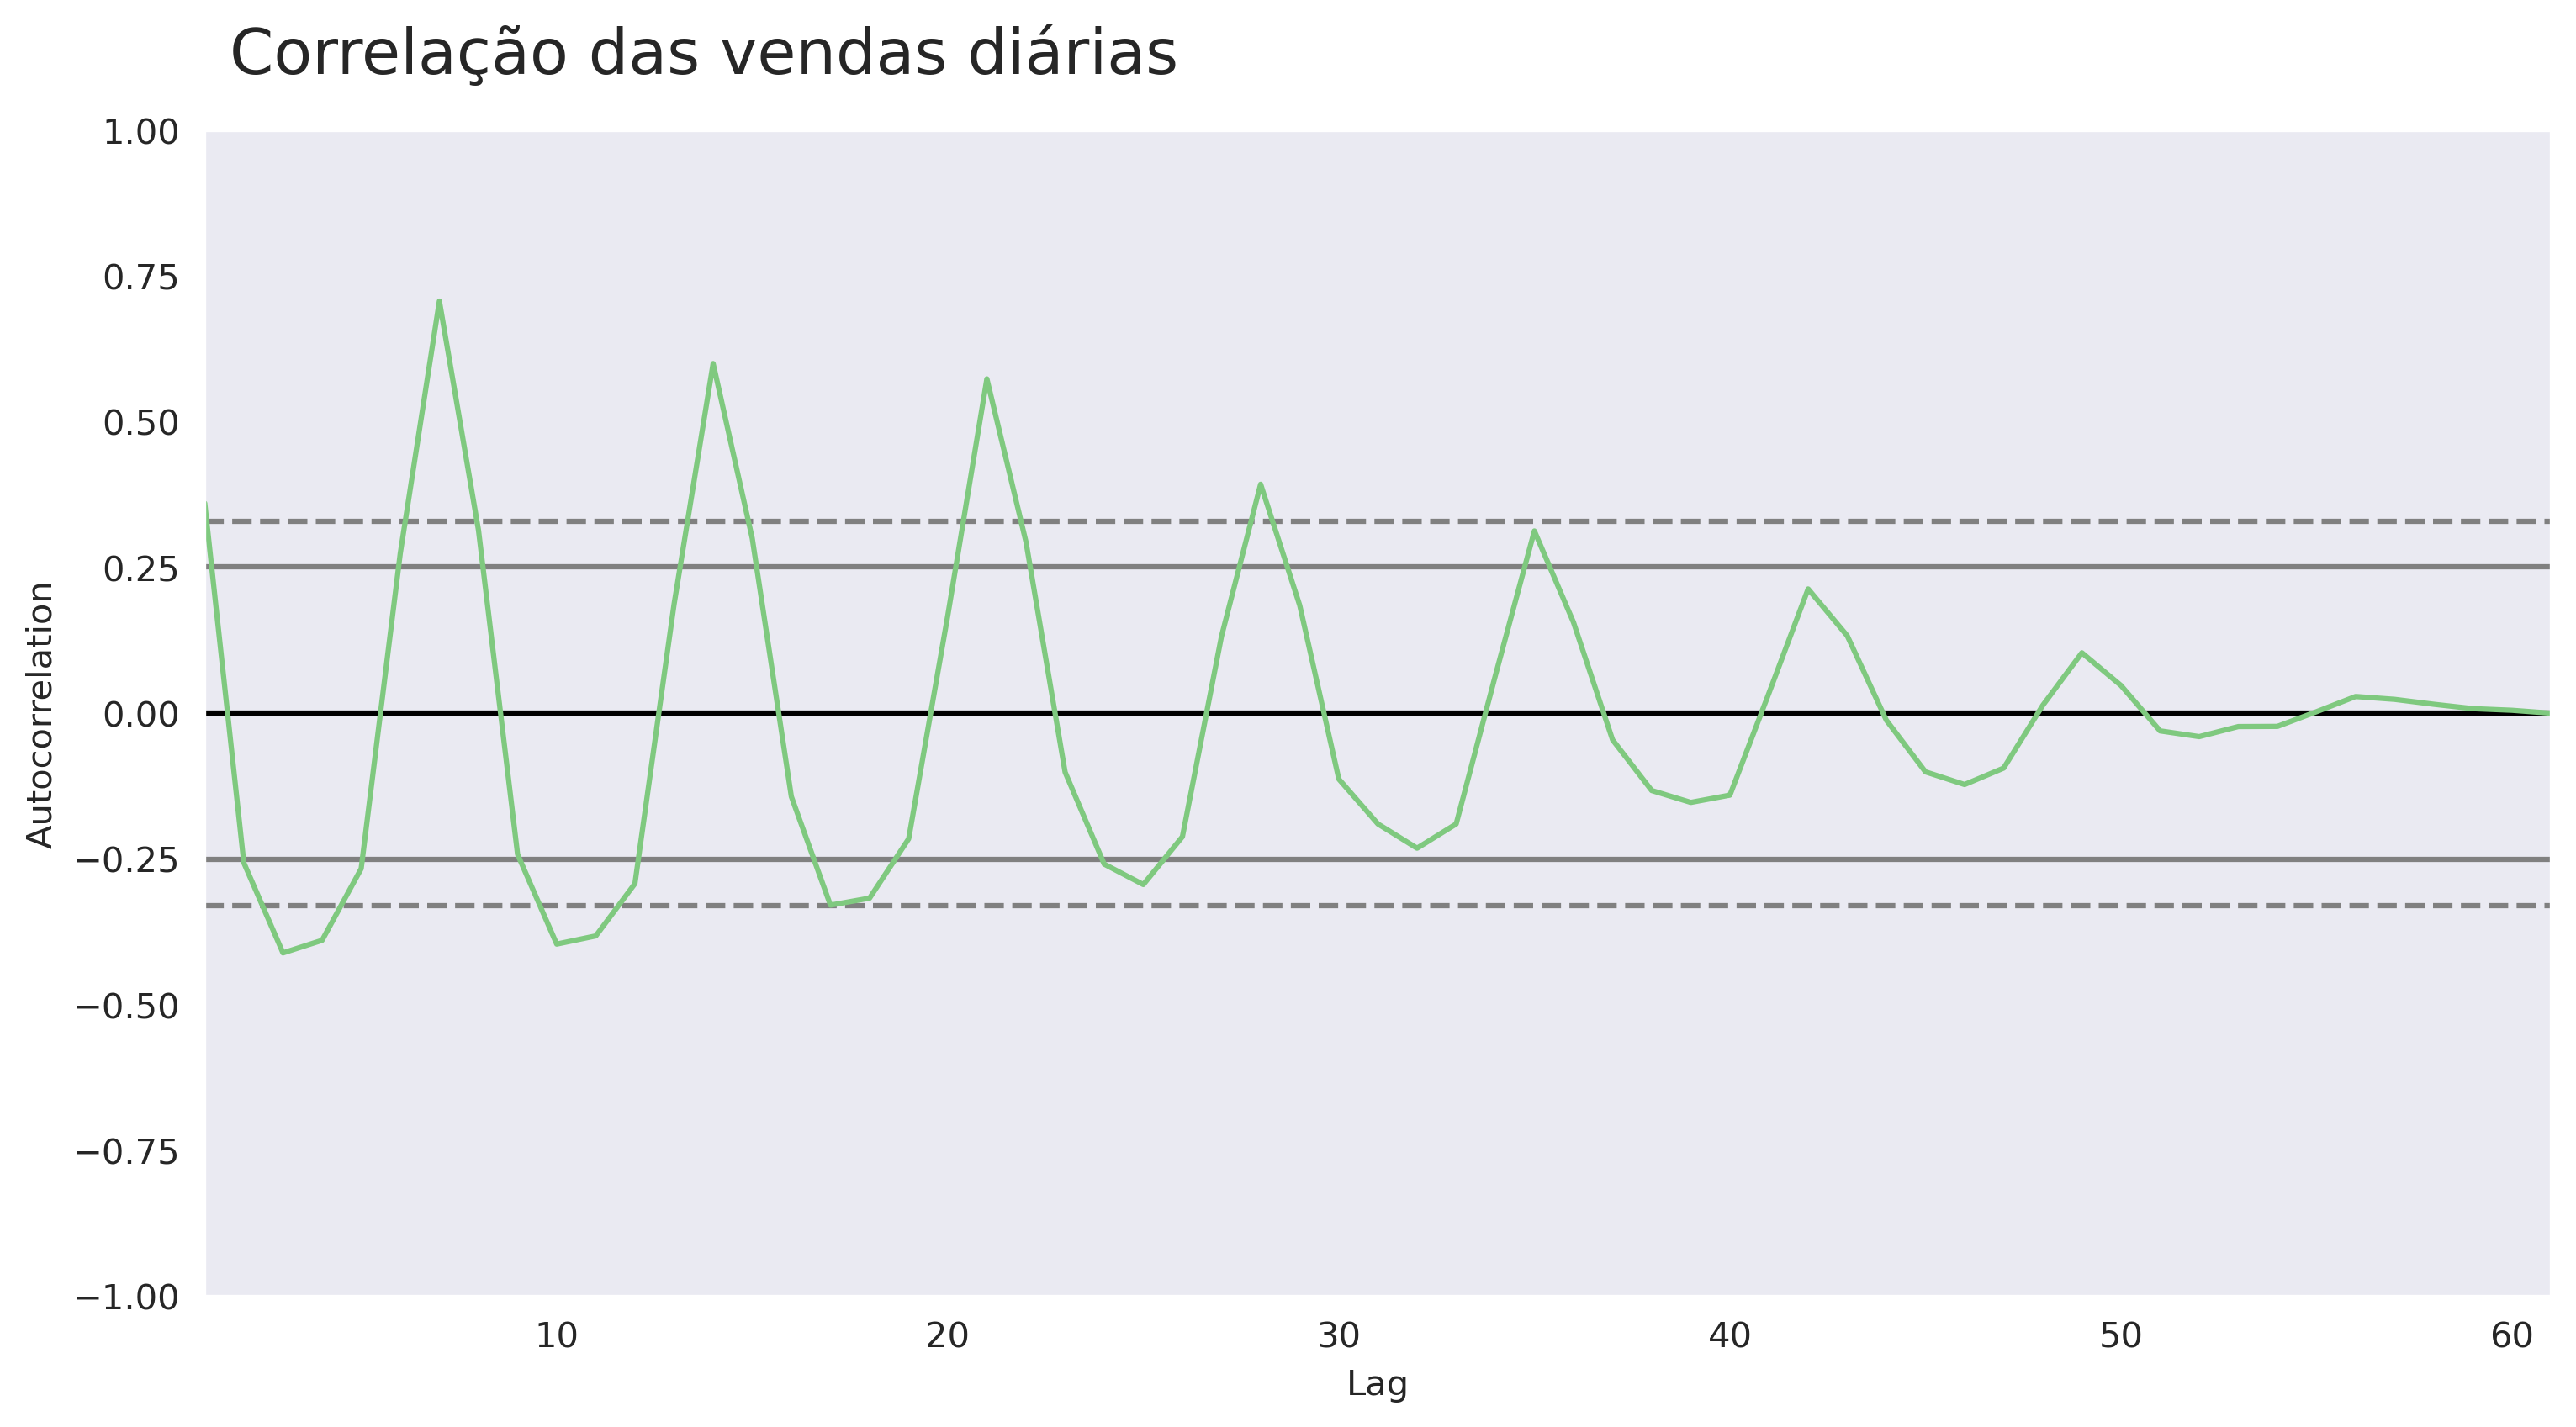

In [126]:
ax = plt.figure(figsize=(12, 6), dpi=300)
ax.suptitle('Correlação das vendas diárias', fontsize=18, x=.29, y=.95)
autocorrelation_plot(sales_per_day['vendas'])
plt.show()

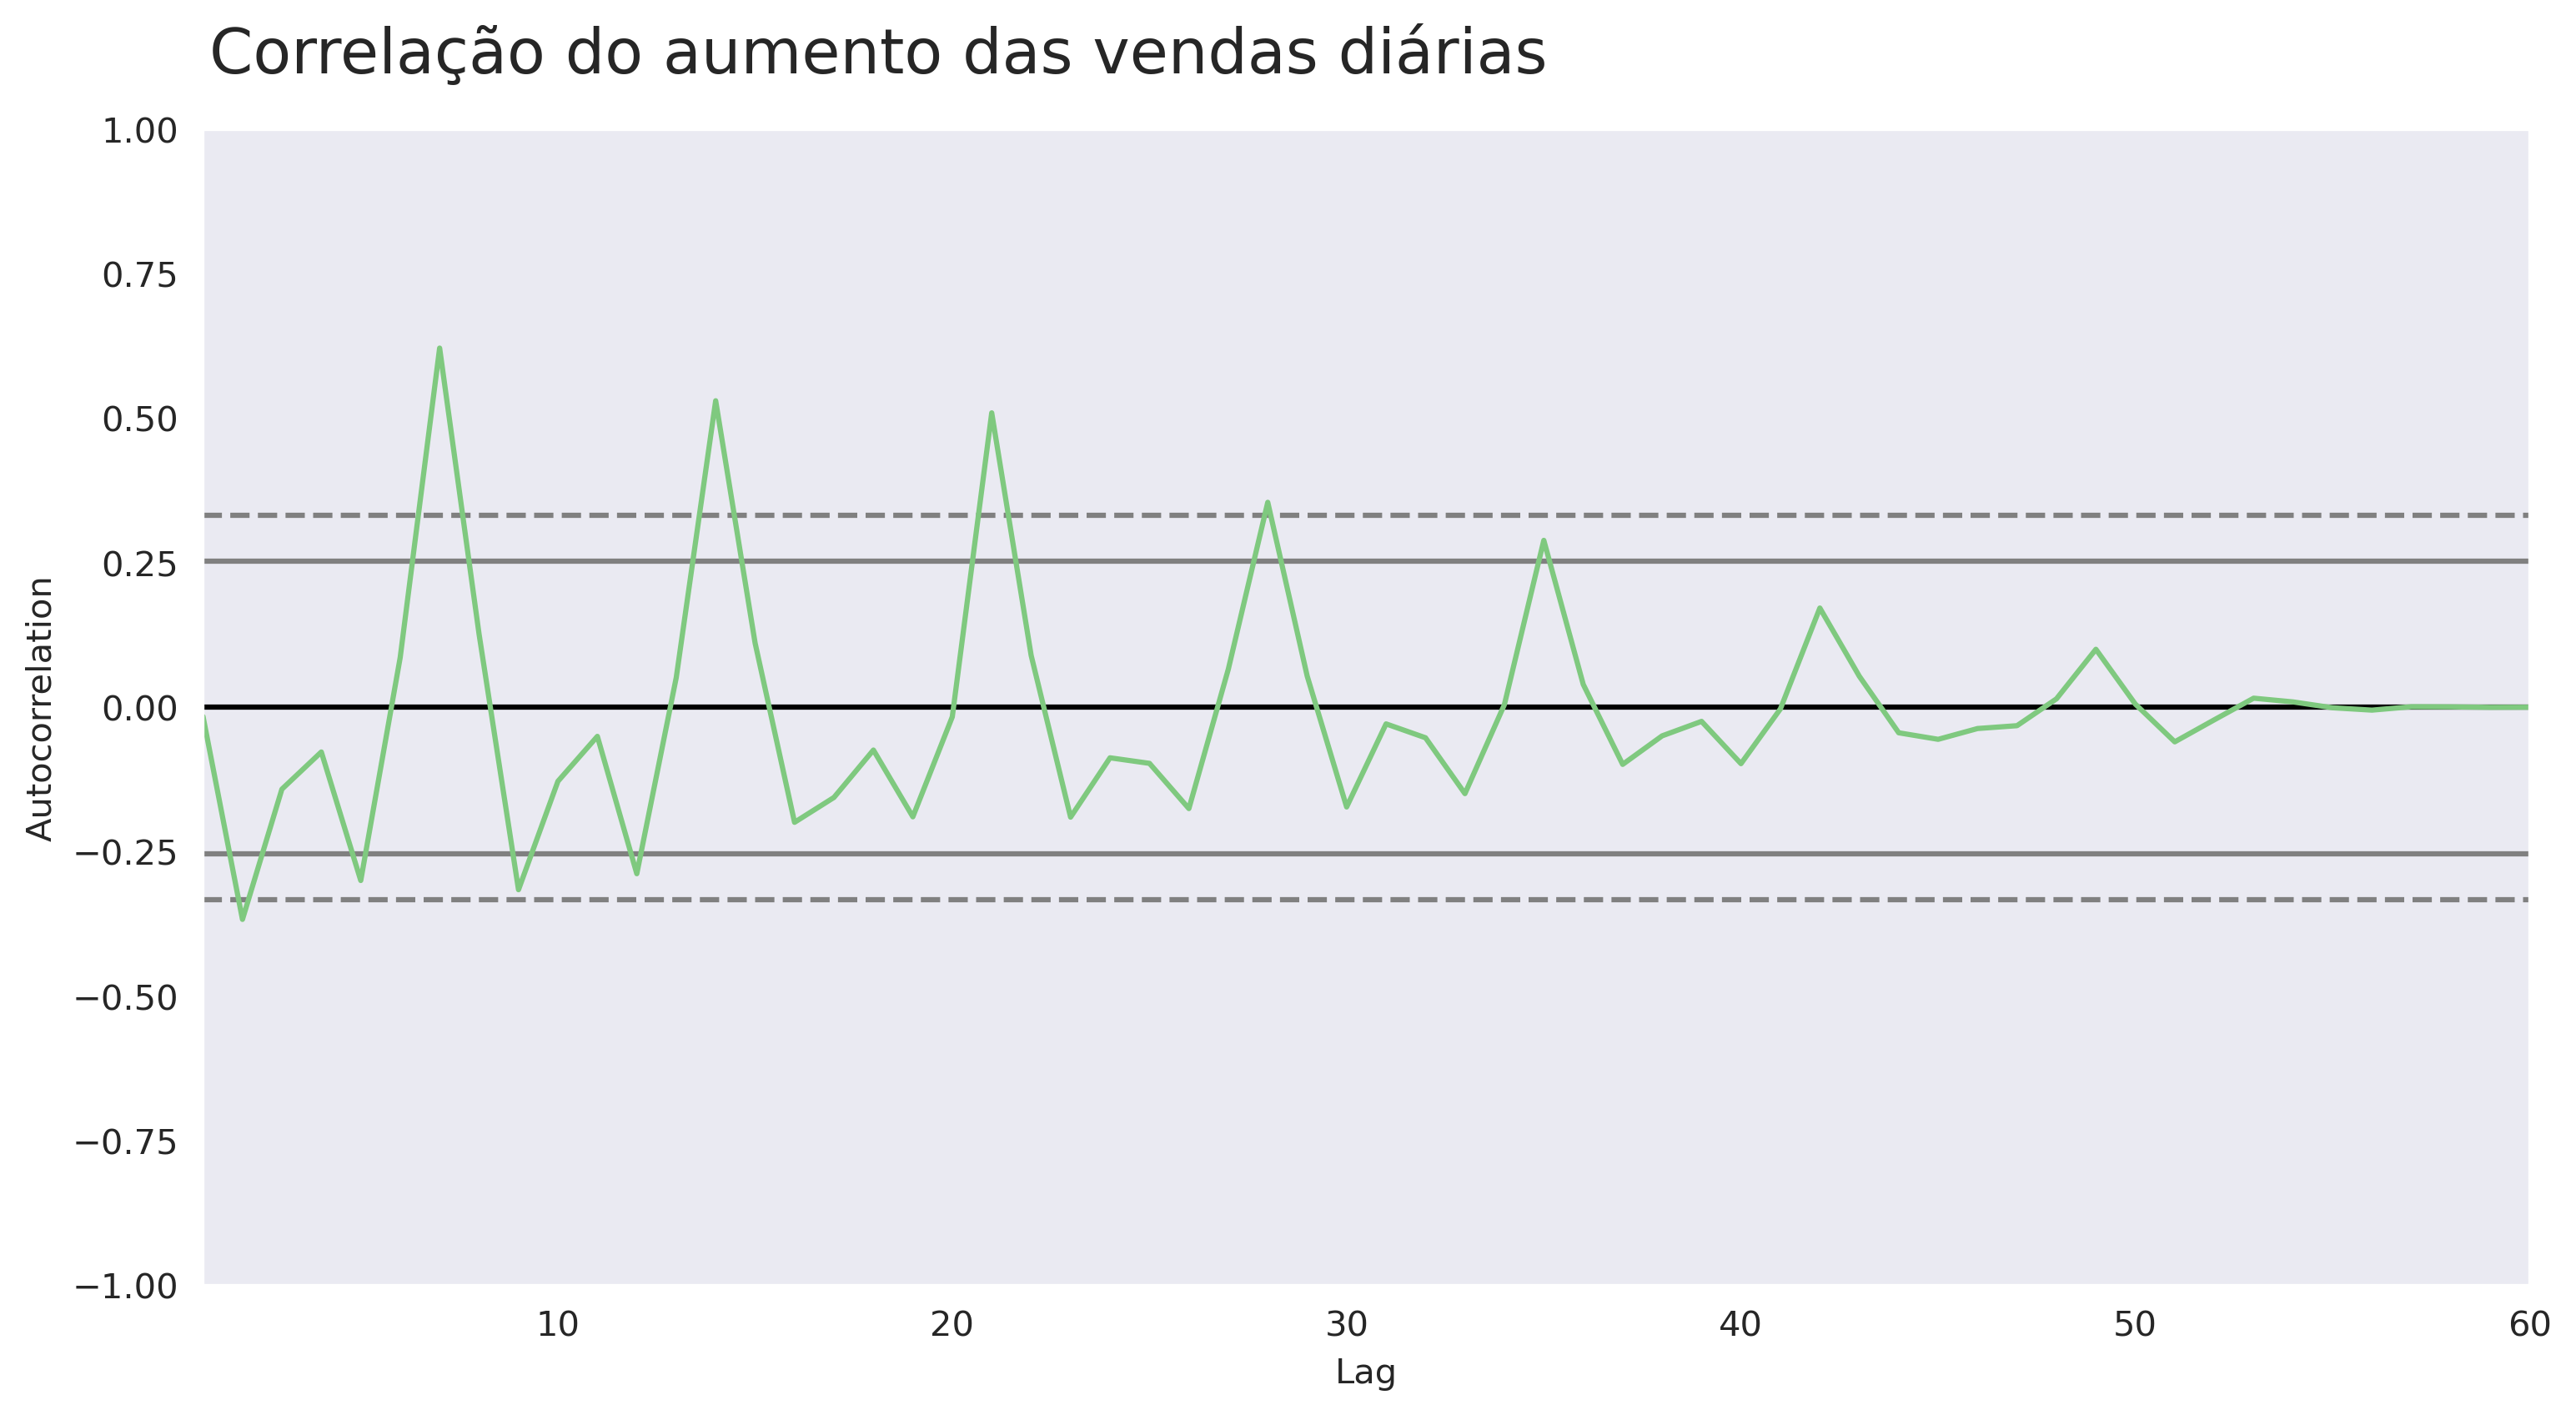

In [127]:
ax = plt.figure(figsize=(12, 6), dpi=300)
ax.suptitle('Correlação do aumento das vendas diárias', fontsize=18, x=.35, y=.95)
autocorrelation_plot(sales_per_day['aumento'][1:])
plt.show()

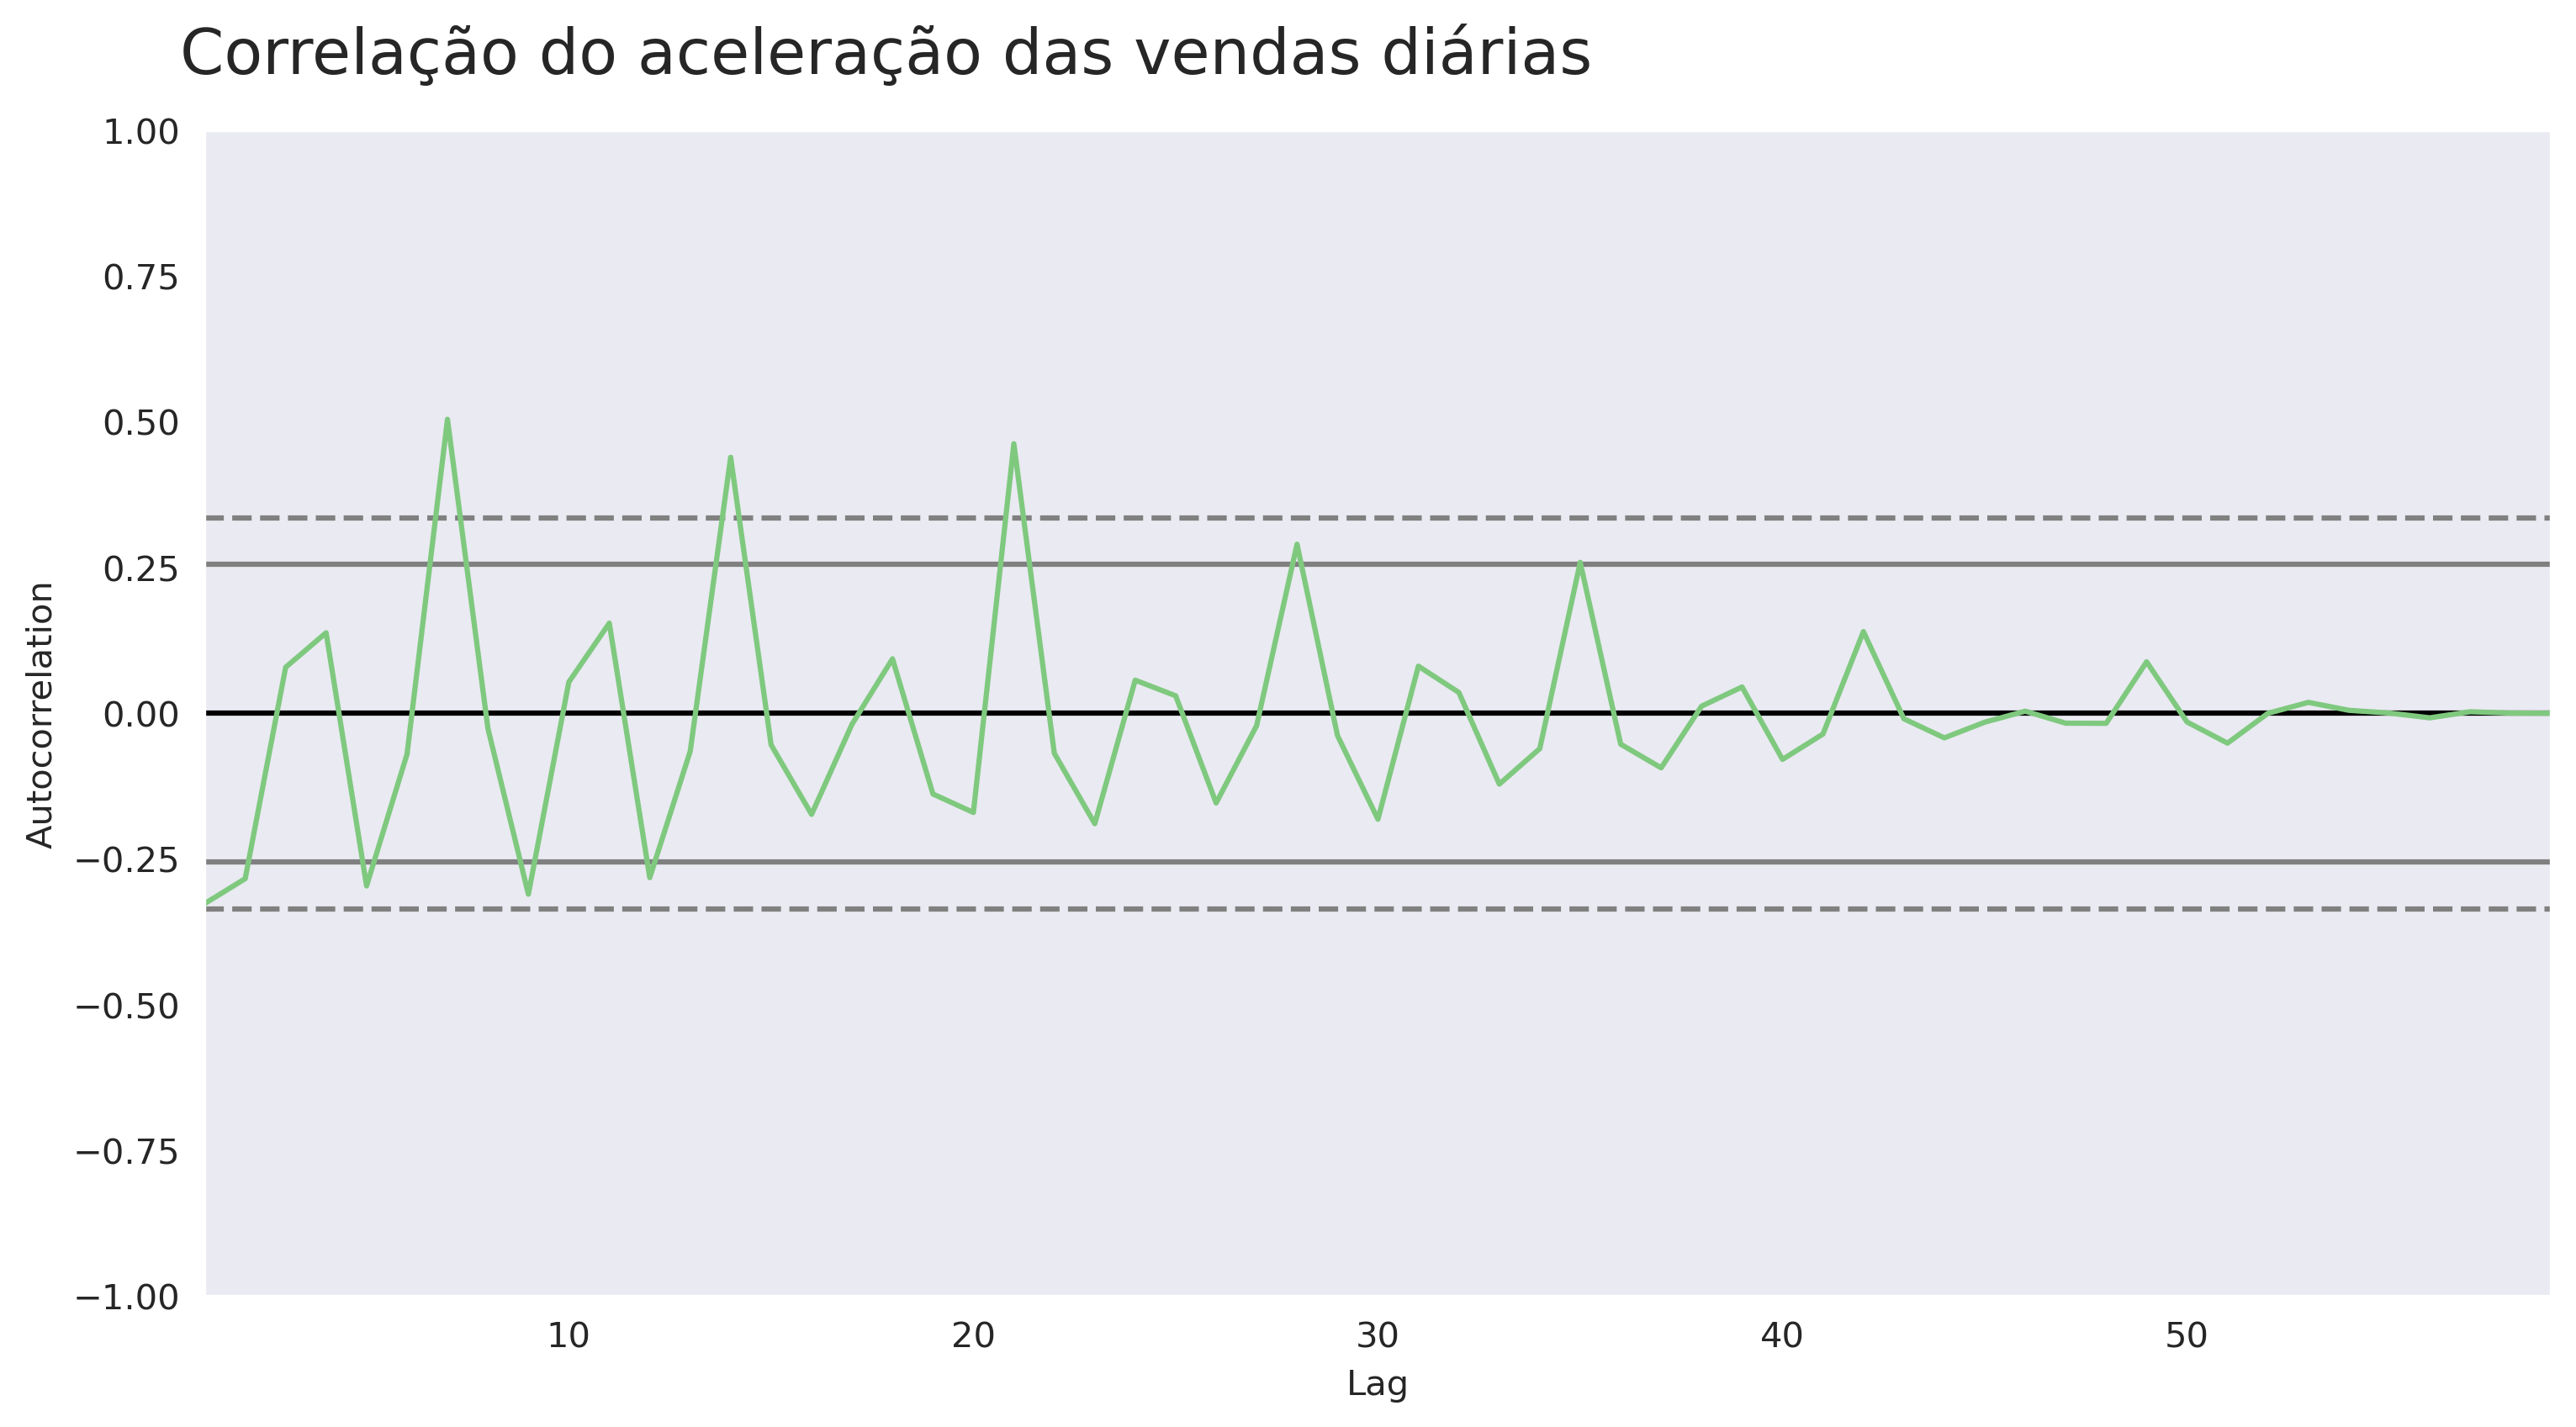

In [128]:
ax = plt.figure(figsize=(12, 6), dpi=300)
ax.suptitle('Correlação do aceleração das vendas diárias', fontsize=18, x=.35, y=.95)
autocorrelation_plot(sales_per_day['aceleracao'][2:])
plt.show()

# Cafélura - Análise de vendas

In [129]:
cafelura = pd.read_csv('cafelura.csv')

In [130]:
cafelura.head()

mes  vendas
0  2017-01-31     880
1  2017-02-28    1600
2  2017-03-31    3240
3  2017-04-30    3840
4  2017-05-31    5670

In [131]:
cafelura.dtypes

mes       object
vendas     int64
dtype: object

In [133]:
cafelura['mes'] = pd.to_datetime(cafelura['mes'])
cafelura.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

In [134]:
print(f'Os dados possuem {cafelura.shape[0]} registros e {cafelura.shape[1]} variáveis')
print(f'Quantidade de dados nulos: {cafelura.isna().sum().sum()}')

Os dados possuem 24 registros e 2 variáveis
Quantidade de dados nulos: 0


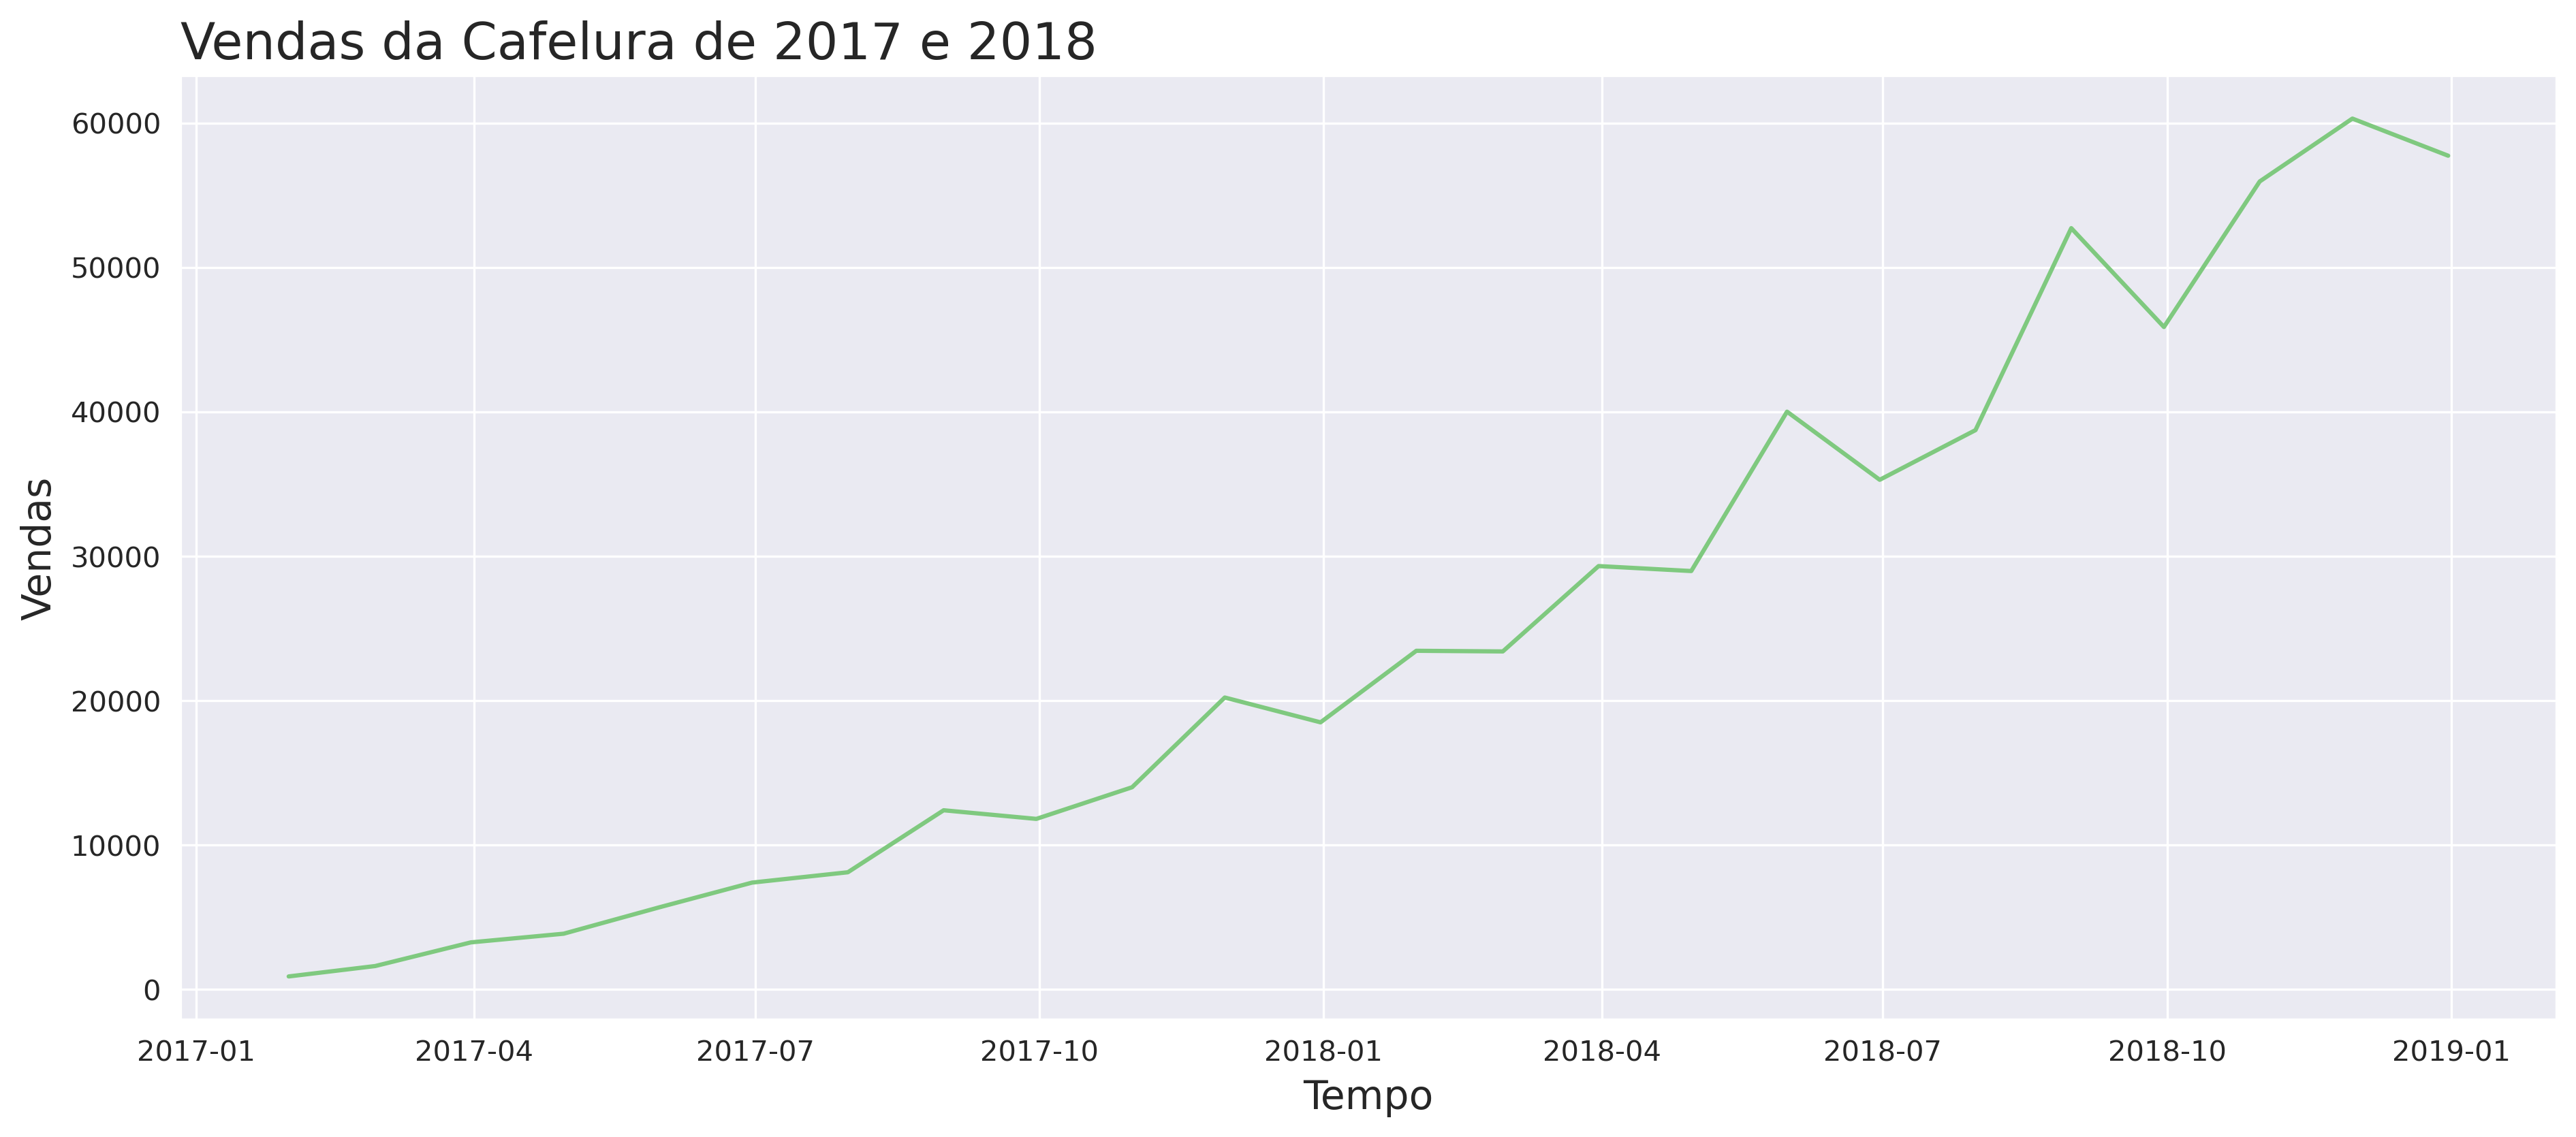

In [136]:
plot(
    'Vendas da Cafelura de 2017 e 2018',
    'Tempo',
    'Vendas',
    'mes',
    'vendas',
    cafelura
)

In [137]:
n_of_weekends = pd.read_csv('dias_final_de_semana.csv')
n_of_weekends.head()

quantidade_de_dias
0                   8
1                   8
2                  10
3                   8
4                   9

In [138]:
n_of_weekends['quantidade_de_dias'].values

array([ 8,  8, 10,  8,  9,  9,  8, 10,  8,  8, 10,  8,  9,  8,  9,  8, 10,
        8,  8, 10,  8,  9,  9,  8])

In [139]:
cafelura['vendas_normalizadas'] = cafelura['vendas'] / n_of_weekends['quantidade_de_dias'].values
cafelura.head()

mes  vendas  vendas_normalizadas
0 2017-01-31     880                110.0
1 2017-02-28    1600                200.0
2 2017-03-31    3240                324.0
3 2017-04-30    3840                480.0
4 2017-05-31    5670                630.0

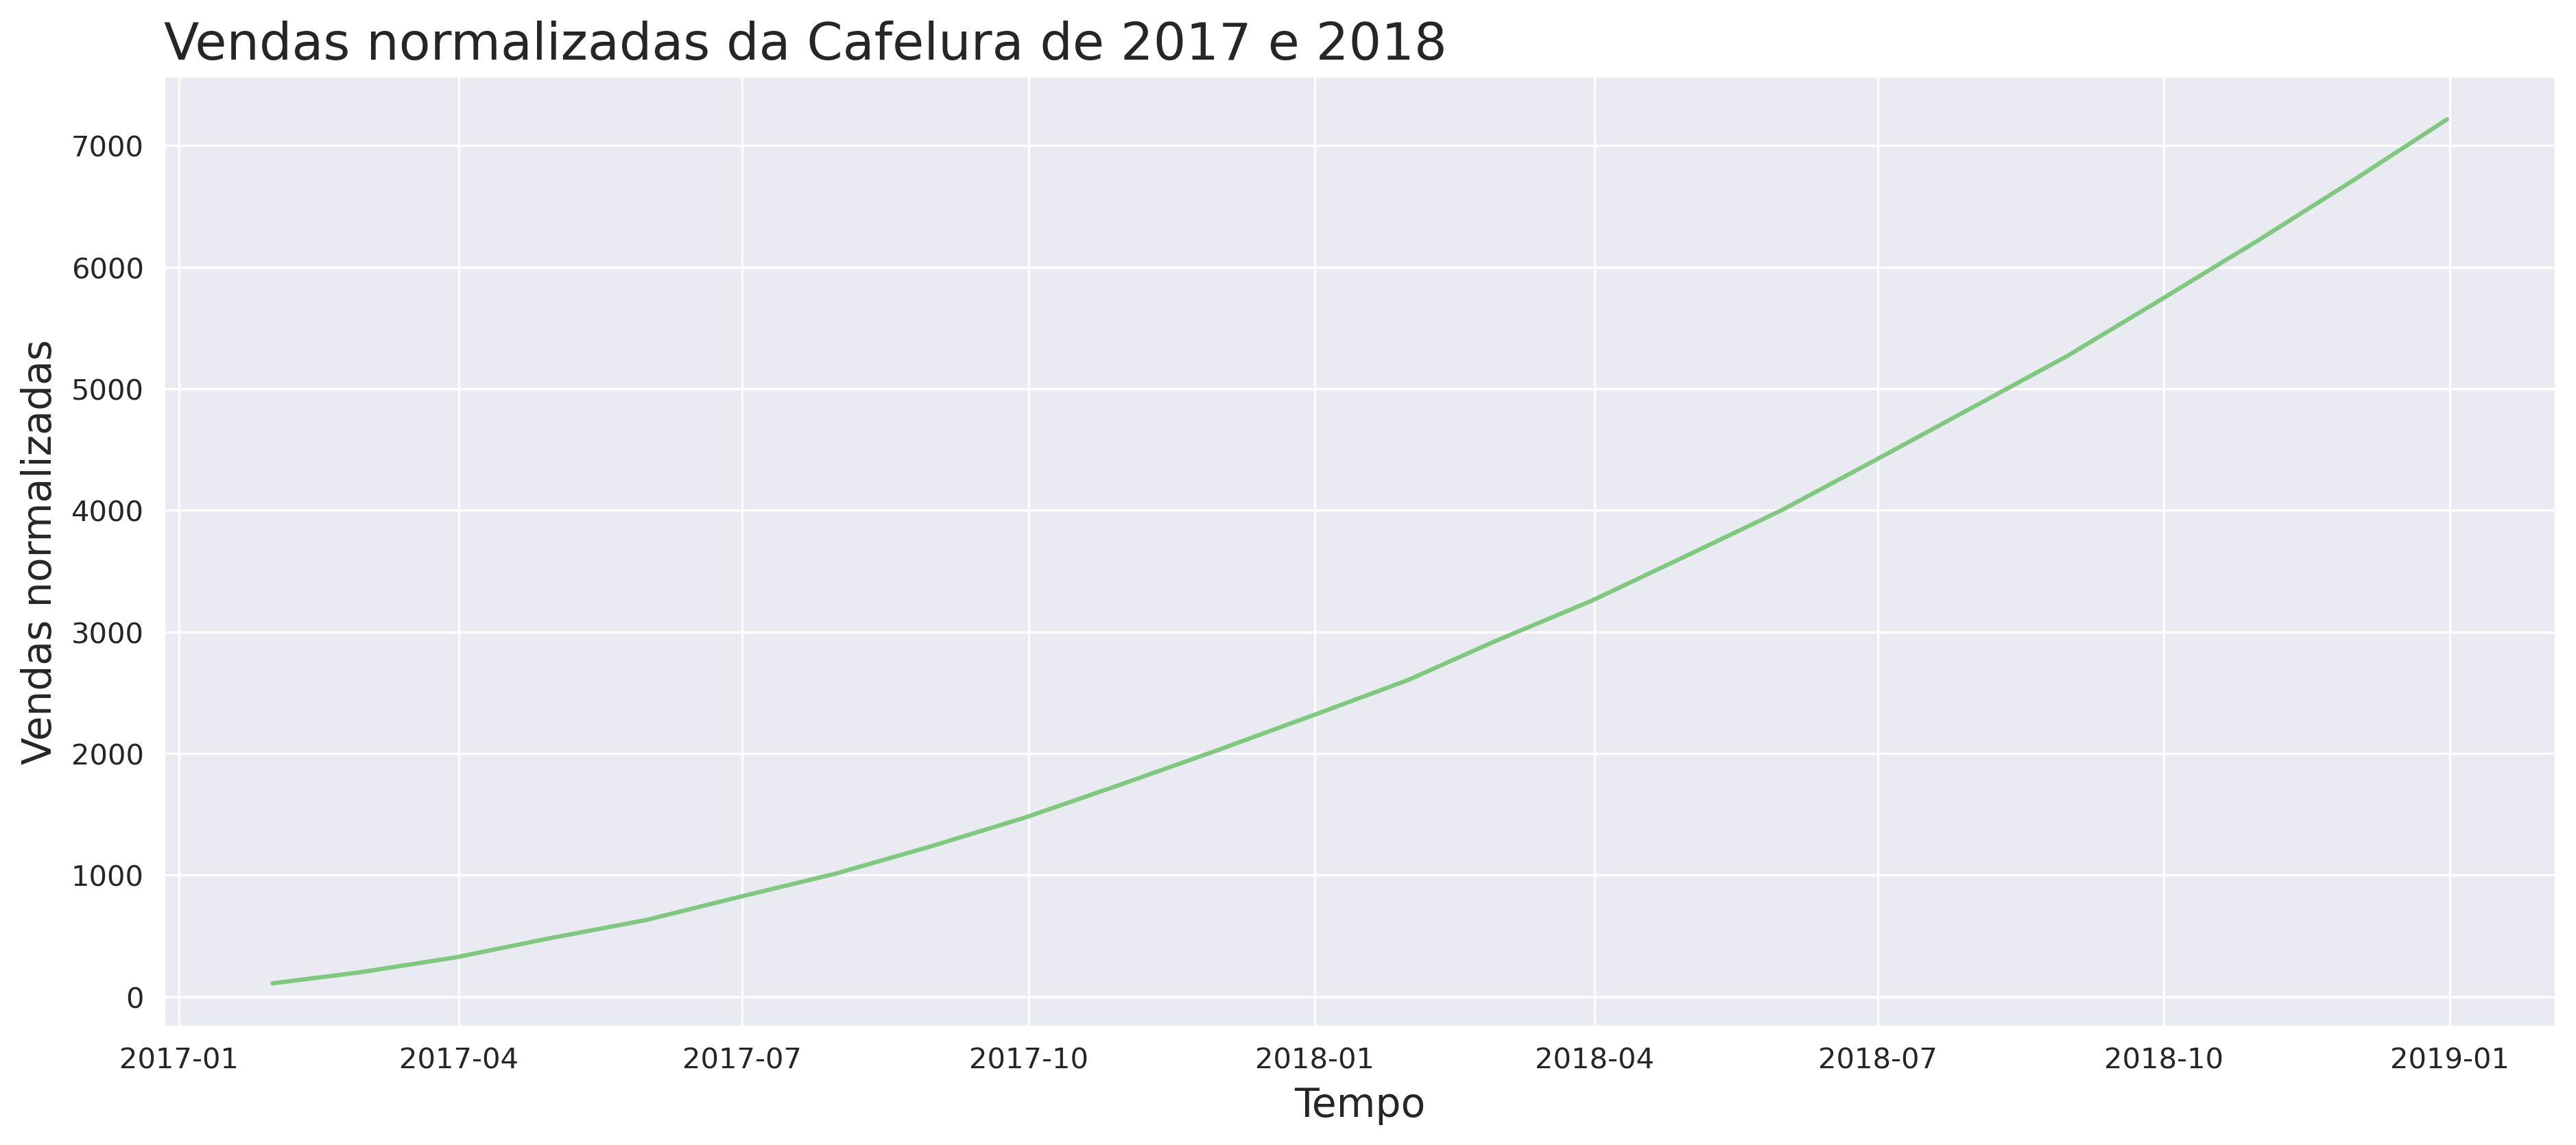

In [140]:
plot(
    'Vendas normalizadas da Cafelura de 2017 e 2018',
    'Tempo',
    'Vendas normalizadas',
    'mes',
    'vendas_normalizadas',
    cafelura    
)

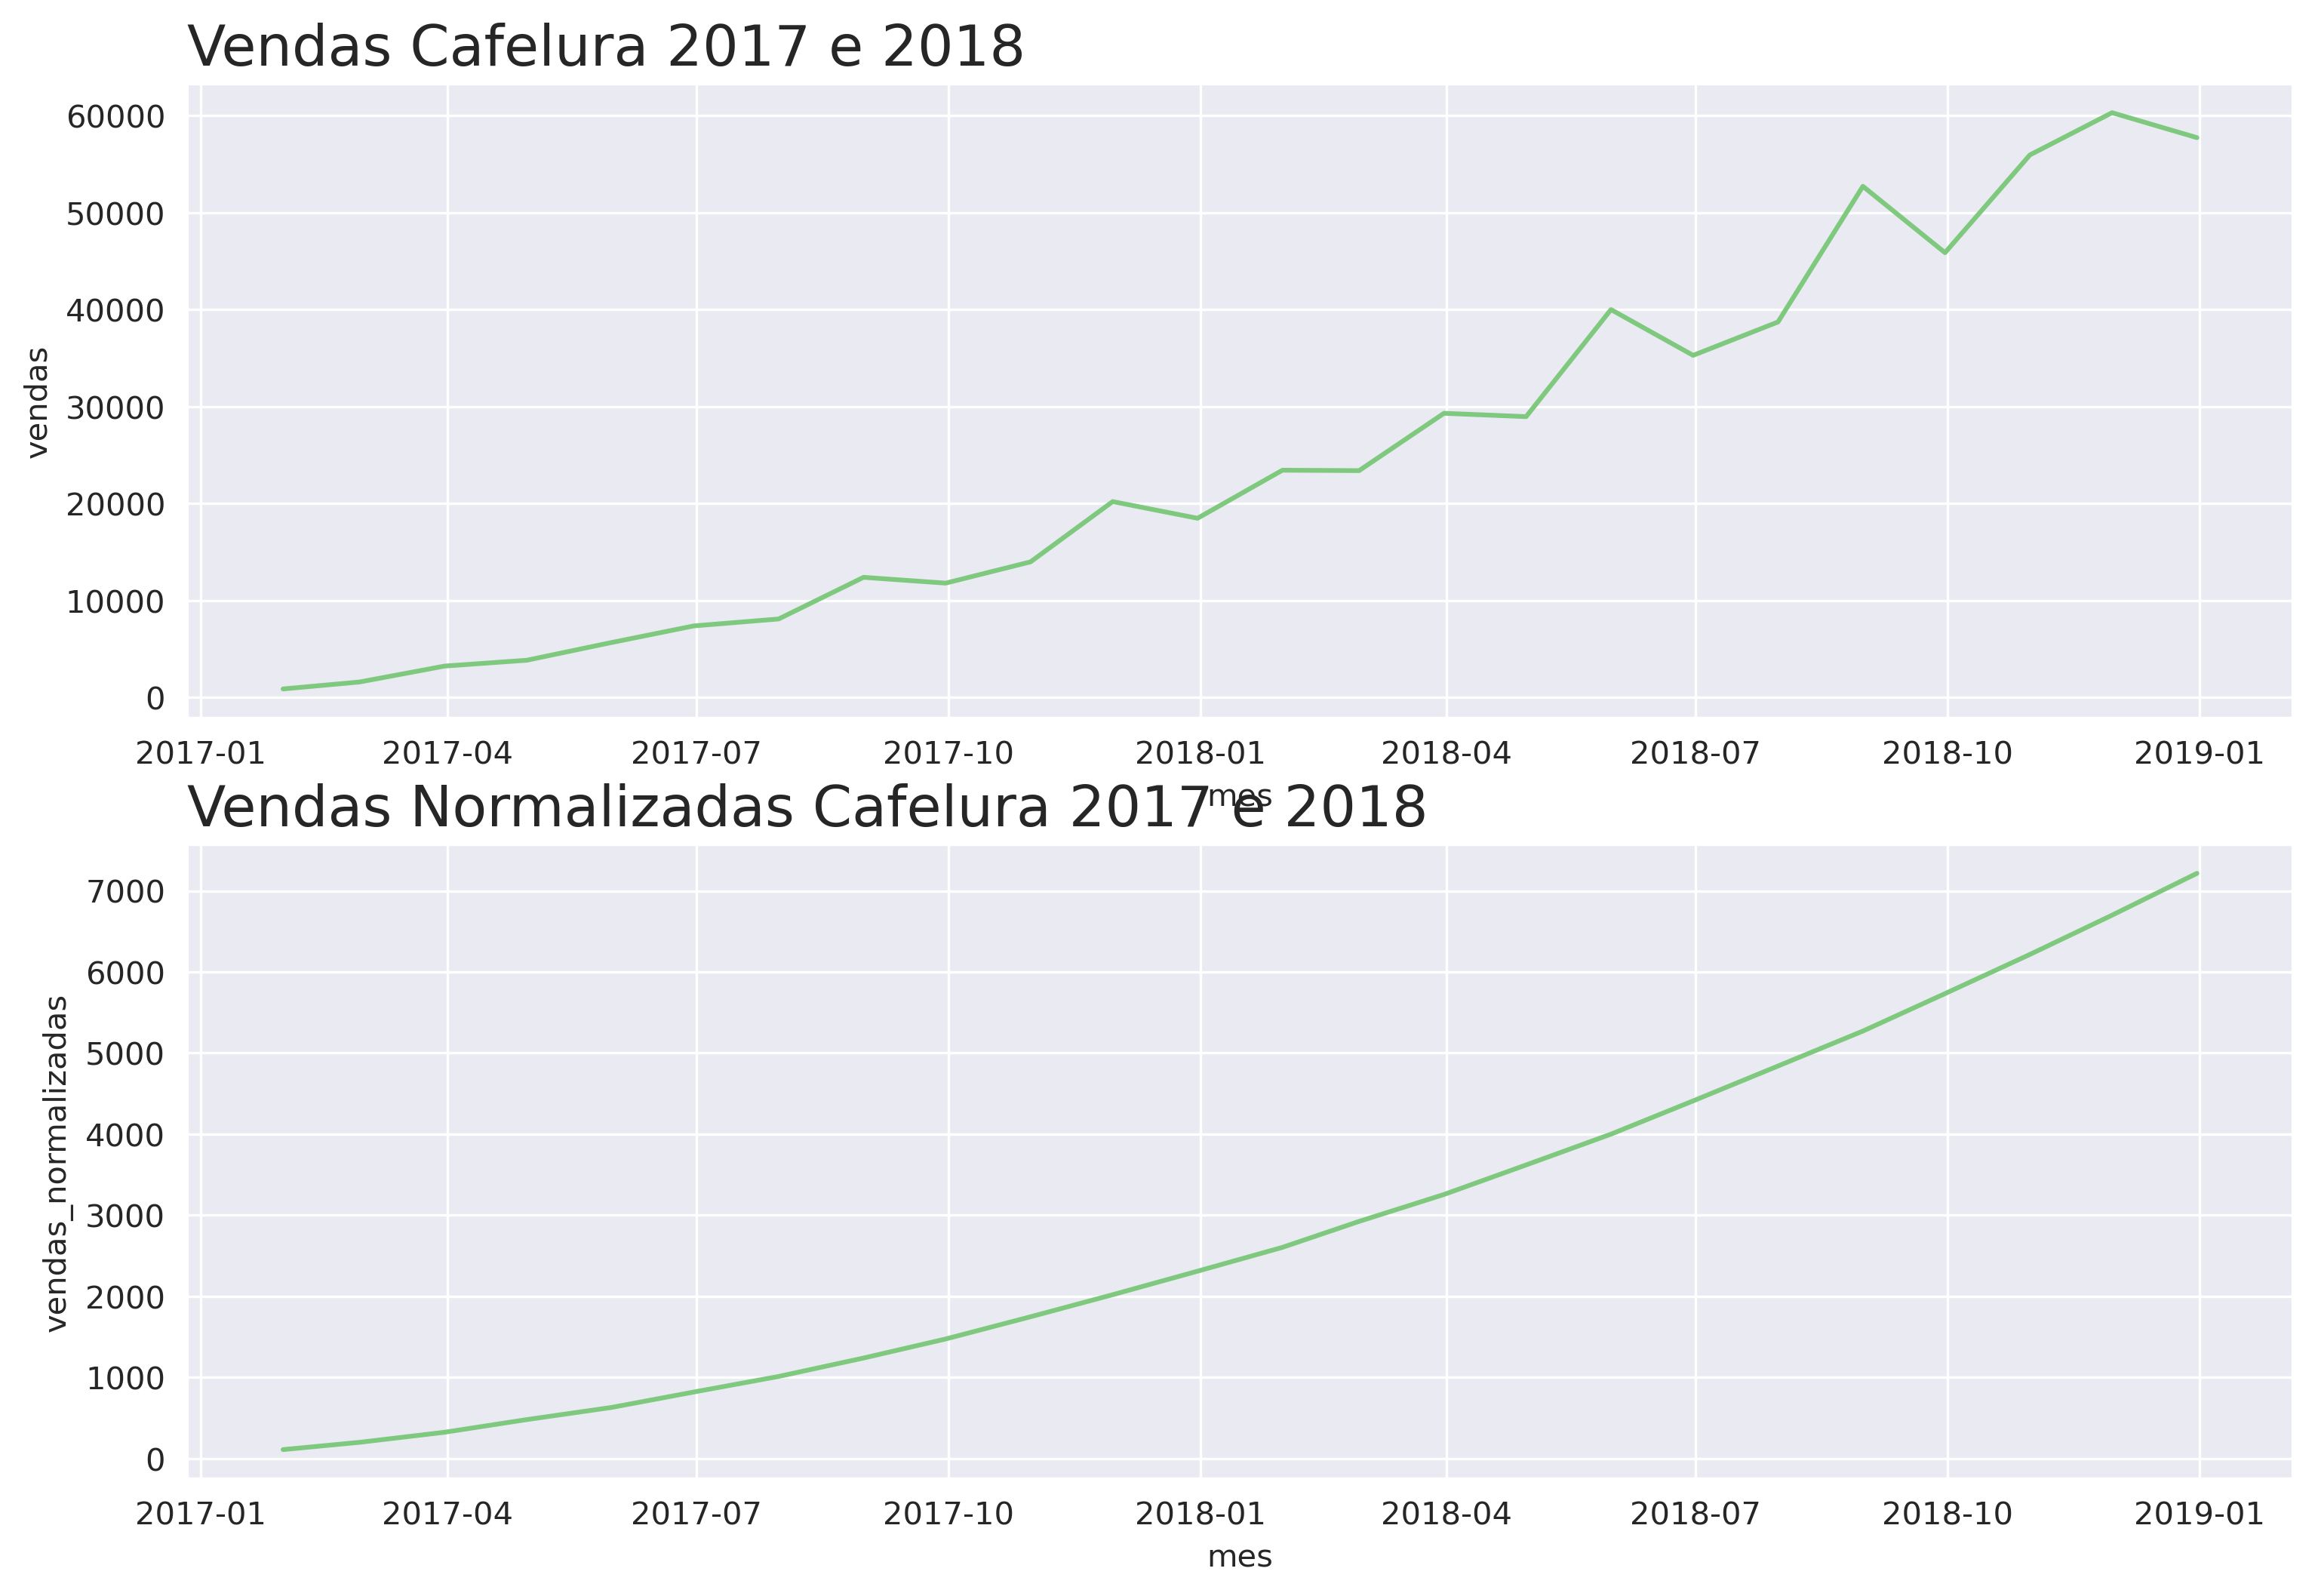

In [141]:
plt.figure(figsize=(12, 8), dpi=300)
ax = plt.subplot(2, 1, 1)
ax.set_title('Vendas Cafelura 2017 e 2018', fontsize=18, loc='left')
sns.lineplot(x='mes', y='vendas', data=cafelura)

ax = plt.subplot(2, 1, 2)
ax.set_title('Vendas Normalizadas Cafelura 2017 e 2018', fontsize=18, loc='left')
sns.lineplot(x='mes', y='vendas_normalizadas', data=cafelura)

plt.show()

# Statsmodels

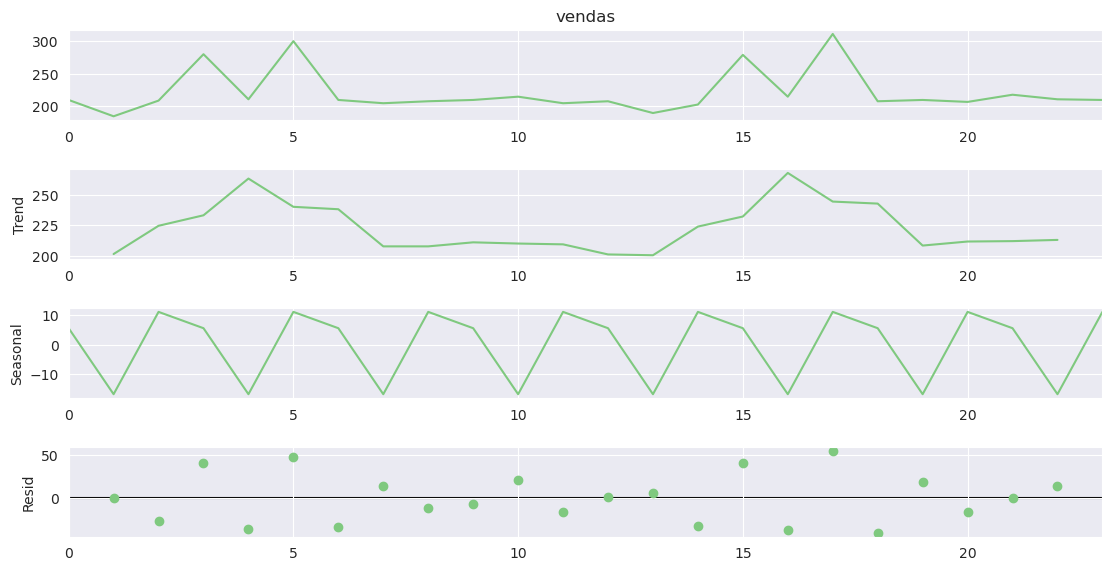

In [160]:
result = seasonal_decompose(chocolura['vendas'], period=3)
ax = result.plot()
ax.figure.set_size_inches(12, 6)
ax.figure.set_dpi = 300
plt.show()

In [161]:
observation = result.observed
trend = result.trend
seasonal = result.seasonal
noise = result.resid

In [162]:
data = pd.DataFrame({
    'observacao' : observation,
    'tendencia' : trend,
    'sazonalidade' : seasonal,
    'ruido' : noise
})

data.head()

observacao   tendencia  sazonalidade      ruido
0       210.0         NaN      5.603175        NaN
1       185.0  201.333333    -16.730159   0.396825
2       209.0  224.666667     11.126984 -26.793651
3       280.0  233.333333      5.603175  41.063492
4       211.0  263.666667    -16.730159 -35.936508

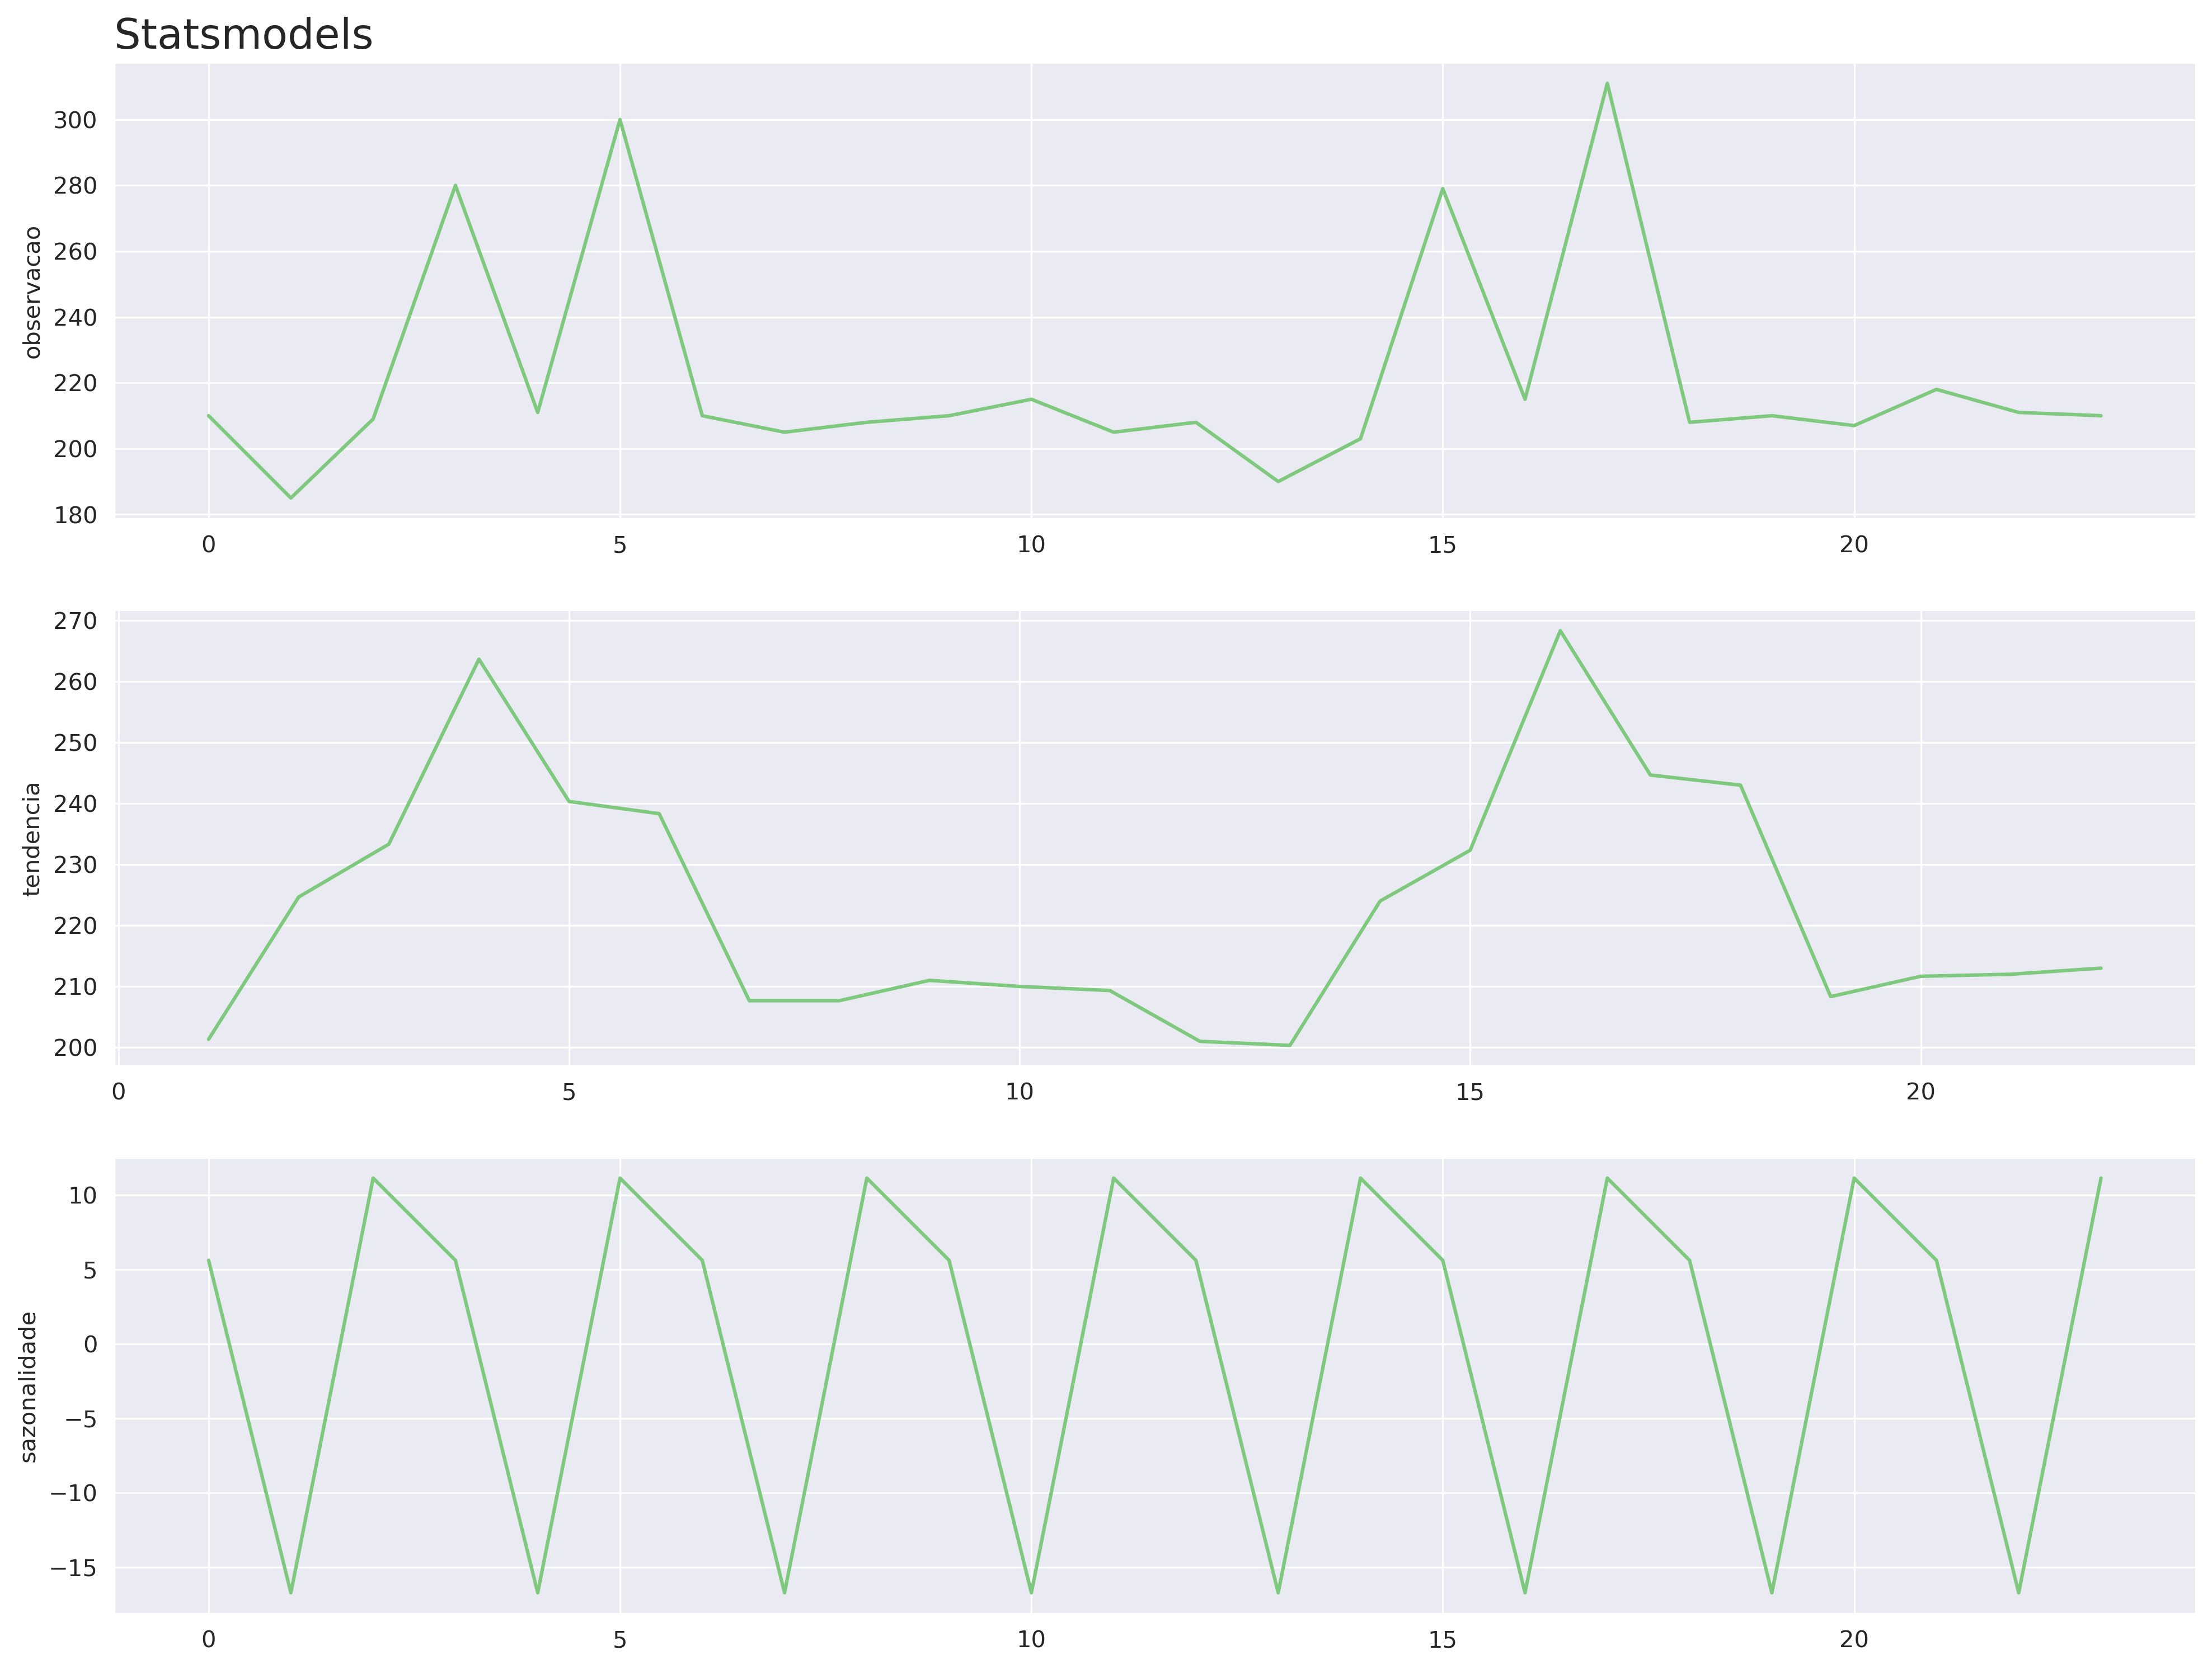

In [163]:
compare_plot(
    data.index, 
    'observacao',
    'tendencia',
    'sazonalidade',
    data,
    'Statsmodels'
)

# Alucuel - Análise de vendas

In [164]:
alucel = pd.read_csv('alucel.csv')
alucel.head()

dia   vendas
0  2018-10-01  1374.83
1  2018-10-02  2185.69
2  2018-10-03  1860.36
3  2018-10-04  1939.02
4  2018-10-05  1946.17

In [165]:
alucel.dtypes

dia        object
vendas    float64
dtype: object

In [167]:
alucel['dia'] = pd.to_datetime(alucel['dia'])
alucel.dtypes

dia       datetime64[ns]
vendas           float64
dtype: object

In [168]:
print(f'Os dados possuem {alucel.shape[0]} registros e {alucel.shape[1]} variáveis')
print(f'Quantidade de dados nulos: {alucel.isna().sum().sum()}')

Os dados possuem 61 registros e 2 variáveis
Quantidade de dados nulos: 0


In [170]:
alucel['aumento'] = alucel['vendas'].diff()
alucel['aceleracao'] = alucel['aumento'].diff()

In [171]:
alucel.head()

dia   vendas  aumento  aceleracao
0 2018-10-01  1374.83      NaN         NaN
1 2018-10-02  2185.69   810.86         NaN
2 2018-10-03  1860.36  -325.33    -1136.19
3 2018-10-04  1939.02    78.66      403.99
4 2018-10-05  1946.17     7.15      -71.51

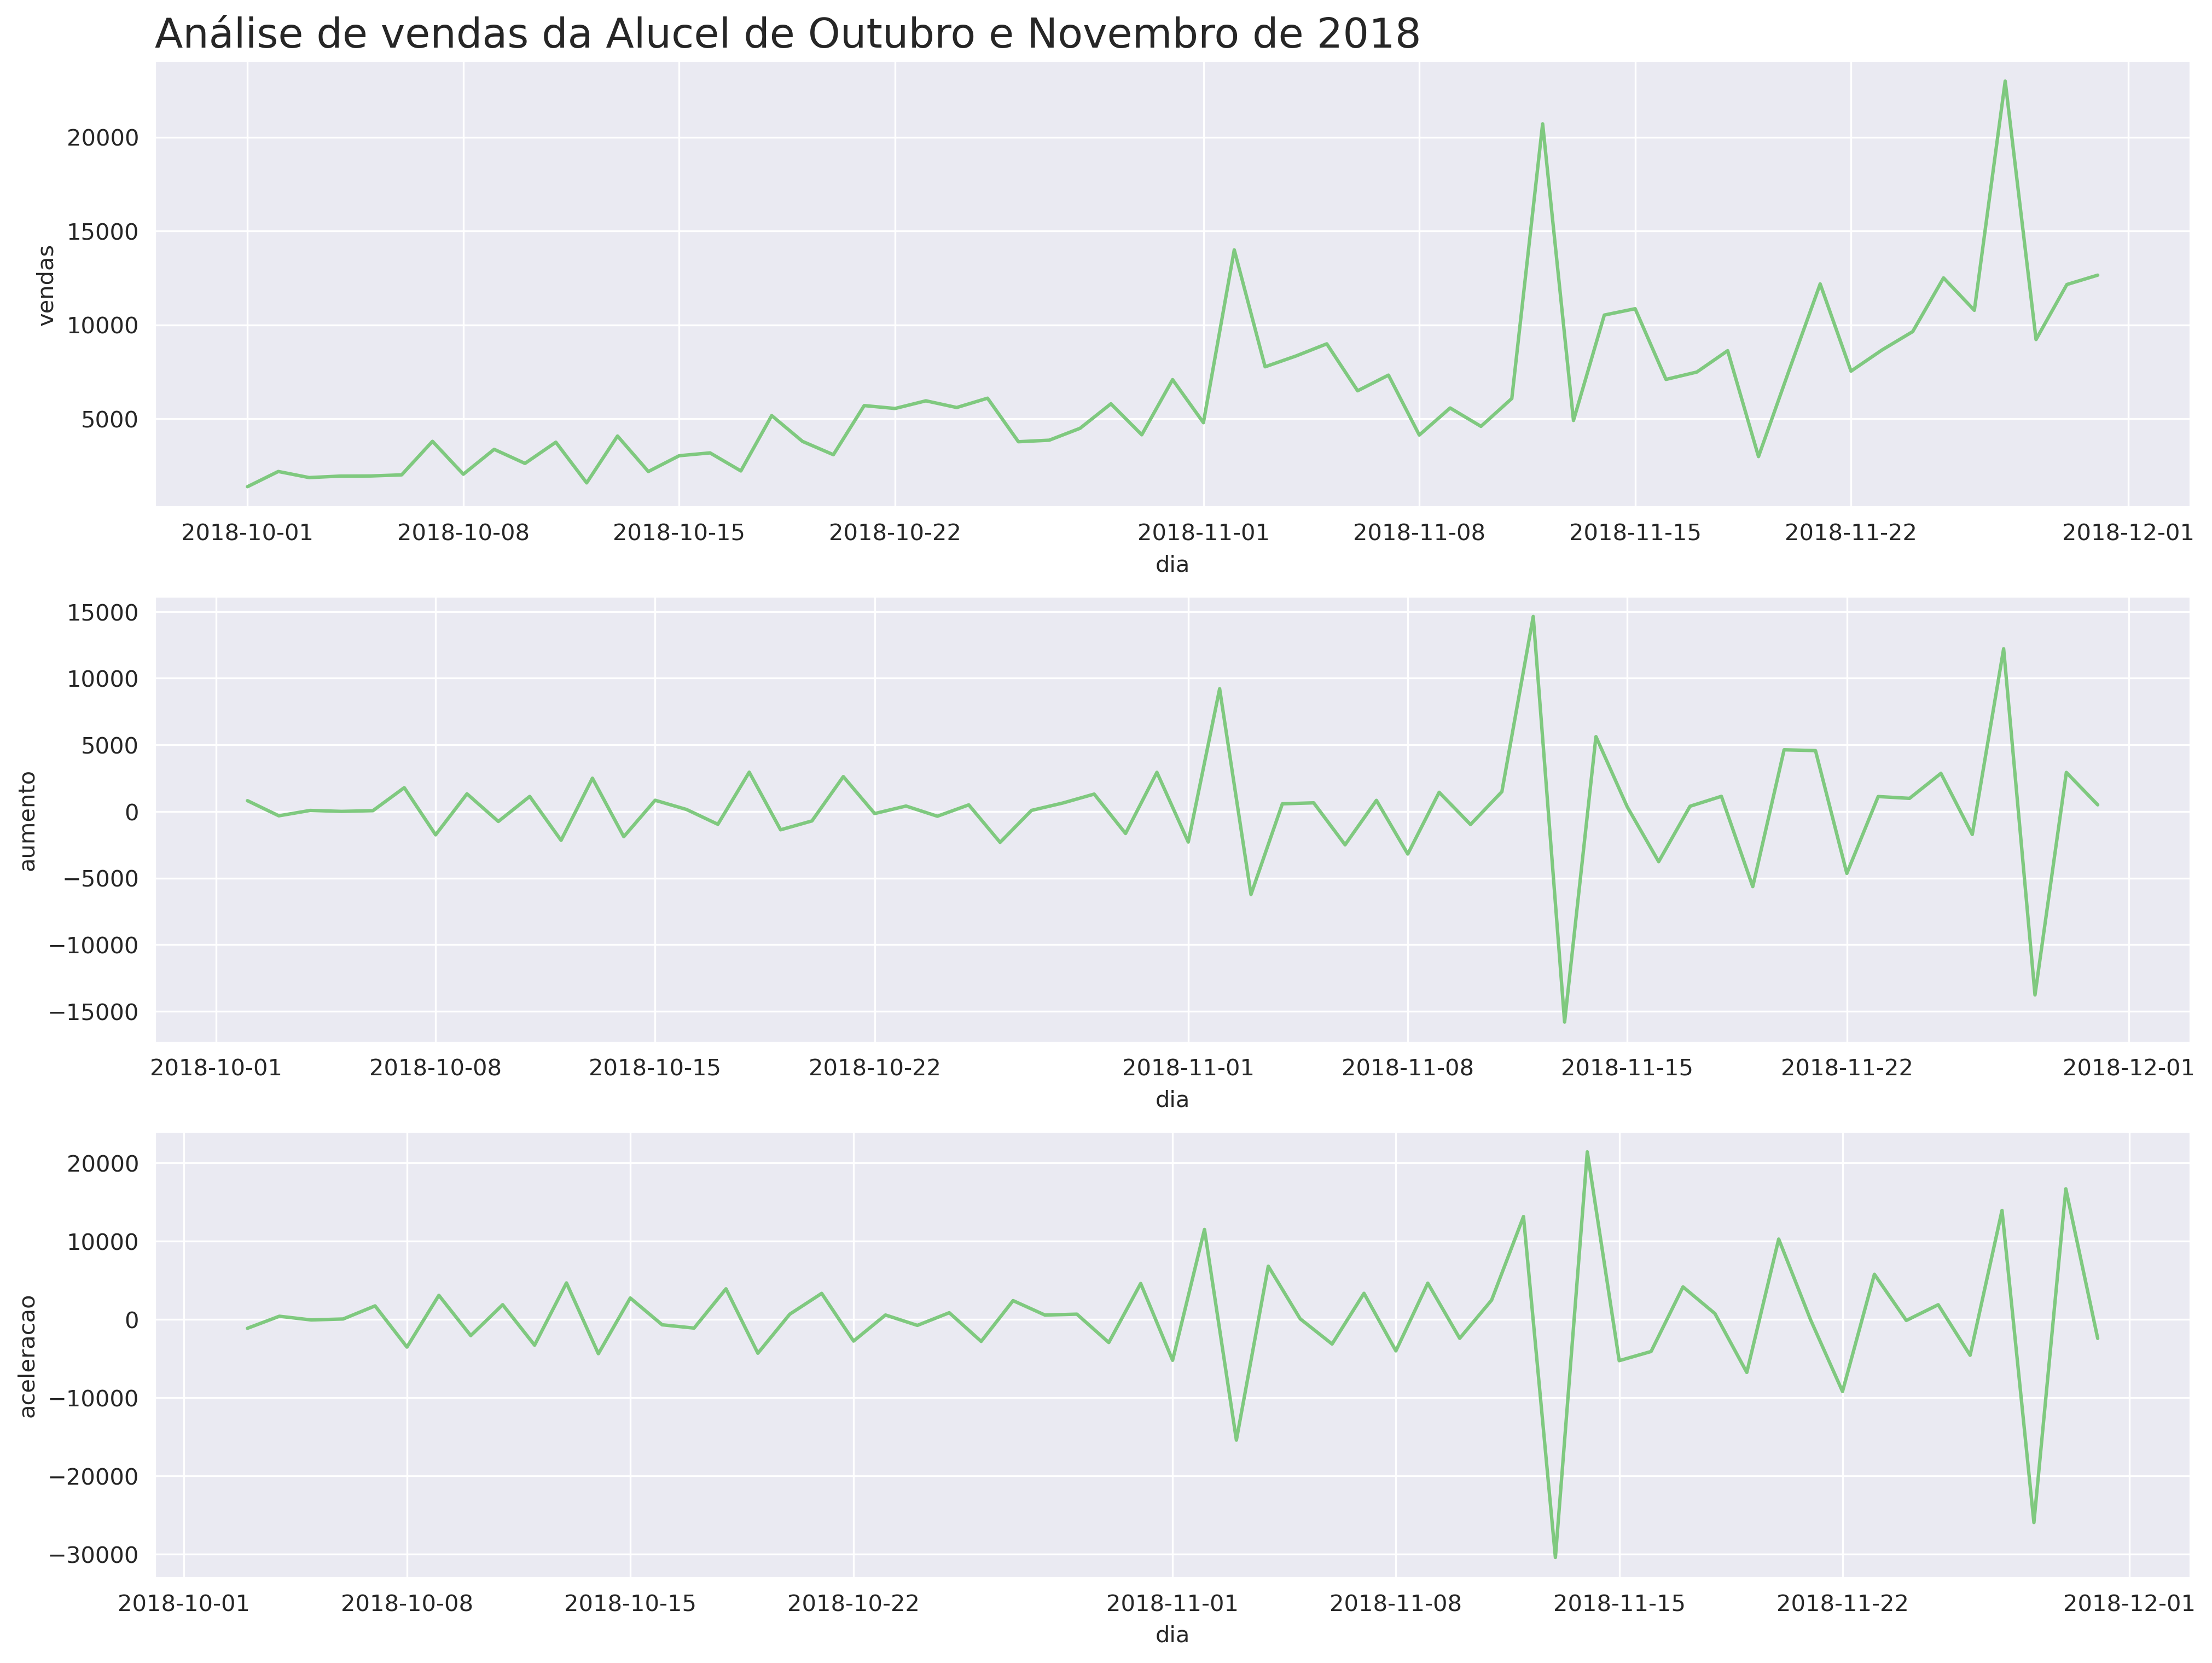

In [172]:
compare_plot(
    'dia',
    'vendas',
    'aumento',
    'aceleracao',
    alucel,
    'Análise de vendas da Alucel de Outubro e Novembro de 2018'
)

## Normalização com a média móvel

In [173]:
alucel['media_movel'] = alucel['vendas'].rolling(7).mean()
alucel.head(7)

dia   vendas  aumento  aceleracao  media_movel
0 2018-10-01  1374.83      NaN         NaN          NaN
1 2018-10-02  2185.69   810.86         NaN          NaN
2 2018-10-03  1860.36  -325.33    -1136.19          NaN
3 2018-10-04  1939.02    78.66      403.99          NaN
4 2018-10-05  1946.17     7.15      -71.51          NaN
5 2018-10-06  2005.89    59.72       52.57          NaN
6 2018-10-07  3793.07  1787.18     1727.46  2157.861429

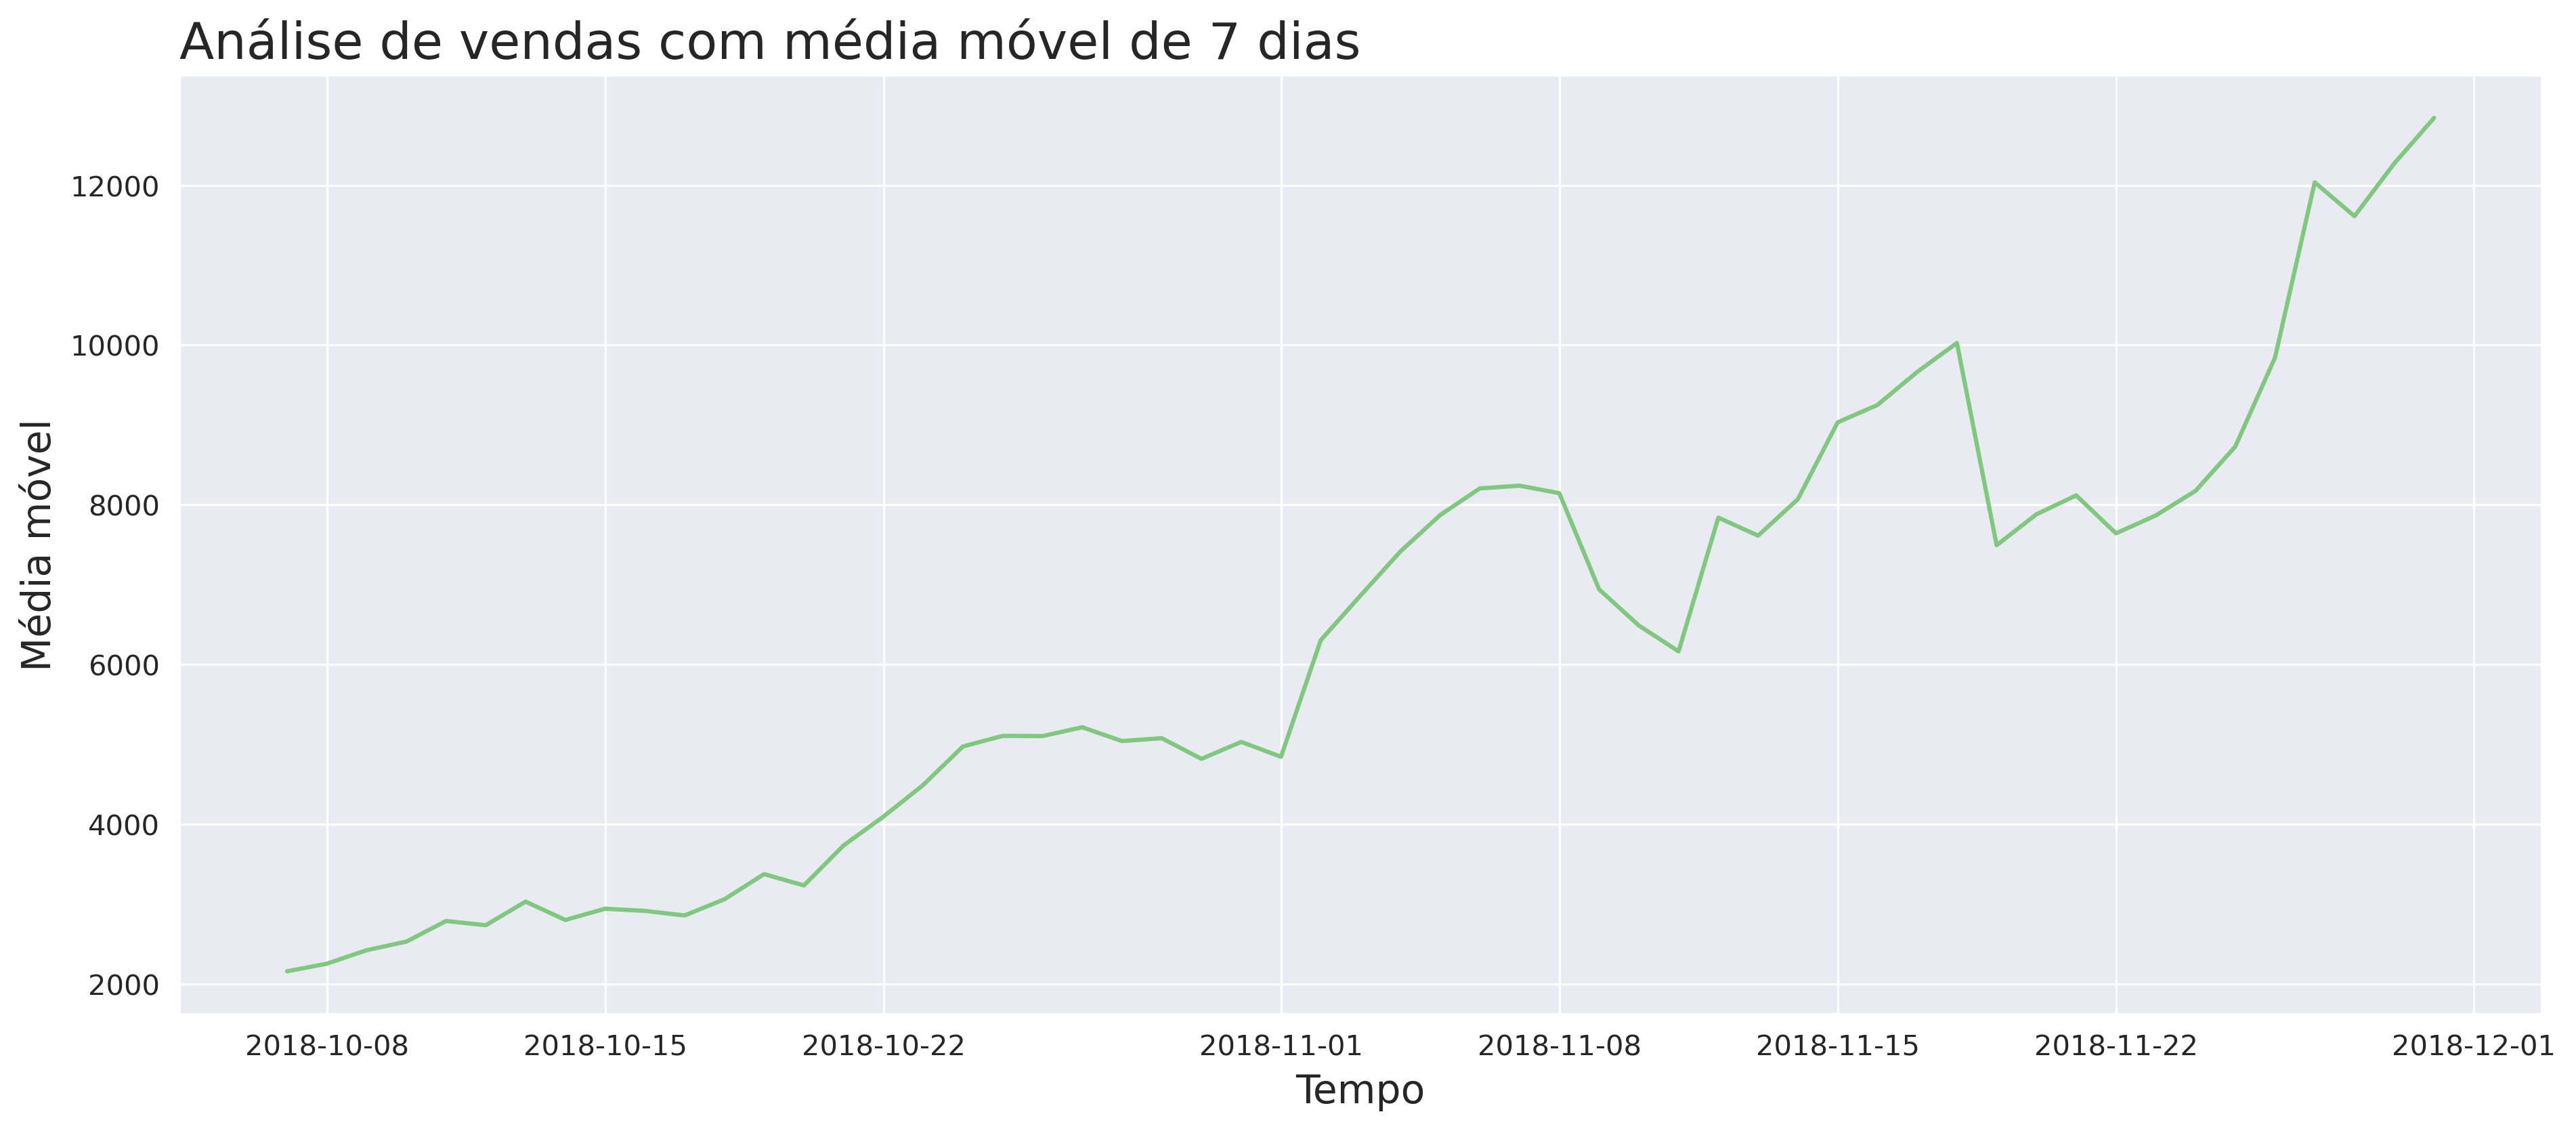

In [174]:
plot(
    'Análise de vendas com média móvel de 7 dias',
    'Tempo',
    'Média móvel',
    'dia',
    'media_movel',
    alucel
)

In [175]:
alucel['media_movel_21_dias'] = alucel['vendas'].rolling(21).mean()
alucel.head(21)

dia   vendas  aumento  aceleracao  media_movel  media_movel_21_dias
0  2018-10-01  1374.83      NaN         NaN          NaN                  NaN
1  2018-10-02  2185.69   810.86         NaN          NaN                  NaN
2  2018-10-03  1860.36  -325.33    -1136.19          NaN                  NaN
3  2018-10-04  1939.02    78.66      403.99          NaN                  NaN
4  2018-10-05  1946.17     7.15      -71.51          NaN                  NaN
5  2018-10-06  2005.89    59.72       52.57          NaN                  NaN
6  2018-10-07  3793.07  1787.18     1727.46  2157.861429                  NaN
7  2018-10-08  2039.59 -1753.48    -3540.66  2252.827143                  NaN
8  2018-10-09  3365.58  1325.99     3079.47  2421.382857                  NaN
9  2018-10-10  2616.12  -749.46    -2075.45  2529.348571                  NaN
10 2018-10-11  3745.49  1129.37     1878.83  2787.415714                  NaN
11 2018-10-12  1578.37 -2167.12    -3296.49  2734.872857                  NaN
12 2018-10-13  4075.13  2496.76     4663.88  3030.478571                  NaN
13 2018-10-14  2183.18 -1891.95    -4388.71  2800.494286                  NaN
14 2018-10-15  3025.13   841.95     2733.90  2941.285714                  NaN
15 2018-10-16  3176.53   151.40     -690.55  2914.278571                  NaN
16 2018-10-17  2214.20  -962.33    -1113.73  2856.861429                  NaN
17 2018-10-18  5163.69  2949.49     3911.82  3059.461429                  NaN
18 2018-10-19  3787.74 -1375.95    -4325.44  3375.085714                  NaN
19 2018-10-20  3078.78  -708.96      666.99  3232.750000                  NaN
20 2018-10-21  5696.93  2618.15     3327.11  3734.714286              2897.69

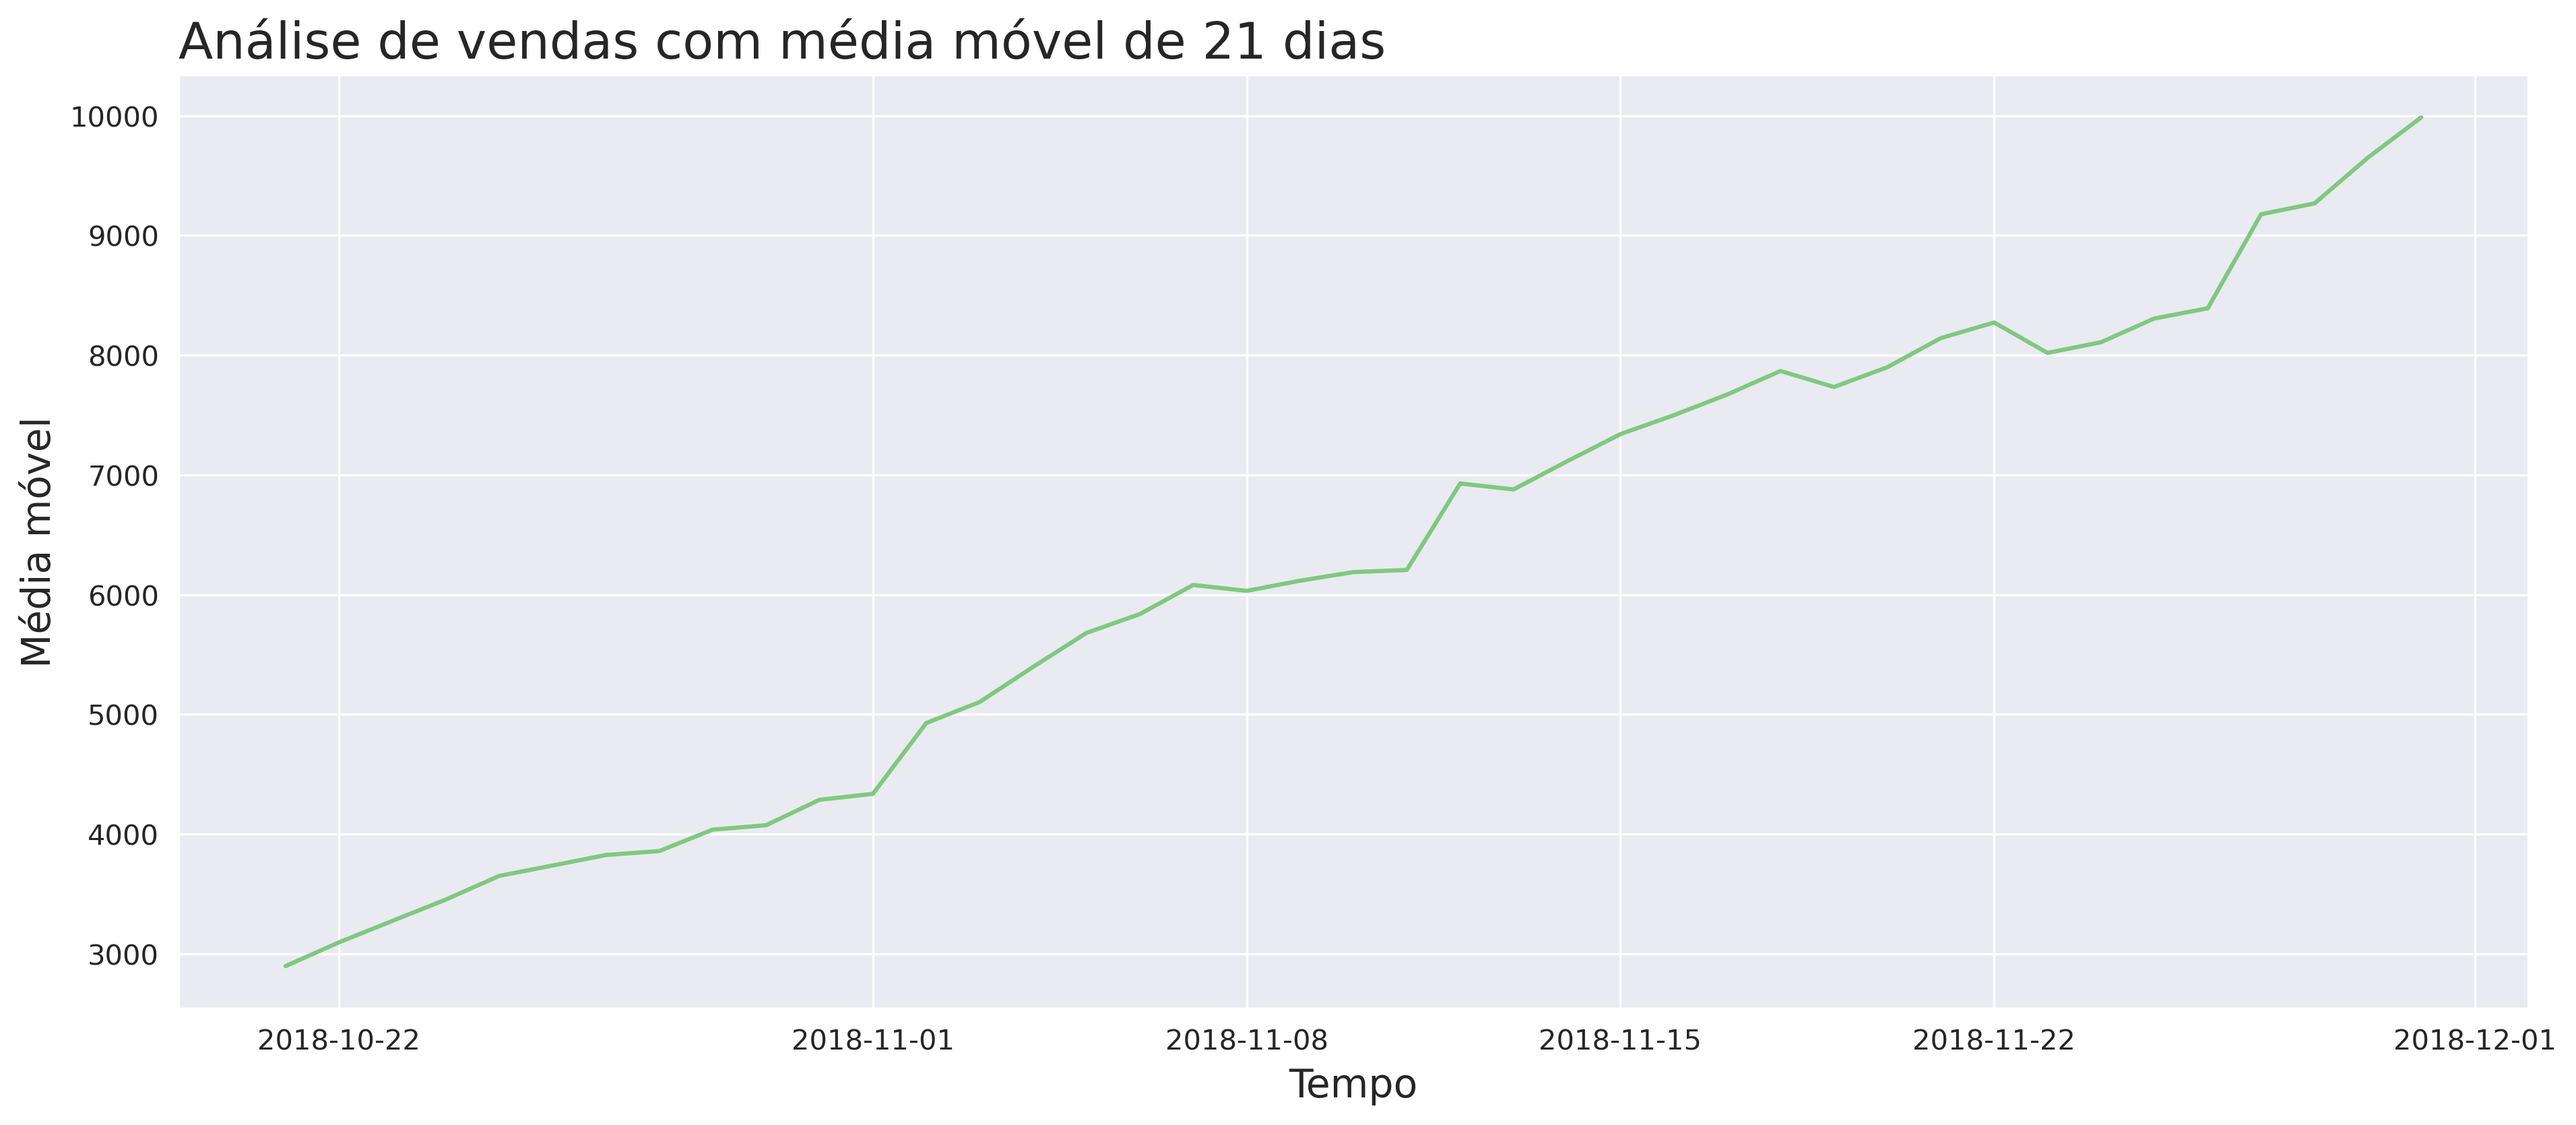

In [177]:
plot(
    'Análise de vendas com média móvel de 21 dias',
    'Tempo',
    'Média móvel',
    'dia',
    'media_movel_21_dias',
    alucel
)

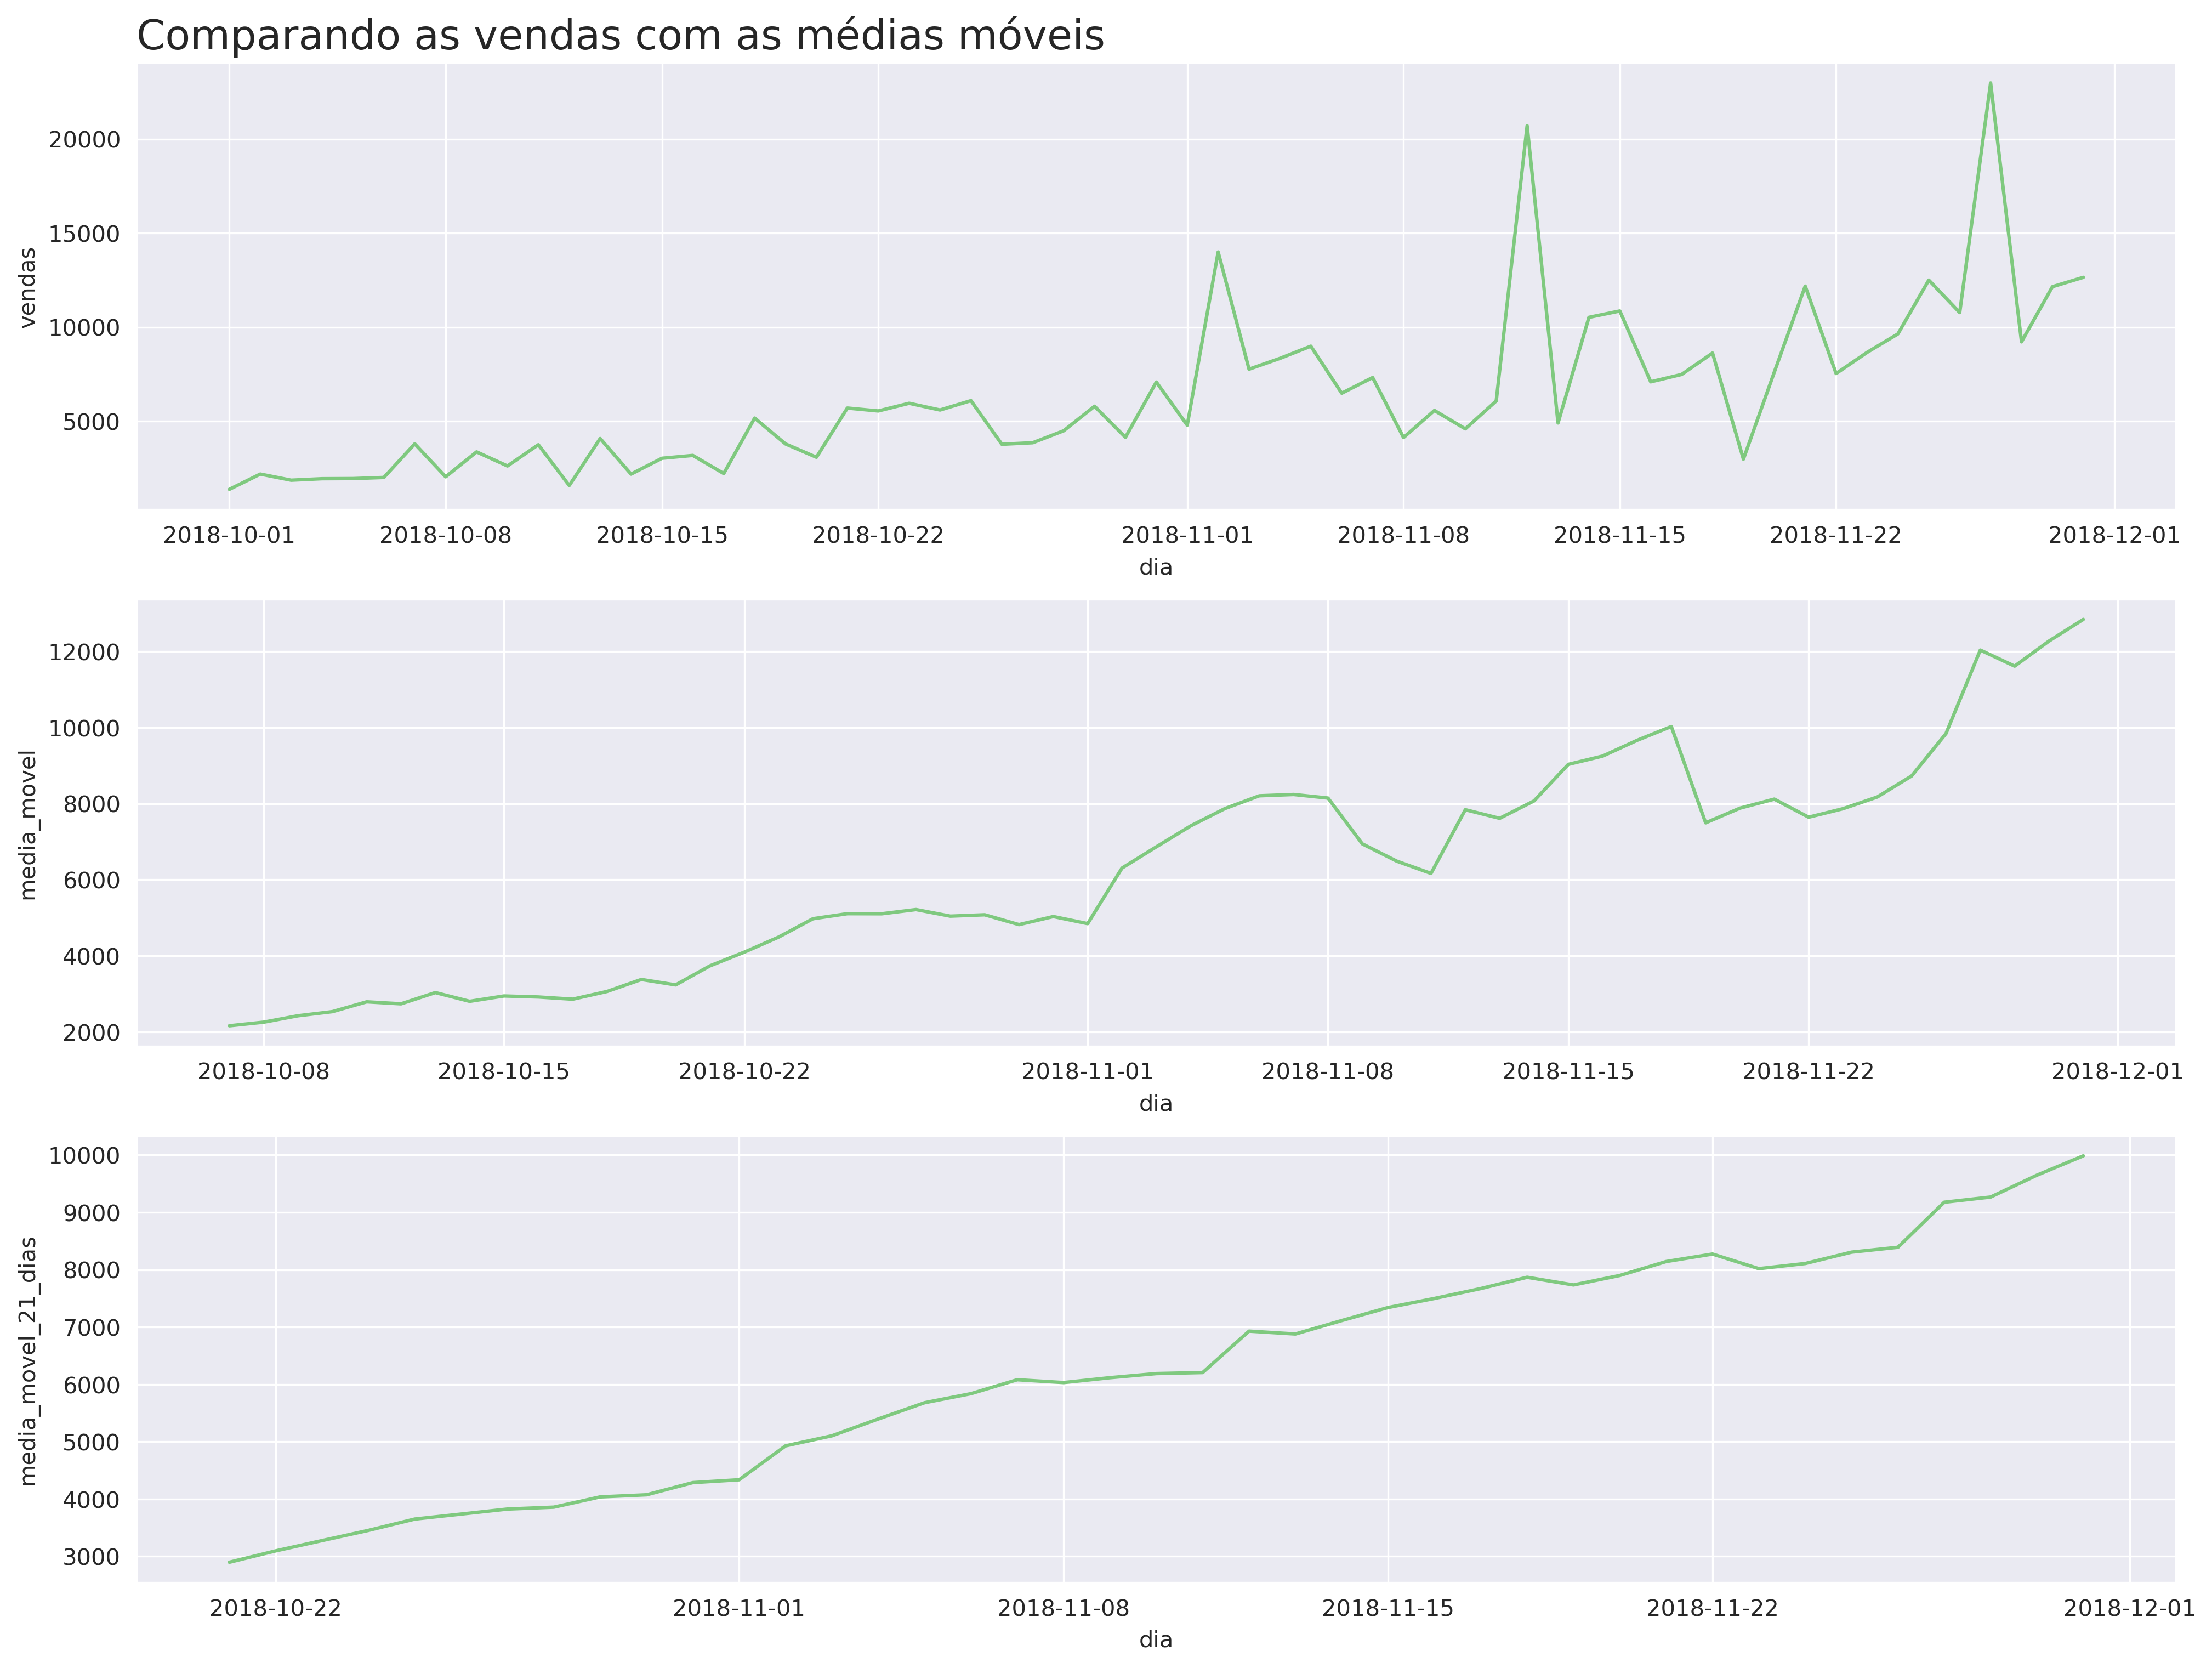

In [179]:
compare_plot(
    'dia',
    'vendas',
    'media_movel',
    'media_movel_21_dias',
    alucel,
    'Comparando as vendas com as médias móveis'
)